# **Finding a Good Deal among Hotels in main German cities**

### **Introduction**

This dataset comprises hotel information from four major German cities: Berlin, Frankfurt, Hamburg, and Munich. The data was collected from the booking.com website and specifically includes hotels with available rooms for a selected night during weekdays.

It's important to note that not all hotels are listed on booking.com, which may introduce selection bias, as other hotels not listed on the site could potentially offer better deals. To mitigate this limitation, additional data from other sources would be beneficial. However, this case study focuses exclusively on data obtained from booking.com.

The dataset encompasses various types of accommodations, including hotels with available rooms for the selected night. It contains 1612 observations. The dataset variables provide comprehensive hotel information, such as hotel name, address, room price (in Euros), and more. For confidentiality reasons, hotel names and addresses have been replaced with numerical ID variables.


### **Goal of the Research**

The primary objective of this study is to analyze hotel data from key German cities, compare room prices, and identify good deals. The focus is on finding hotels that are underpriced relative to their location and quality.

### **Aknowledgement** 

I would like to acknowledge the authors Gabor Bekes and Gabor Kezdi for their book, "Data Analysis for Business, Economics, and Policy," published by Cambridge University Press in 2021. More resources can be found at gabors-data-analysis.com.

In [498]:
####################################################
# Import packages
####################################################
import numpy as np
import numpy.typing as npt
import pandas as pd
from plotnine import *
from mizani.formatters import percent_format
from plotnine import ggplot, aes, geom_point
import matplotlib.pyplot as plt
import seaborn as sns

####################################################
# Define global vars
####################################################
color = ["#3a5e8cFF", "#10a53dFF", "#541352FF", "#ffcf20FF", "#2f9aa0FF"]

dark_gray = ".4"
light_gray = ".8"

da_theme = {
    "axes.edgecolor": dark_gray,
    "axes.facecolor": "white",
    "axes.linewidth": 1,
    "axes.spines.bottom": True,
    "axes.spines.left": True,
    "axes.spines.right": True,
    "axes.spines.top": True,
    "font.family": "sans-serif",
    "figure.figsize": (7, 5.5),
    "grid.color": light_gray,
    "grid.linestyle": "-",
    "text.color": "black",
    "xtick.bottom": True,
    "xtick.color": dark_gray,
    "ytick.color": dark_gray,
}

####################################################
# Define helper functions
####################################################
def seq(start: float, stop: float, by: float, round_n=3) -> list:
    """
    Custom function, used for setting the breaks of plotnine scales.

       Parameters
    ----------
    start : float
        Start of the breaks.
    stop : float
        End of the breaks.
    by : float
        Steps between breaks.
    round_n: int, default=3
        Decimals to round floats in output.
    """
    epsilon = np.finfo("float").eps

    return [
        round(x, round_n) for x in list(np.arange(start, stop + (by - epsilon), by))
    ]

import statsmodels.api as sm
import statsmodels.formula.api as smf

## Opening the data file

In [3]:
hotel_data = pd.read_csv('/.../hotels_Germany.csv')

# **PART I. Exploratory Data Analysis**

## **Table 1.** List of observations

In [5]:
hotel_data

hotel_id     city   check_in  check_out  breakfast_0_1  \
0            1   Berlin   2/5/2025   2/6/2025              0   
1            2   Berlin   2/5/2025   2/6/2025              0   
2            3   Berlin   2/5/2025   2/6/2025              0   
3            4   Berlin   2/5/2025   2/6/2025              0   
4            5   Berlin   2/5/2025   2/6/2025              0   
...        ...      ...        ...        ...            ...   
1608      1609  München  2/10/2025  2/11/2025              0   
1609      1610  München  2/10/2025  2/11/2025              0   
1610      1611  München  2/10/2025  2/11/2025              0   
1611      1612  München  2/10/2025  2/11/2025              0   
1612      1613  München  2/10/2025  2/11/2025              0   

     accommadation_type  distance_km  Sustain_cert  reviews_0_10  nr_reviews  \
0                 Hotel          2.9             0           8.2        3159   
1                 Hotel         17.3             0           8.6        6049   
2                 Hotel          7.4             0           8.7          44   
3               Pension          4.5             0           7.4         669   
4                 Hotel          3.9             0           8.5       23837   
...                 ...          ...           ...           ...         ...   
1608      Ferienwohnung          0.7             0           7.7          14   
1609            Pension          6.9             0           5.7           3   
1610      Ferienwohnung          1.4             0           1.0           2   
1611      Ferienwohnung          1.3             0           3.3           6   
1612      Ferienwohnung          1.4             0           2.0           4   

      Price_euro  
0            117  
1             72  
2            155  
3             62  
4            122  
...          ...  
1608        1350  
1609         288  
1610         800  
1611         900  
1612         969  

[1613 rows x 11 columns]

## **Table 2.** List of variables

In [7]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_id            1613 non-null   int64  
 1   city                1613 non-null   object 
 2   check_in            1613 non-null   object 
 3   check_out           1613 non-null   object 
 4   breakfast_0_1       1613 non-null   int64  
 5   accommadation_type  1612 non-null   object 
 6   distance_km         1613 non-null   float64
 7   Sustain_cert        1613 non-null   int64  
 8   reviews_0_10        1613 non-null   float64
 9   nr_reviews          1613 non-null   int64  
 10  Price_euro          1613 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 138.7+ KB


## **Table 3.** Number of observations by cities

In [9]:
hotel_data['city'].value_counts()

city
Berlin       472
Hamburg      441
München      410
Frankfurt    290
Name: count, dtype: int64

## **Table 4.** Distribution of accommadation types

In [11]:
hotel_data['accommadation_type'].value_counts()

accommadation_type
Hotel                  1107
Ferienwohnung           227
Aparthotel              120
Hostel                   63
Pension                  55
Privatzimmer             25
Bed & Breakfast           3
Ferienhaus                3
Gasthaus                  2
Motel                     2
Boot                      2
die Zeit-Lodge            2
Studentenunterkunft       1
Name: count, dtype: int64

### * *For the consistent analysis I focus only hotels and apartment-hotels*

In [13]:
hotel_data = hotel_data[(hotel_data['accommadation_type'] == 'Hotel') | (hotel_data['accommadation_type'] == 'Aparthotel')]
hotel_data['accommadation_type'].value_counts()

accommadation_type
Hotel         1107
Aparthotel     120
Name: count, dtype: int64

### * *After keeping only hotels and apartment-hotels 1227 observations left*

## **Figure 1.** a) Distance from hotel to city center, in km
### * *I chose distance as first independent variable for price regression analysis. Later I add other variables to regression analysis*

In [15]:
hotel_data['distance_km'].agg(['min', 'mean', 'max'])

min      0.040000
mean     4.138215
max     26.900000
Name: distance_km, dtype: float64

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 7 rows containing non-finite values.


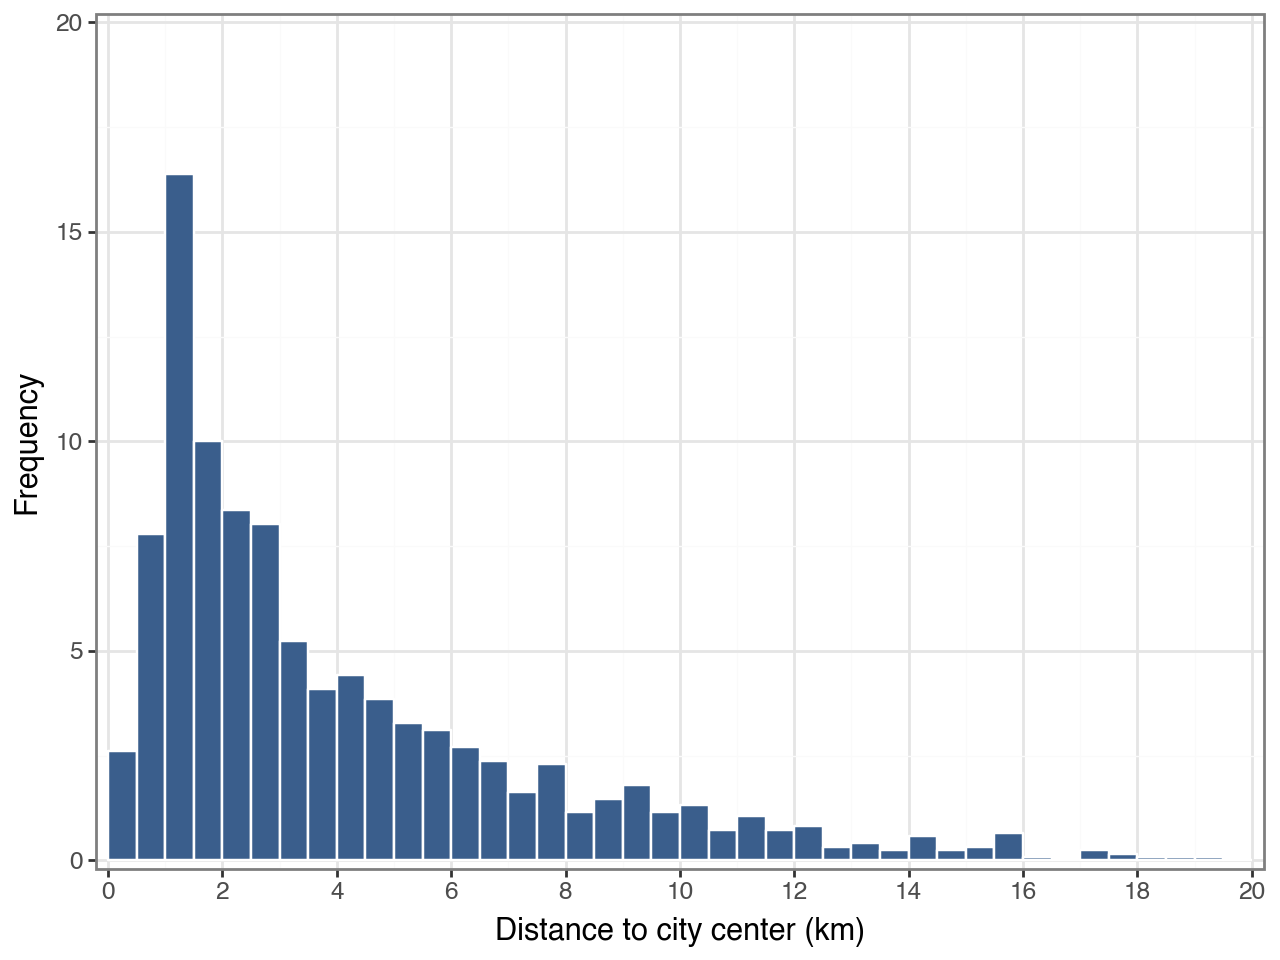

In [17]:
(
    ggplot(hotel_data, aes(x="distance_km"))
    + geom_histogram(
        aes(y=after_stat("count / sum(count)*100")),
        binwidth=0.5,
        fill=color[0],
        color="white",
        boundary=0,
        closed="left",
    )
    + labs(x="Distance to city center (km)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 20], breaks=np.arange(0, 21, 2))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 20], breaks=np.arange(0, 21, 5))
    + theme_bw()
)

### * *I restrict the distance to 10 km, assuming that the maximum distance from a hotel to the city center should not exceed 10 km.*

In [20]:
hotel_data = hotel_data.loc[
    (hotel_data["distance_km"] <= 10)
]

## **Figure 1.** b) Distance from hotel to city center, in km
### * *Distribution after restricting to 10 km*

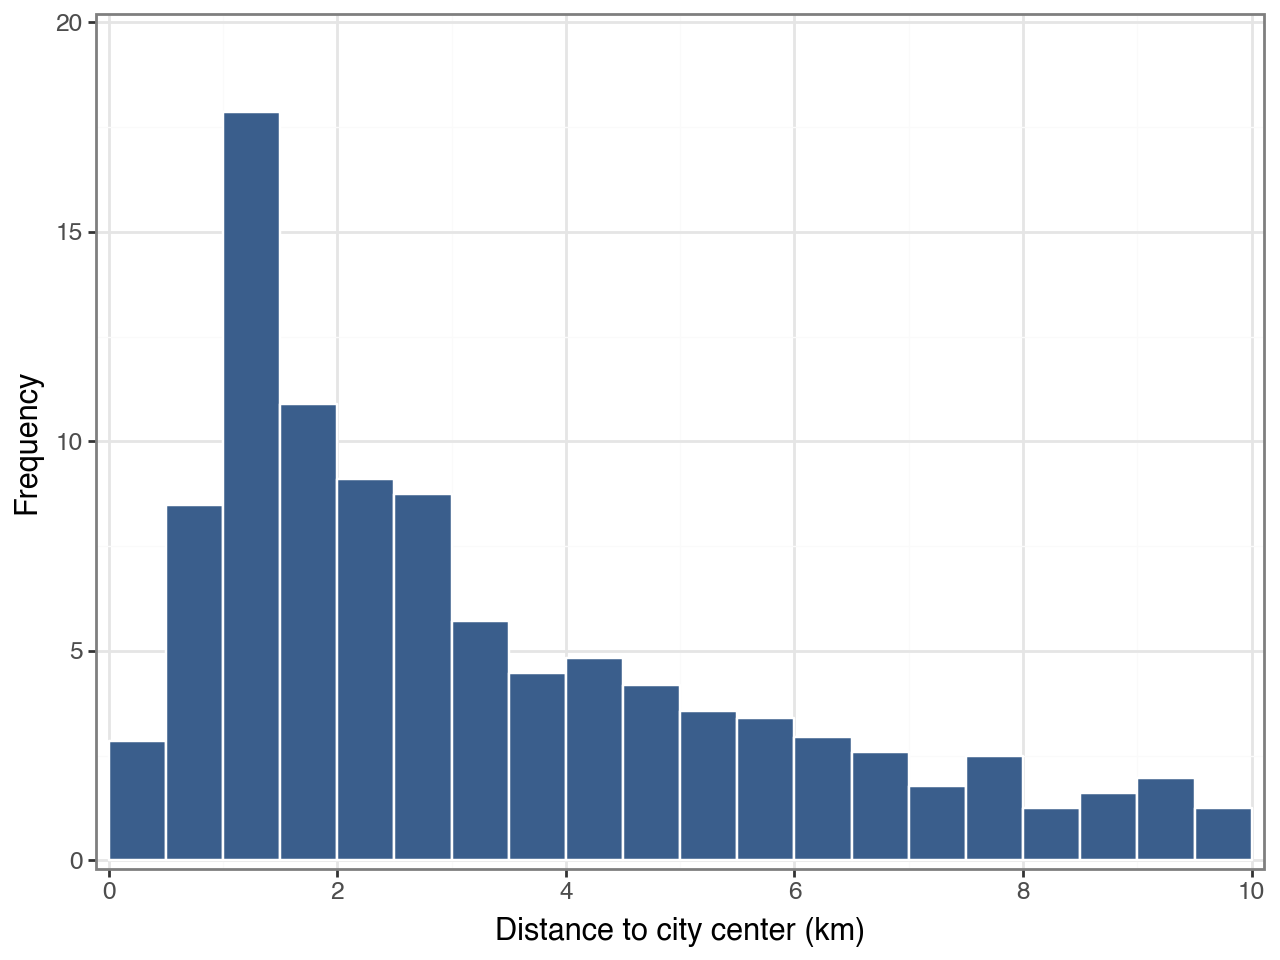

In [23]:
(
    ggplot(hotel_data, aes(x="distance_km"))
    + geom_histogram(
        aes(y=after_stat("count / sum(count)*100")),
        binwidth=0.5,
        fill=color[0],
        color="white",
        boundary=0,
        closed="left",
    )
    + labs(x="Distance to city center (km)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 10], breaks=np.arange(0, 11, 2))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 20], breaks=np.arange(0, 21, 5))
    + theme_bw()
)

### * *After keeping hotels within a 10 km radius of the city center, 1122 observations left*

In [26]:
hotel_data

hotel_id     city   check_in  check_out  breakfast_0_1  \
0            1   Berlin   2/5/2025   2/6/2025              0   
2            3   Berlin   2/5/2025   2/6/2025              0   
4            5   Berlin   2/5/2025   2/6/2025              0   
8            9   Berlin   2/5/2025   2/6/2025              0   
9           10   Berlin   2/5/2025   2/6/2025              0   
...        ...      ...        ...        ...            ...   
1591      1592  München  2/10/2025  2/11/2025              0   
1592      1593  München  2/10/2025  2/11/2025              0   
1594      1595  München  2/10/2025  2/11/2025              0   
1597      1598  München  2/10/2025  2/11/2025              0   
1598      1599  München  2/10/2025  2/11/2025              0   

     accommadation_type  distance_km  Sustain_cert  reviews_0_10  nr_reviews  \
0                 Hotel         2.90             0           8.2        3159   
2                 Hotel         7.40             0           8.7          44   
4                 Hotel         3.90             0           8.5       23837   
8                 Hotel         3.80             0           8.4        7916   
9                 Hotel         5.60             1           8.3        9294   
...                 ...          ...           ...           ...         ...   
1591              Hotel         1.10             1           9.1         783   
1592              Hotel         0.04             0           9.4         611   
1594              Hotel         0.90             0           9.0          80   
1597         Aparthotel         0.60             0           9.1          60   
1598              Hotel         0.40             0           8.9         308   

      Price_euro  
0            117  
2            155  
4            122  
8            160  
9            140  
...          ...  
1591         520  
1592         525  
1594         539  
1597         250  
1598         778  

[1122 rows x 11 columns]

### * *For the better analysis I create a new categorical review variable from existing review variable*

In [29]:
# Define a function to recode the values
def recode_reviews(x):
    if x >= 0 and x < 0.5:
        return 0
    elif x >= 0.5 and x < 1.5:
        return 1
    elif x >= 1.5 and x < 2.5:
        return 2
    elif x >= 2.5 and x < 3.5:
        return 3
    elif x >= 3.5 and x < 4.5:
        return 4
    elif x >= 4.5 and x < 5.5:
        return 5
    elif x >= 5.5 and x < 6.5:
        return 6
    elif x >= 6.5 and x < 7.5:
        return 7
    elif x >= 7.5 and x < 8.5:
        return 8
    elif x >= 8.5 and x < 9.5:
        return 9
    else:
        return 10

# Apply the function to create a new column 'review_category'
hotel_data['review_category'] = hotel_data['reviews_0_10'].apply(recode_reviews)

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_82080/3328718210.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
hotel_data['review_category'].value_counts()

review_category
8     574
9     307
7     175
6      41
5      17
4       6
10      2
Name: count, dtype: int64

## **Figure 2.** Histogram of hotel reviews. Relative frequency (percent)

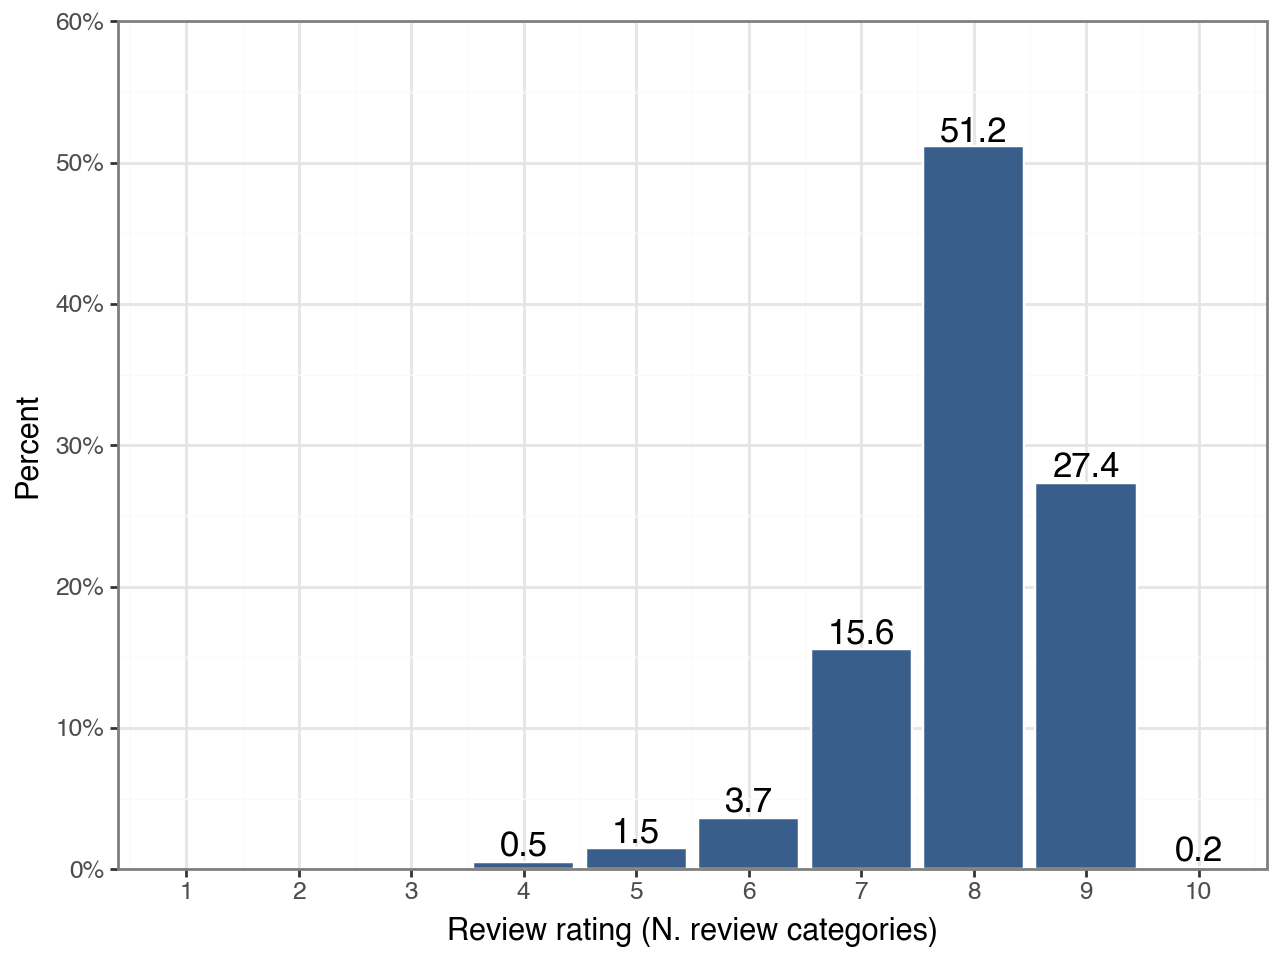

In [34]:
(
    ggplot(hotel_data, aes(x="review_category", y="stat(count)/sum(stat(count))"))
    + geom_bar(color="white", fill=color[0], alpha=0.8)
    + labs(x="Review rating (N. review categories)", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0.5, 10.5], breaks=seq(1, 10.5, 1))
    + scale_y_continuous(
        expand=[0.00, 0.00],
        limits=[0, 0.6],
        breaks=seq(0, 0.51, 0.1),
        labels=percent_format(),
    )
    + geom_text(
        aes(
            x="review_category",
            y="[x+0.01 for x in stat(count)/sum(stat(count))]",
            label="[round(num,1) for num in stat(count)/sum(stat(count))*100)]",
        ),
        stat="count",
        size=12.5,
    )
    + theme_bw()
)

## **Figure 3.** a) Histogram of hotel price (in Euro)
### * *In Figure 3 (a, b, c and d) I use scaling tro better visualize price distributions)*

In [37]:
hotel_data['Price_euro'].agg(['min', 'mean', 'max'])

min      11.000000
mean    127.505348
max     800.000000
Name: Price_euro, dtype: float64

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


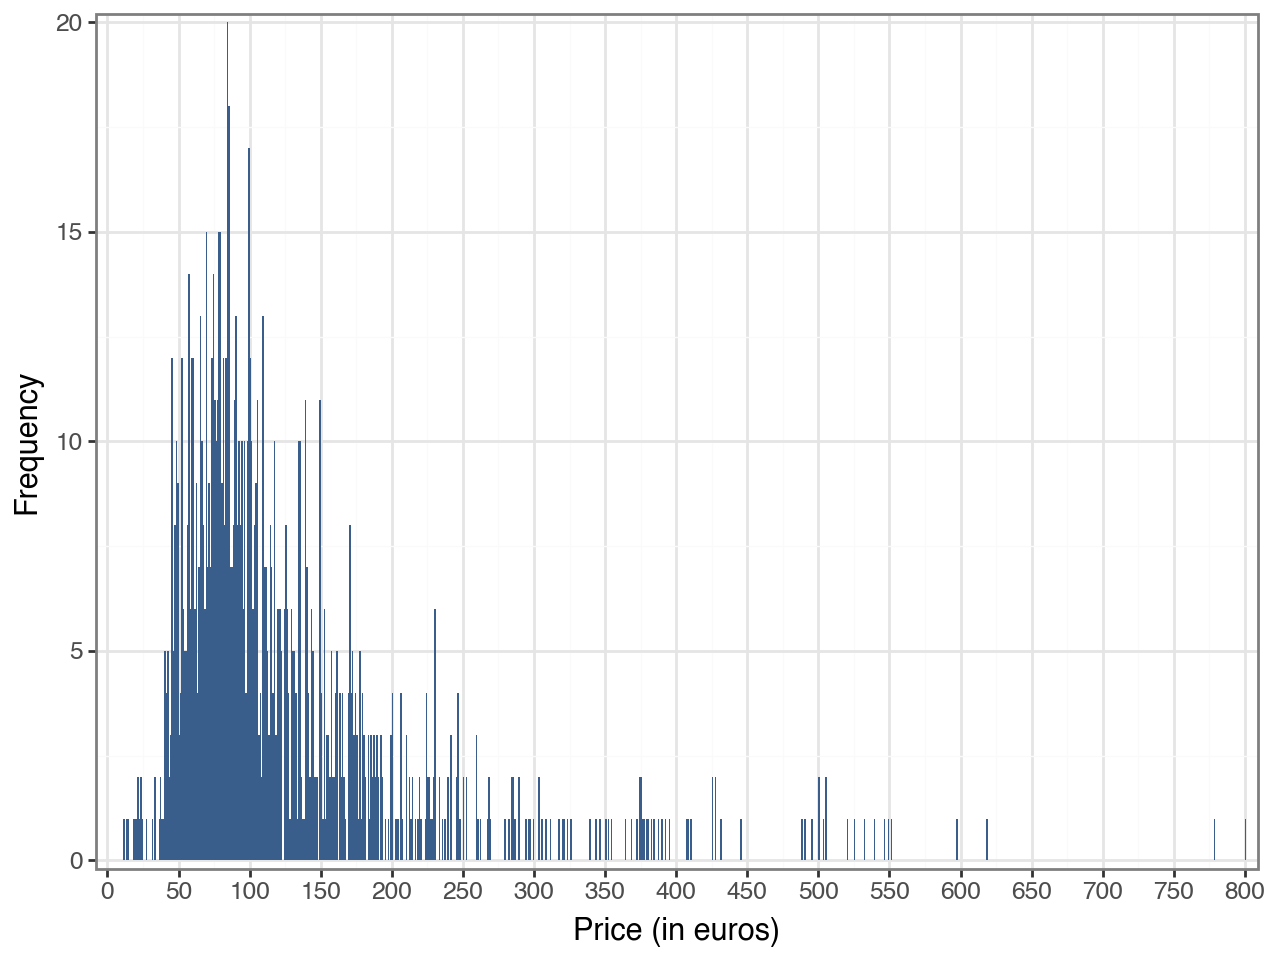

In [39]:
(
    ggplot(hotel_data, aes(x="Price_euro"))
    + geom_histogram(
        aes(y=after_stat("count / sum(count)")),
        binwidth=1,
        size=0.5
    )
    + geom_histogram(
        binwidth=1, fill=color[0], size=0.5, alpha=0.8, boundary=0, closed="left"
    )
    + labs(x="Price (in euros)", y="Frequency")
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 801], breaks=np.arange(0, 801, 50))
    + scale_y_continuous(expand=[0.01, 0.01])
    + theme_bw()
)


## **Figure 3.** b) Histogram of hotel price (in Euro)

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 1 rows containing missing values.


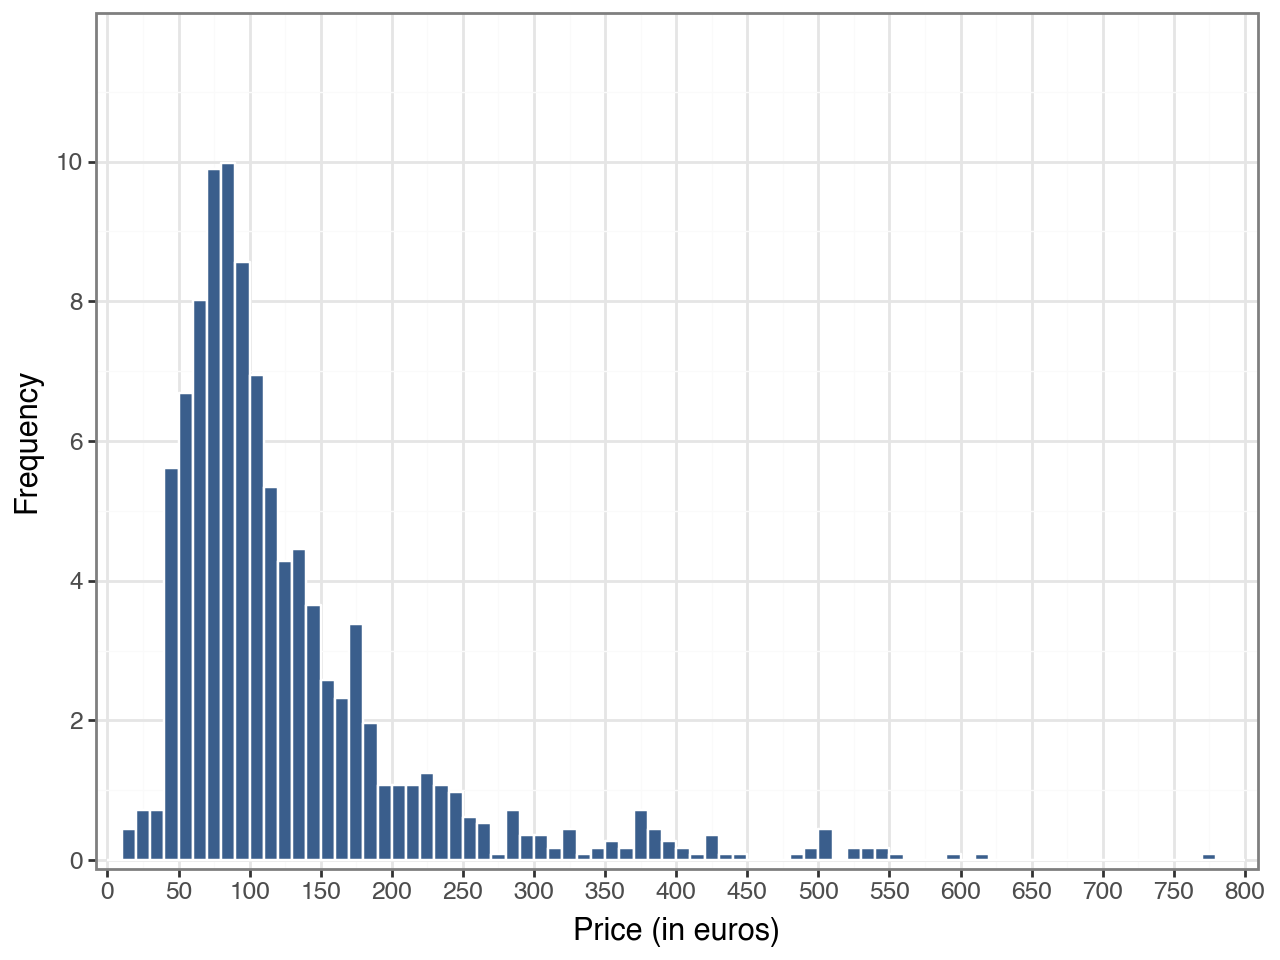

In [42]:
(
    ggplot(hotel_data, aes(x="Price_euro"))
    + geom_histogram(
        aes(y=after_stat("count / sum(count)*100")),
        binwidth=10,
        fill=color[0],
        color="white",
        boundary=0,
        closed="left",
    )
    + labs(x="Price (in euros)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 801], breaks=np.arange(0, 801, 50))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 12], breaks=np.arange(0, 12, 2))
    + theme_bw()
)


## **Figure 3.** c) Histogram of hotel price (in Euro)

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 1 rows containing missing values.


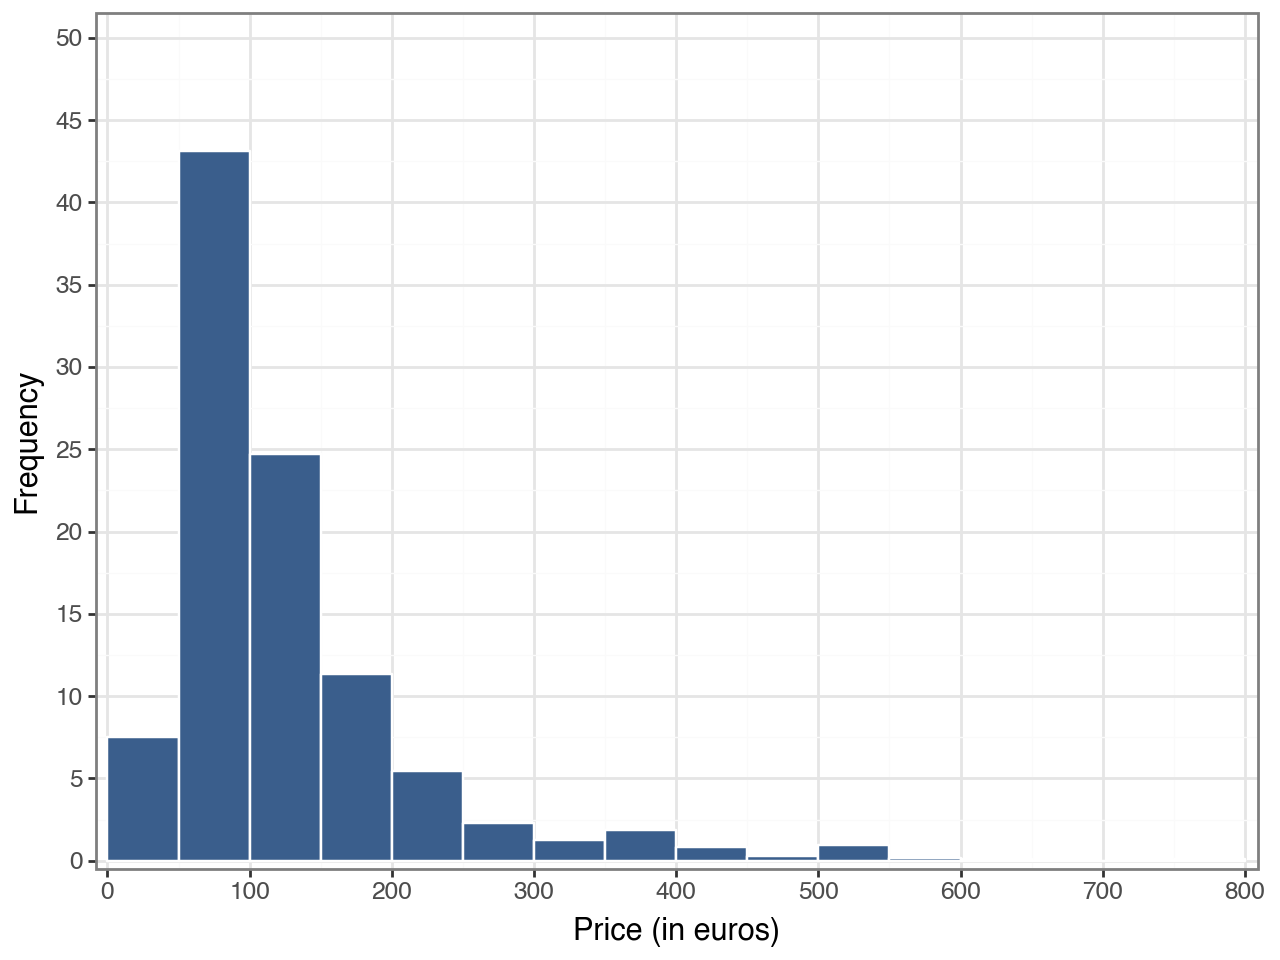

In [45]:
(
    ggplot(hotel_data, aes(x="Price_euro"))
    + geom_histogram(
        aes(y=after_stat("count / sum(count)*100")),
        binwidth=50,
        fill=color[0],
        color="white",
        boundary=0,
        closed="left",
    )
    + labs(x="Price (in euros)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 801], breaks=np.arange(0, 801, 100))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 51], breaks=np.arange(0, 51, 5))
    + theme_bw()
)

## **Figure 3.** d) Histogram of hotel price (in Euro)

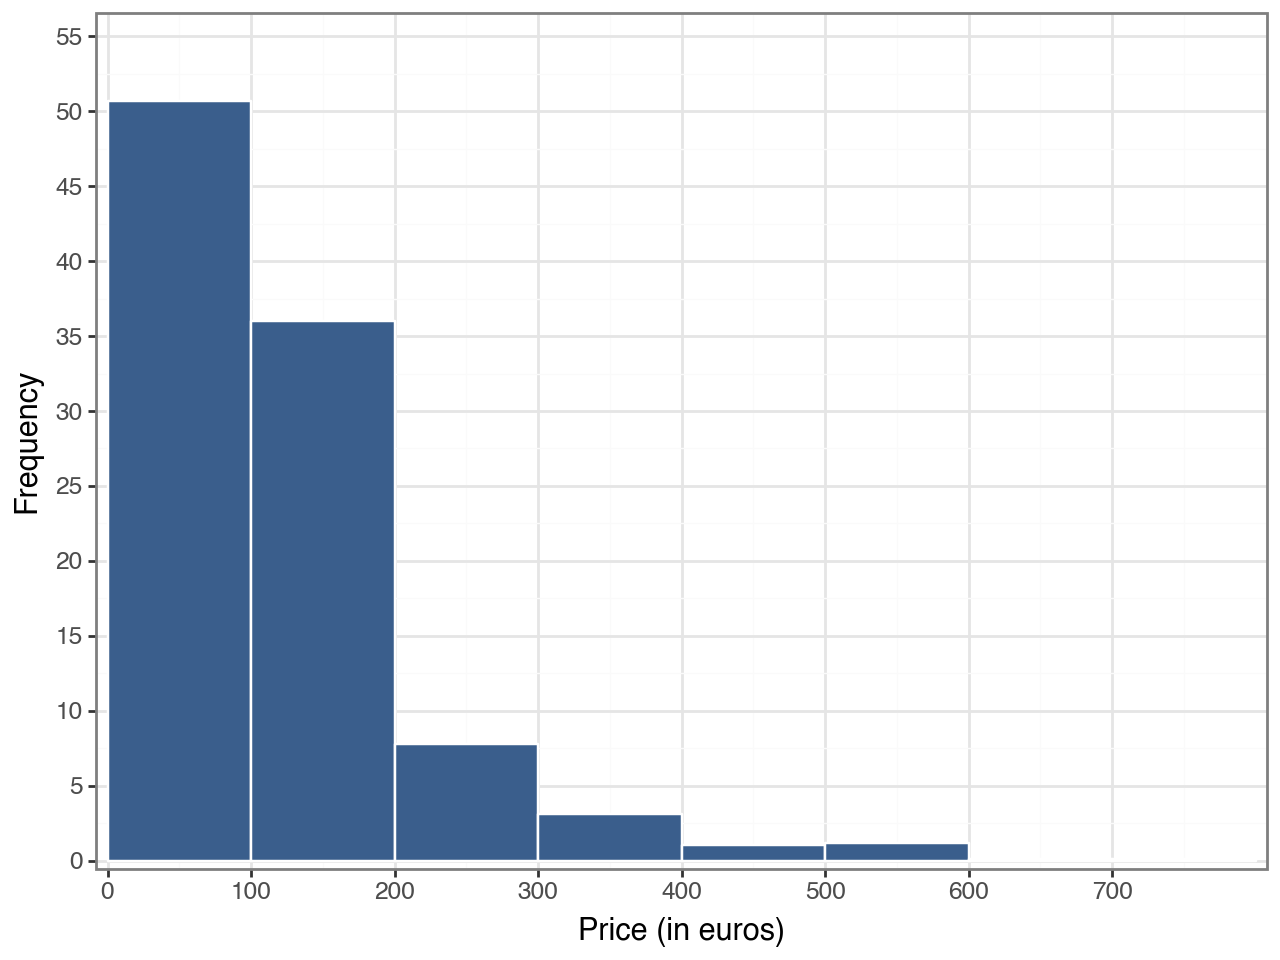

In [48]:
(
    ggplot(hotel_data, aes(x="Price_euro"))
    + geom_histogram(
        aes(y=after_stat("count / sum(count)*100")),
        binwidth=100,
        fill=color[0],
        color="white",
        boundary=0,
        closed="left",
    )
    + labs(x="Price (in euros)", y="Frequency")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 800], breaks=np.arange(0, 800, 100))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 56], breaks=np.arange(0, 56, 5))
    + theme_bw()
)

## **Figure 4.** Average room price of hotels in 4 cities (in Euro)

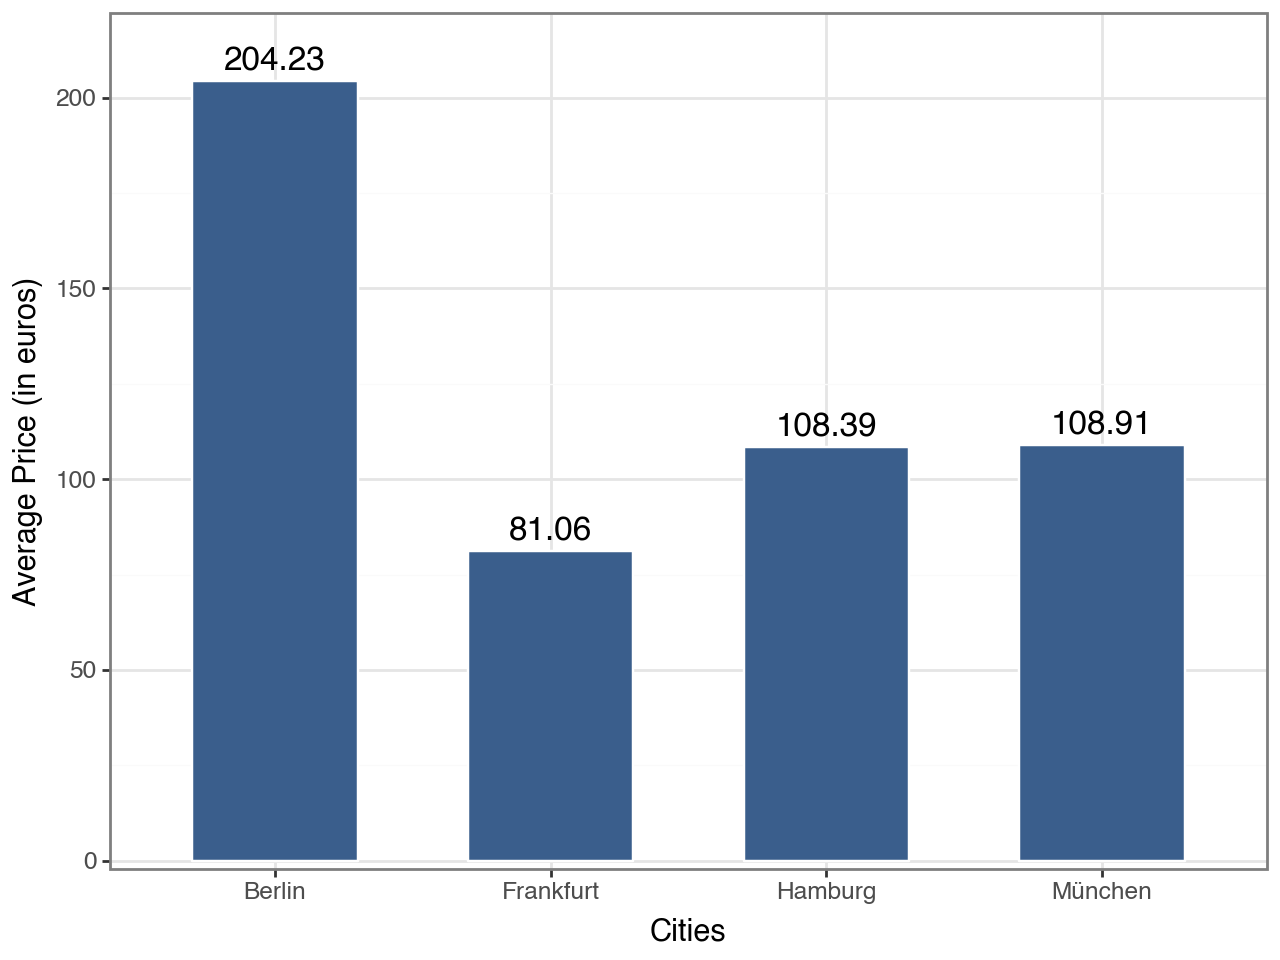

In [51]:
# Compute the average price per city
average_price = hotel_data.groupby('city')['Price_euro'].mean().reset_index()

(
    ggplot(average_price, aes(x='city', y='Price_euro', fill='city'))
    + geom_bar(stat='identity', position='dodge', width=0.6, color='white', size=0.5, alpha=0.8)
    + geom_text(
        aes(label=round(average_price['Price_euro'], 2)),  # Ensure proper access to Price_euro
        nudge_y=5,  # Adjust the vertical position of the text
        size=12     # Adjust the text size
    )
    + scale_y_continuous(expand=(0.01, 0.01), limits=[0, 220], breaks=np.arange(0, 220, 50))
    + labs(x='Cities', y='Average Price (in euros)')
    + theme_bw()
    + theme(legend_position='none')
    + scale_fill_manual(values=['#3a5e8cFF', '#3a5e8cFF', '#3a5e8cFF', '#3a5e8cFF'], name='City')
)

## **Figure 5.** Average distance from hotel to city center by cities, in km

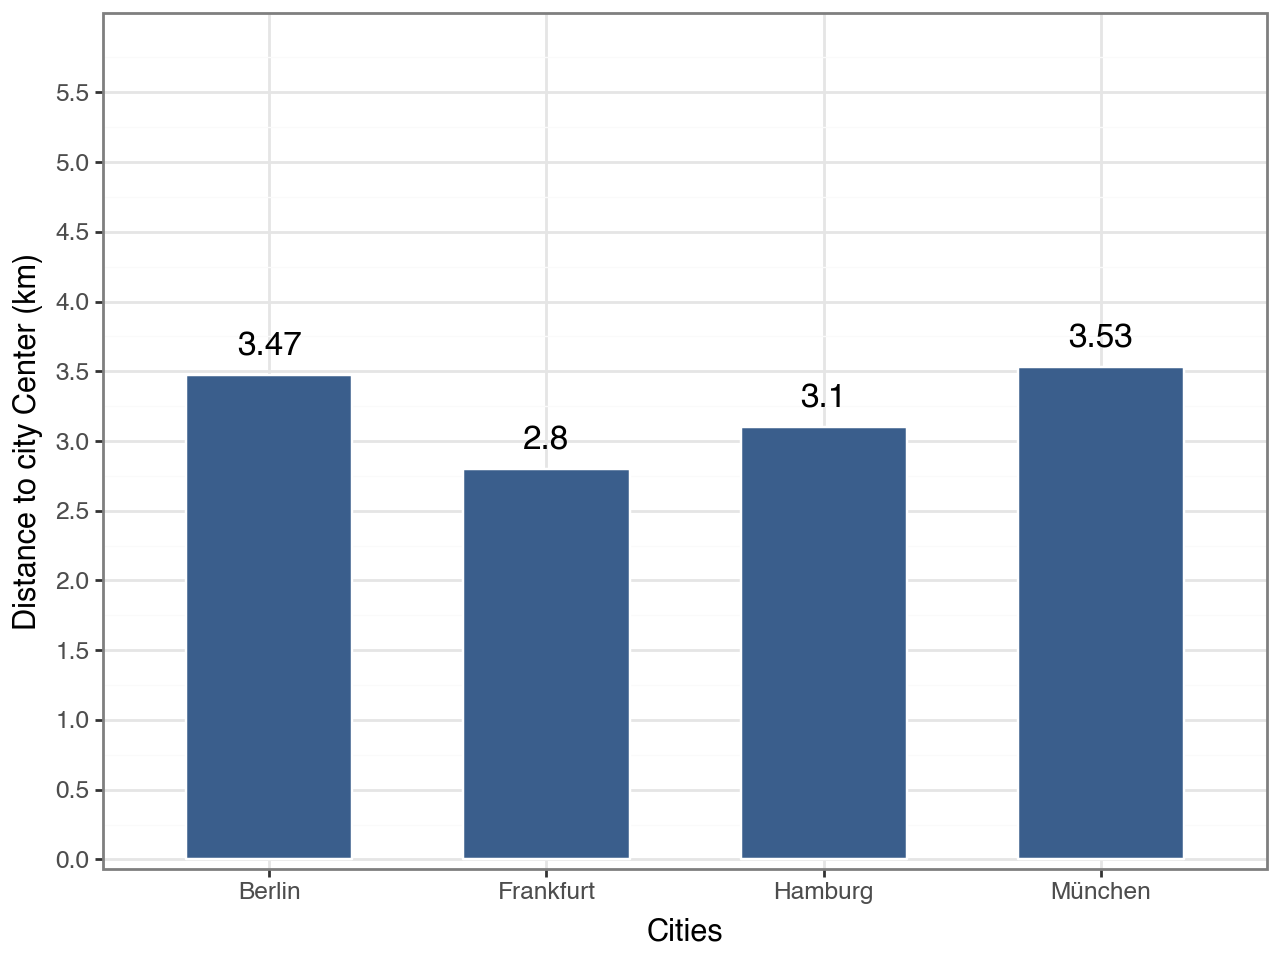

In [54]:
# Compute the average distance per city
average_distance = hotel_data.groupby('city')['distance_km'].mean().reset_index()

(
    ggplot(average_distance, aes(x='city', y='distance_km', fill='city'))
    + geom_bar(stat='identity', position='dodge', width=0.6, color='white', size=0.5, alpha=0.8)
    + geom_text(
        aes(label=round(average_distance['distance_km'], 2)),  # Ensure proper access to Price_euro
        nudge_y=0.2,  # Adjust the vertical position of the text
        size=12     # Adjust the text size
    )
    + scale_y_continuous(expand=(0.01, 0.01), limits=[0, 6], breaks=np.arange(0, 6, 0.5))
    + labs(x='Cities', y='Distance to city Center (km)')
    + theme_bw()
    + theme(legend_position='none')
    + scale_fill_manual(values=['#3a5e8cFF', '#3a5e8cFF', '#3a5e8cFF', '#3a5e8cFF'], name='City')
)

# **PART II. Regression Analysis** 

## **BERLIN**

## Summary statistics on price and distance

In [78]:
# Filter the dataset for observations from Berlin
Berlin_data = hotel_data[hotel_data['city'] == 'Berlin']

# Price
Berlin_data[['Price_euro']].describe(percentiles=[0.50,0.95])

Price_euro
count  289.000000
mean   204.231834
std    111.973451
min     21.000000
50%    172.000000
95%    429.400000
max    618.000000

In [80]:
# Distance
Berlin_data[['distance_km']].describe(percentiles=[0.50,0.95])

distance_km
count   289.000000
mean      3.473356
std       2.104282
min       0.200000
50%       3.100000
95%       7.660000
max      10.000000

## **Regression 1**: Close VS Far Regression with Binary Distance

In [83]:
# hotels = hotels.assign(dist2=lambda x: x.distance>=4)
Berlin_data["dist2"] = Berlin_data.distance_km.apply(lambda x: int(x>=4))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_77590/1039663581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [85]:
dist2 = Berlin_data.groupby("dist2").aggregate(Eprice_cat2=("Price_euro",np.mean))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_77590/541342845.py:1: FutureWarning: The provided callable <function mean at 0x103b47600> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


In [87]:
Berlin_data=Berlin_data.merge(dist2,left_on="dist2",right_on=dist2.index)

In [89]:
Berlin_data.dist2=Berlin_data.dist2.replace(0,"Close")
Berlin_data.dist2=Berlin_data.dist2.replace(1,"Far")

In [91]:
Berlin_data[["dist2","distance_km","Price_euro"]].groupby("dist2").aggregate("describe")

distance_km                                                  Price_euro  \
            count      mean       std  min  25%   50%    75%   max      count   
dist2                                                                           
Close       192.0  2.260417  0.919251  0.2  1.5  2.25  3.025   3.9      192.0   
Far          97.0  5.874227  1.684072  4.0  4.6  5.30  6.800  10.0       97.0   

                                                                  
             mean         std   min    25%    50%     75%    max  
dist2                                                             
Close  225.645833  114.790315  21.0  149.0  189.5  261.75  618.0  
Far    161.845361   93.087810  21.0  102.0  139.0  177.00  532.0

## **Figure 6**. a) Plot mean values by "Close" vs "Far"

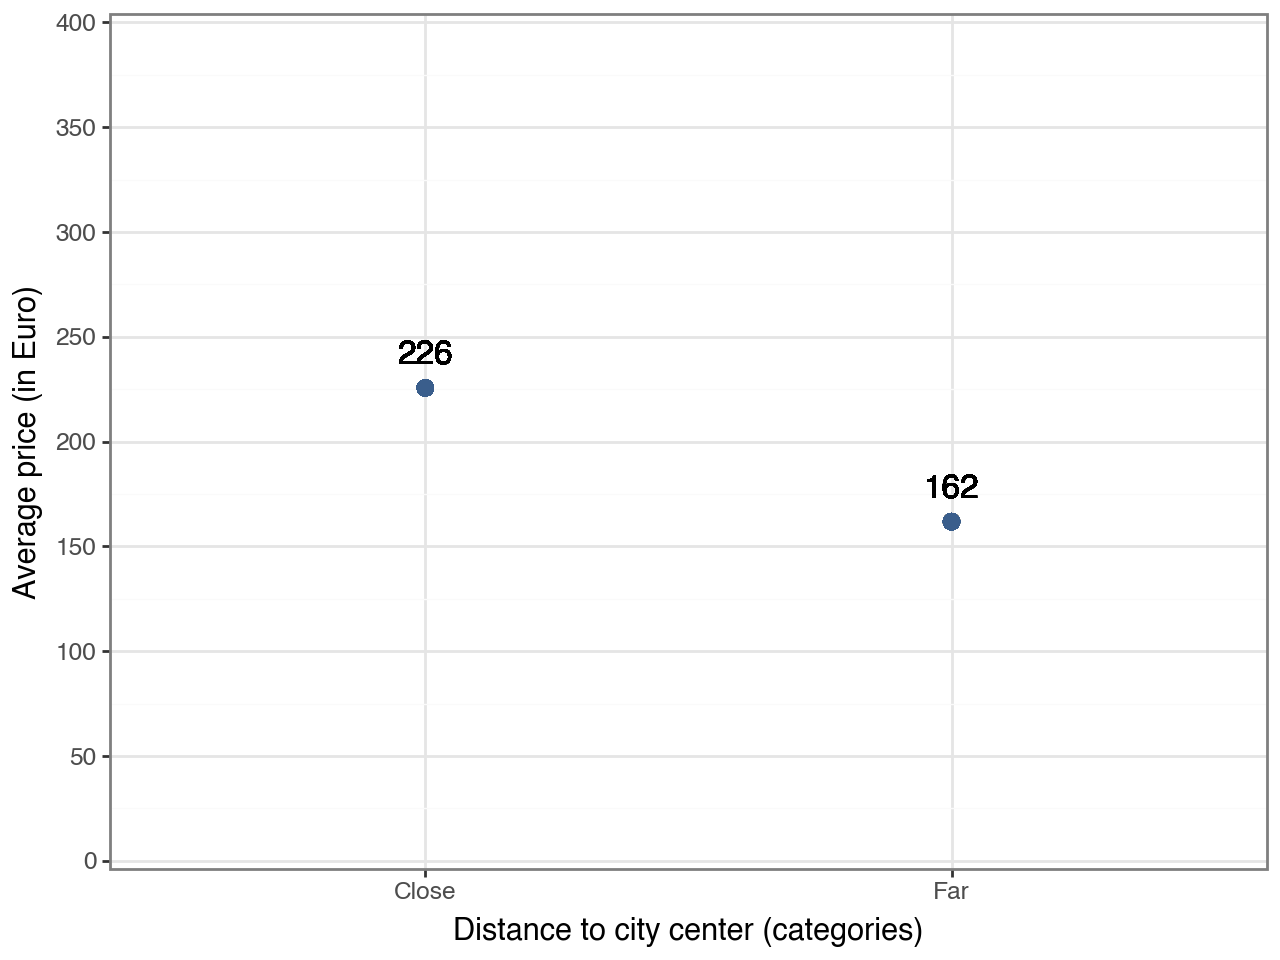

In [95]:
ggplot(Berlin_data) + geom_point(
    aes(x="dist2", y="Eprice_cat2"), size=2.5, color=color[0], fill=color[0], alpha=0.4
) + geom_text(
    aes(x="dist2", y="[x+15 for x in Eprice_cat2]", label=np.round(Berlin_data.Eprice_cat2).apply(int)),
    color="black",
    size=12,
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 400], breaks=seq(0, 400, 50)
) + expand_limits(
    y=0.01
) + scale_x_discrete() + labs(
    x="Distance to city center (categories)", y="Average price (in Euro)"
) + theme_bw()

In [97]:
Berlin_data["dist10"] = Berlin_data.distance_km.apply(
    lambda x: 0.5 + 1 * int(x >= 1) + 1 * int(x >= 2) + 1 * int(x >= 3) + 1 * int(x >= 4) + 1 * (x >= 5) + 1 * (x >= 6) + 1 * (x >= 7) + 1 * (x >= 8) + 1 * (x >= 9) + 1 * (x >= 10)
)

In [99]:
dist10 = Berlin_data.groupby("dist10").aggregate(Eprice_cat10=("Price_euro", np.mean))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_77590/3165553596.py:1: FutureWarning: The provided callable <function mean at 0x103b47600> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


In [101]:
Berlin_data = Berlin_data.merge(dist10, left_on="dist10", right_on=dist10.index)

In [103]:
Berlin_data[["dist10", "distance_km", "Price_euro"]].groupby("dist10").aggregate("describe")

distance_km                                                          \
             count       mean       std   min     25%    50%     75%   max   
dist10                                                                       
0.5           14.0   0.757143  0.191007   0.2   0.725   0.80   0.900   0.9   
1.5           70.0   1.492857  0.277317   1.0   1.300   1.50   1.700   1.9   
2.5           58.0   2.525862  0.274380   2.0   2.300   2.60   2.775   2.9   
3.5           50.0   3.448000  0.280117   3.0   3.200   3.40   3.700   3.9   
4.5           37.0   4.443243  0.305996   4.0   4.200   4.40   4.800   4.9   
5.5           25.0   5.352000  0.280060   5.0   5.100   5.30   5.500   5.9   
6.5           14.0   6.500000  0.288231   6.1   6.225   6.55   6.750   6.9   
7.5            7.0   7.414286  0.241030   7.1   7.250   7.40   7.600   7.7   
8.5            6.0   8.433333  0.287518   8.2   8.200   8.35   8.575   8.9   
9.5            7.0   9.728571  0.179947   9.4   9.650   9.80   9.850   9.9   
10.5           1.0  10.000000       NaN  10.0  10.000  10.00  10.000  10.0   

       Price_euro                                                               
            count        mean         std    min     25%    50%     75%    max  
dist10                                                                          
0.5          14.0  301.714286  127.265579  163.0  191.25  249.5  384.00  503.0  
1.5          70.0  212.214286   86.636822   22.0  167.50  189.0  246.00  551.0  
2.5          58.0  228.948276  116.908184   67.0  149.25  198.0  245.75  618.0  
3.5          50.0  219.320000  136.500496   21.0  134.00  165.0  288.00  597.0  
4.5          37.0  179.459459   94.401799   23.0  121.00  158.0  230.00  431.0  
5.5          25.0  190.360000  114.259164   21.0  119.00  156.0  224.00  532.0  
6.5          14.0  141.000000   79.268774   60.0   96.75  125.5  153.75  389.0  
7.5           7.0  114.428571   23.351354   89.0   95.50  117.0  124.50  155.0  
8.5           6.0  106.000000   27.085051   85.0   89.75   95.5  110.25  157.0  
9.5           7.0  114.142857   51.105866   66.0   72.50   83.0  166.50  172.0  
10.5          1.0   90.000000         NaN   90.0   90.00   90.0   90.00   90.0

## **Figure 6**. b) Plot mean values by every 1 km

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


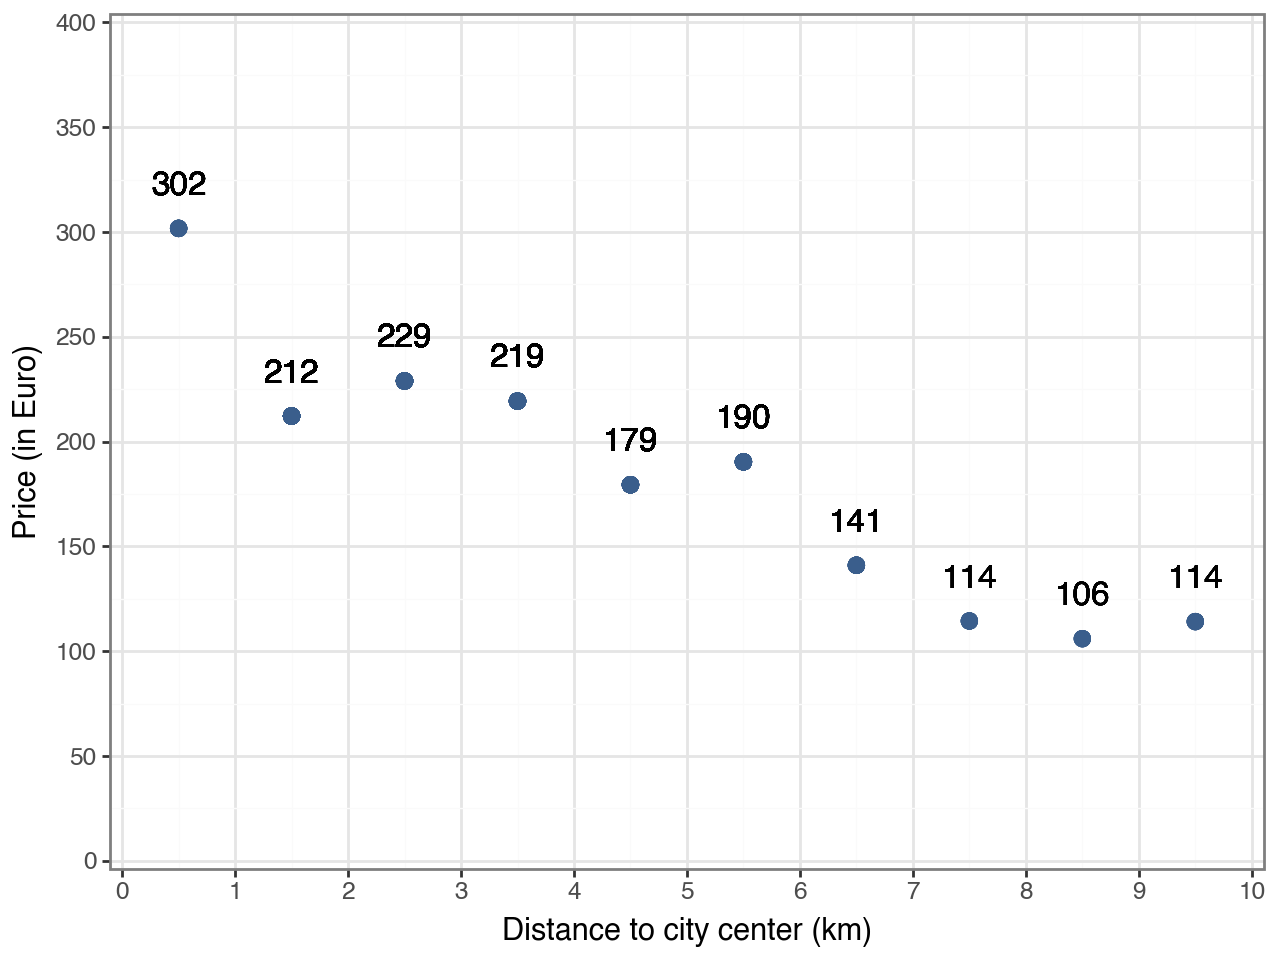

In [105]:
ggplot(data=Berlin_data) + geom_point(
    aes(x="dist10", y="Eprice_cat10"),
    size=2.5,
    color=color[0],
    fill=color[0],
    alpha=0.4,
) + geom_text(
    aes(
        x="dist10",
        y="[x+20 for x in Eprice_cat10]",
        label=np.round(Berlin_data.Eprice_cat10).apply(int),
    ),
    color="black",
    size=12,
) + expand_limits(
    x=0.01, y=0.01
) + coord_cartesian(
    xlim=[0, 10], ylim=[0, 400]
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 400], breaks=seq(0, 401, 50)
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 10], breaks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + theme_bw()

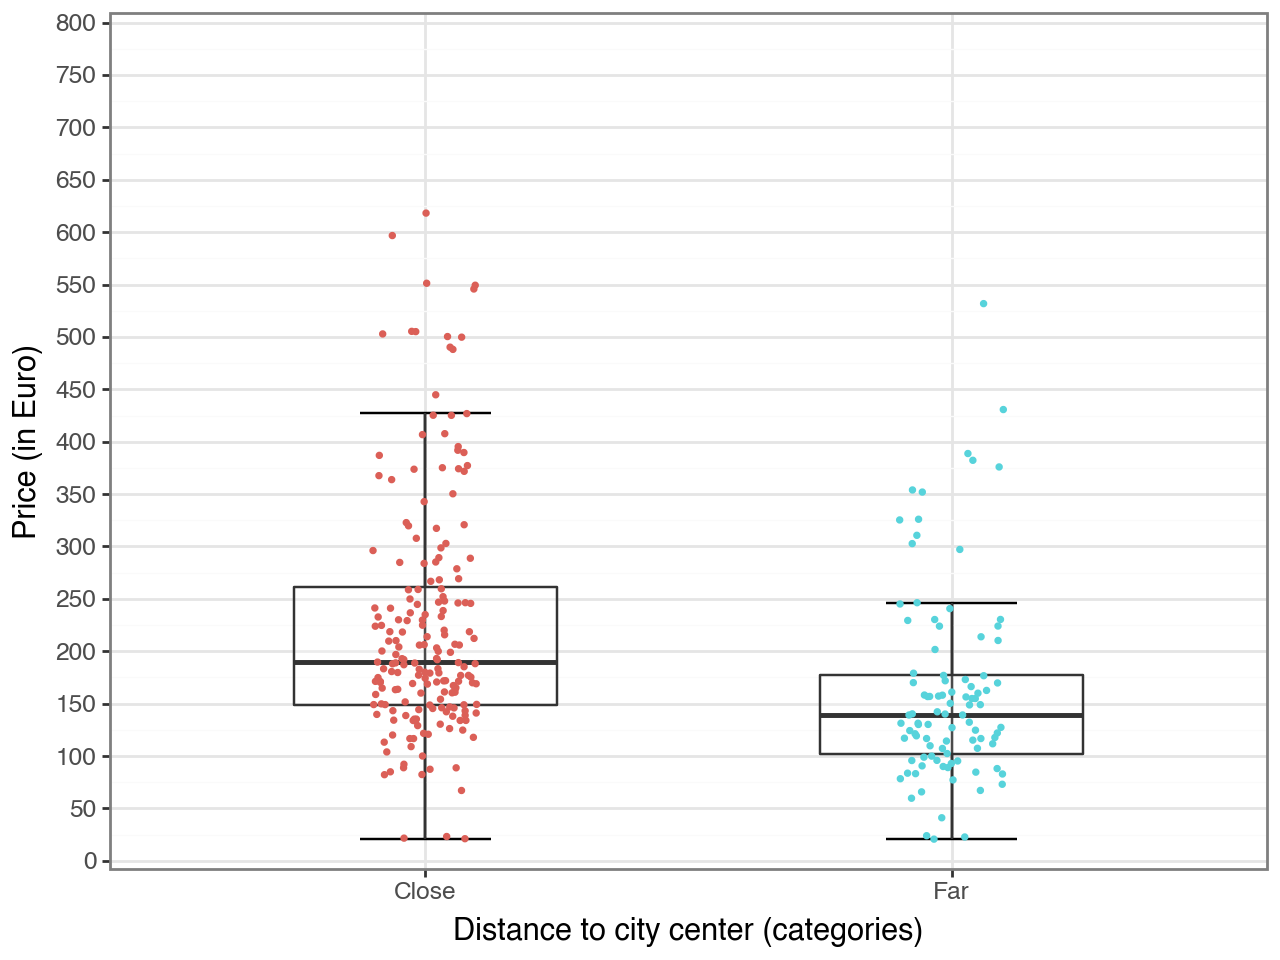

In [107]:
ggplot(Berlin_data, aes(x="dist2", y="Price_euro")) + stat_boxplot(
    aes(group="dist2"),
    geom="errorbar",
    width=0.25,
    size=0.5
) + geom_boxplot(
    aes(group="dist2"),
    size=0.5,
    width=0.5,
    alpha=0.3,
    outlier_shape="",
) + geom_jitter(
    aes(color="dist2"), position=position_jitter(0.1), size=0.5, show_legend=False
) + labs(
    x="Distance to city center (categories)", y="Price (in Euro)"
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 801], breaks=seq(0, 801, 50)
) + expand_limits(
    y=0.01
) + theme_bw()

## **Figure 7.** Price and distance to the city center: non-parametric regression and scatterplot

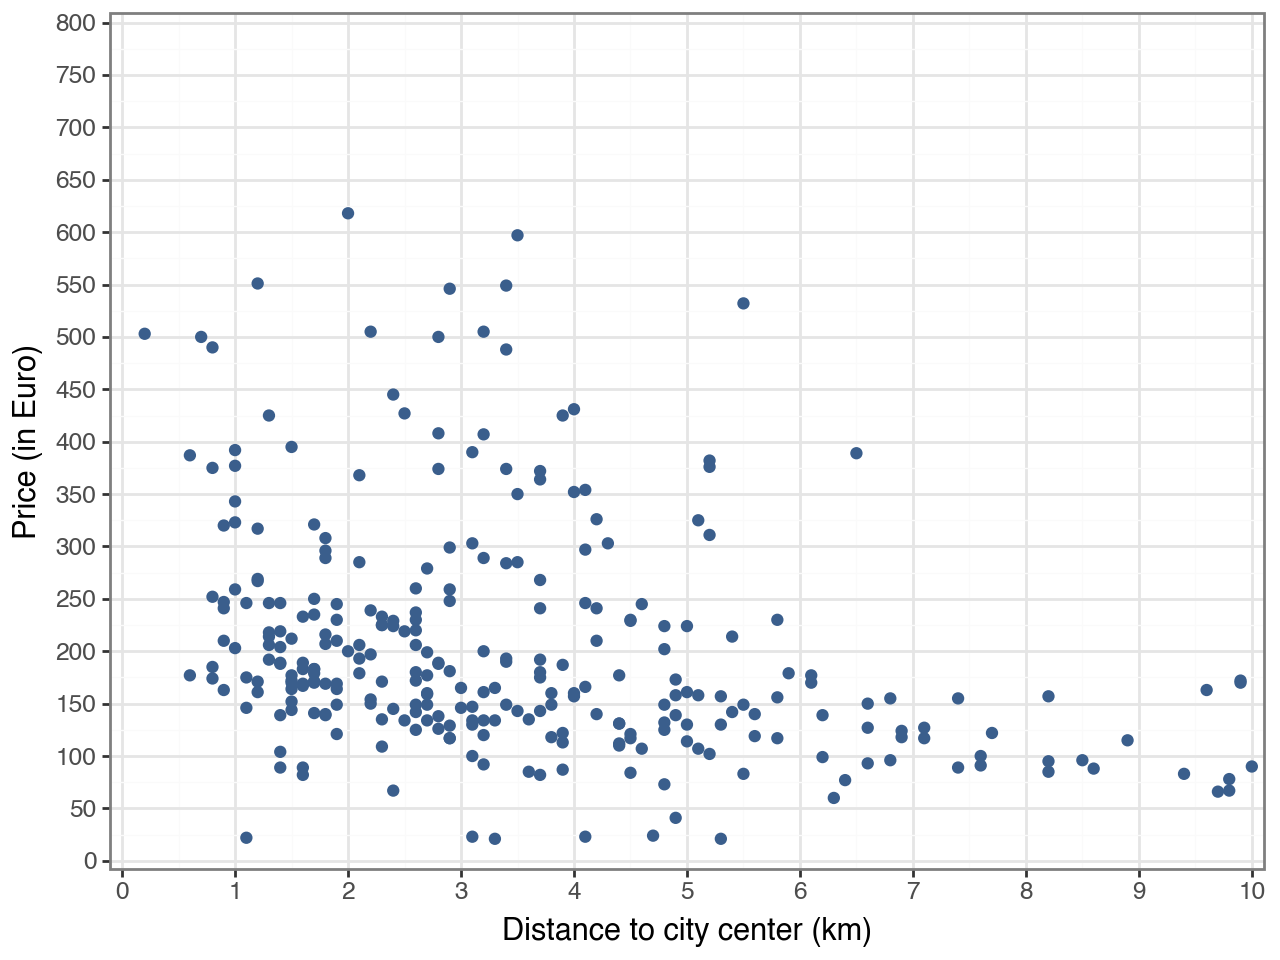

In [115]:
p1 = (
    ggplot(Berlin_data, aes(x="distance_km", y="Price_euro"))
    + geom_point(color=color[0])
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 10], breaks=seq(0, 10, 1))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 801], breaks=seq(0, 801, 50))
    + labs(x="Distance to city center (km)", y="Price (in Euro)")
    + theme_bw()
)
p1

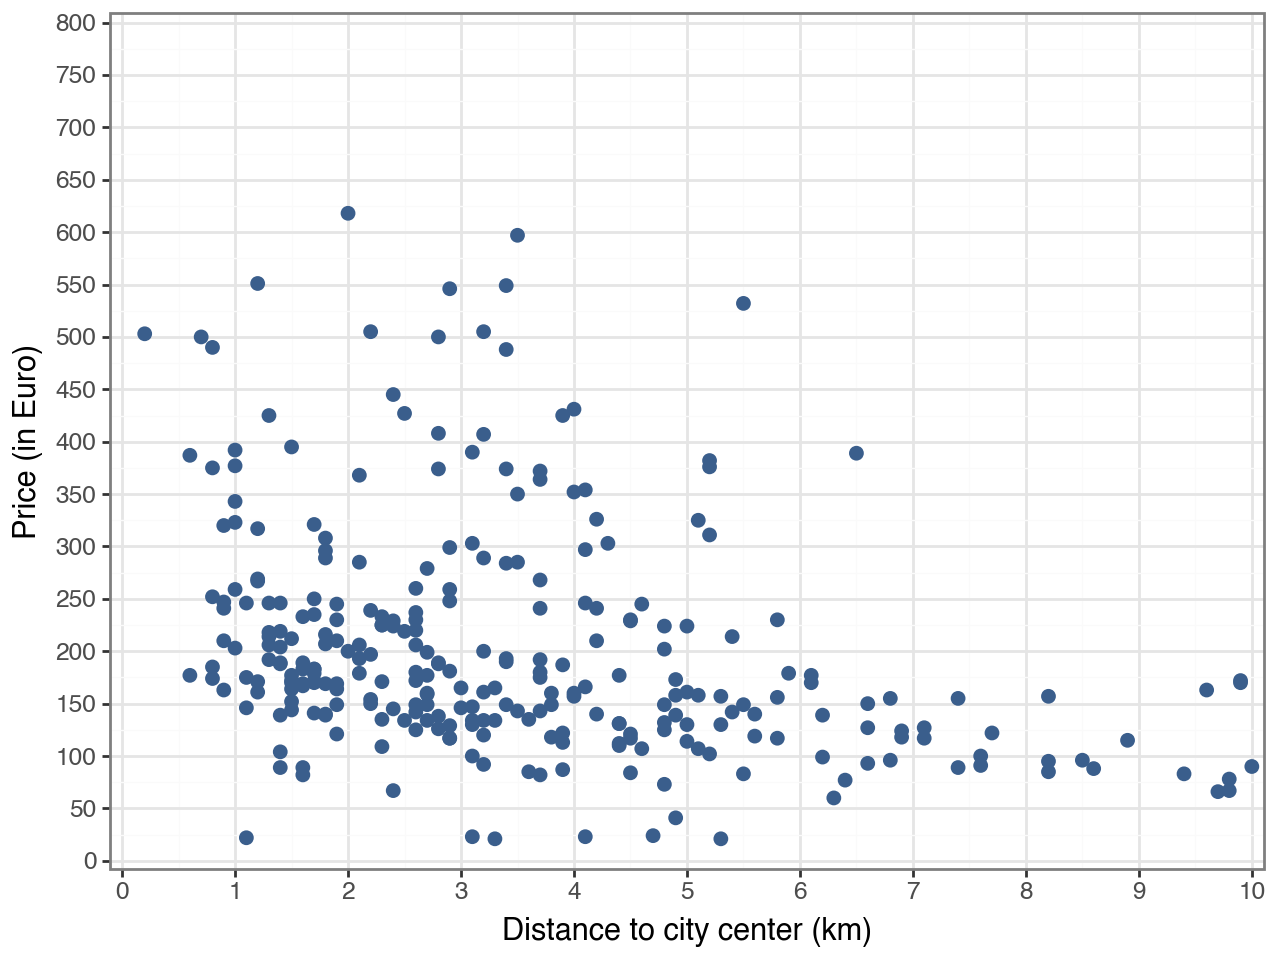

In [117]:
# large sized graphs
ggplot(Berlin_data) + geom_point(
    aes(x="distance_km", y="Price_euro"),
    color=color[0],
    size=2,
    alpha=0.5,
    show_legend=False,
    na_rm=True,
) + expand_limits(x=0.01, y=0.01) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 10], breaks=seq(0, 10, 1)
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 801], breaks=seq(0, 801, 50)
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + theme_bw()

## *Scatterplot with step function (we use 1 km bits for simpplicity using 10 bits)*

In [121]:
Berlin_data["dist10_s"] = Berlin_data.distance_km.apply(
    lambda x: 1 * int(x >= 1)
    + 1 * int(x >= 2)
    + 1 * int(x >= 3)
    + 1 * int(x >= 4)
    + 1 * int(x >= 5)
    + 1 * int(x >= 6)
    + 1 * int(x >= 7)
    + 1 * int(x >= 8)
    + 1 * int(x >= 9)
    + 1 * int(x >=10)
)
Berlin_data["xend"] = Berlin_data["dist10_s"] + 1
Berlin_data["yend"] = Berlin_data["Eprice_cat10"]

### *Non-parametric regression, 10 bins*

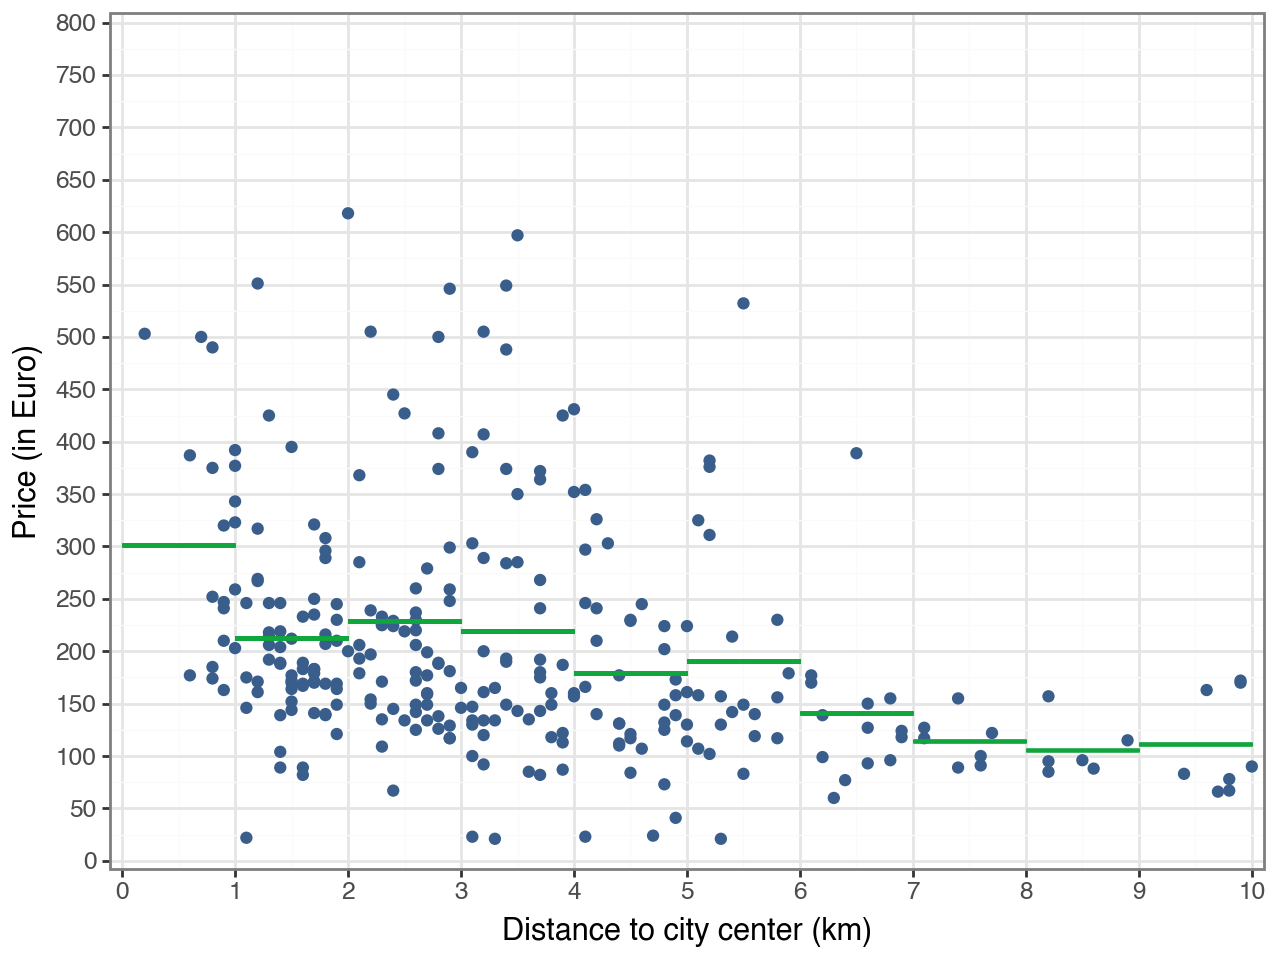

In [141]:
F07 = p1 + geom_segment(
    Berlin_data,
    aes("dist10_s", "yend", xend="xend", yend="yend"),
    color=color[1],
    size=0.7,
    na_rm=True,
)

F07

In [85]:
# !pip install scikit-misc

## **Figure 8.** Lowess Non-parametric regression

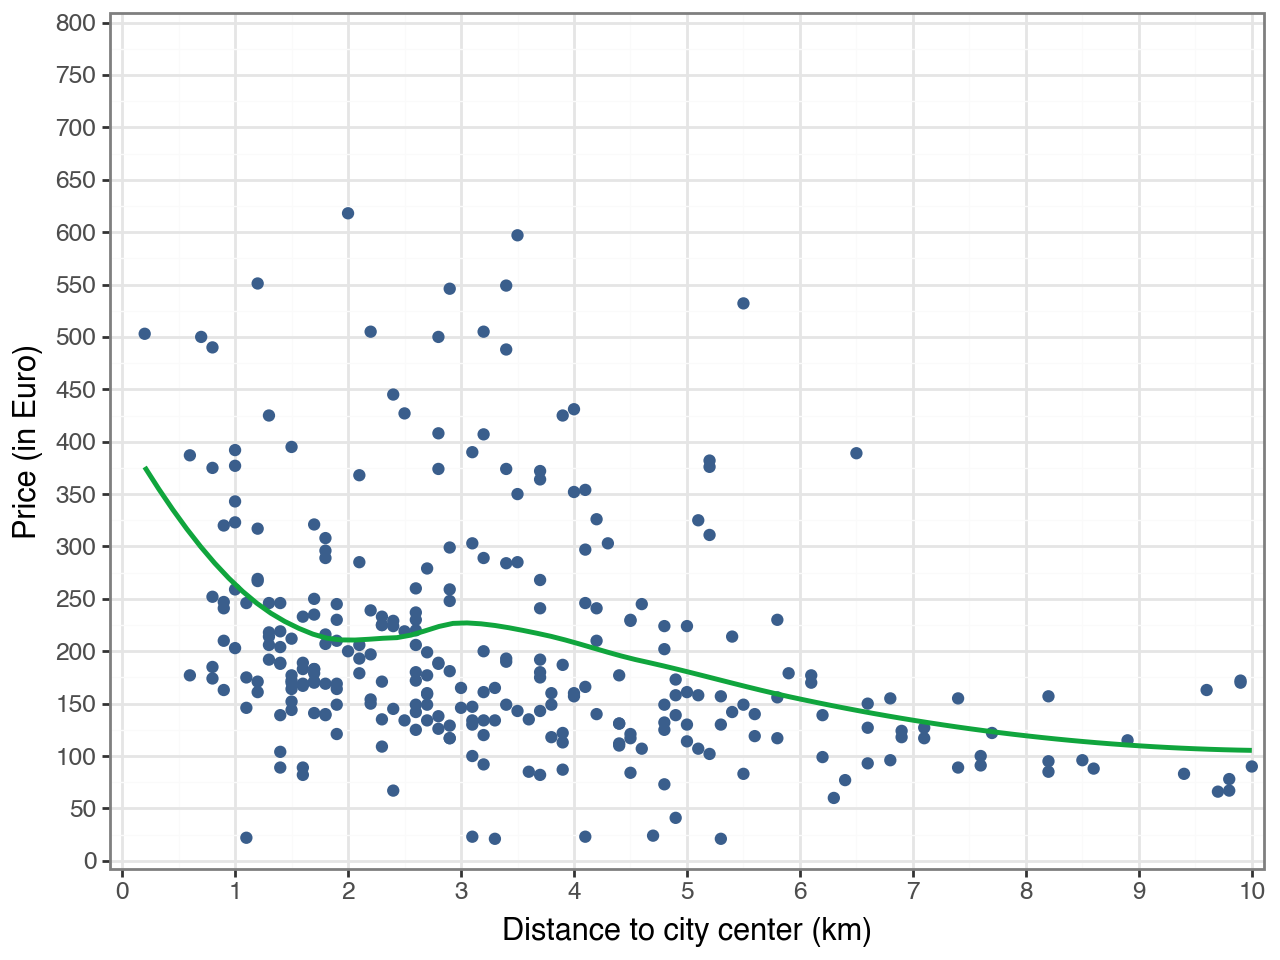

In [143]:
F08 = p1 + geom_smooth(method="loess", color=color[1],se=False)
F08

In [145]:
### LINEAR REGRESSIONS
regression = smf.ols(formula="Price_euro~distance_km", data=Berlin_data).fit()
regression.summary()
#regression.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_euro   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     33.30
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           2.04e-08
Time:                        00:25:13   Log-Likelihood:                -1757.3
No. Observations:                 289   AIC:                             3519.
Df Residuals:                     287   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     263.8283     12.069     21.860      0.000     240.073     287.583
distance_km   -17.1582      2.973     -5.771      0.000     -23.010     -11.306
==============================================================================
Omnibus:                       74.785   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.807
Skew:                           1.378   Prob(JB):                     4.38e-31
Kurtosis:                       5.005   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Figure 9.** Scatterplot + Regression Line

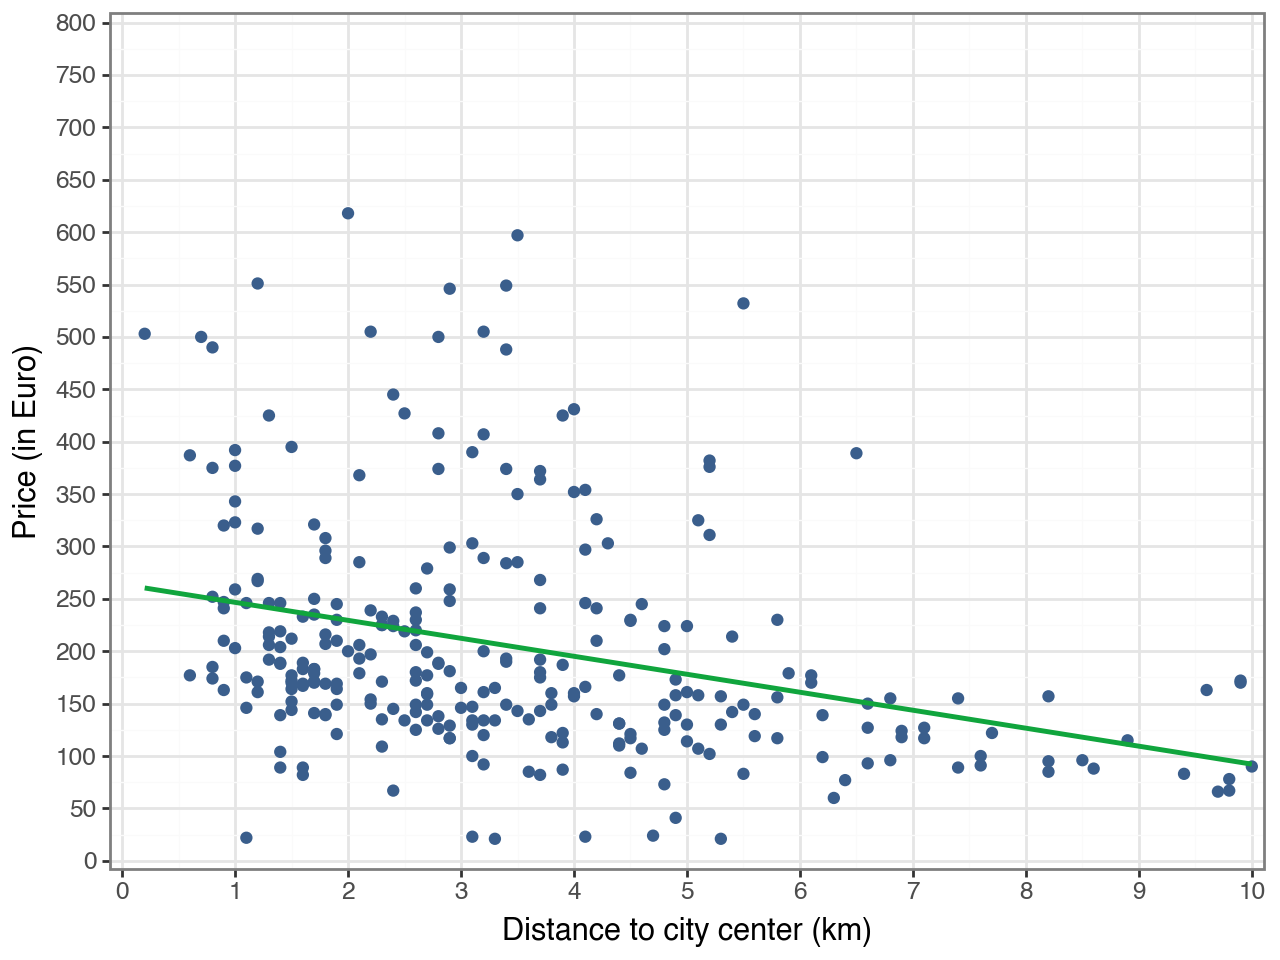

In [151]:
F09 = p1 + geom_smooth(method="lm", color=color[1],se=False)
F09

### * *The Linear regression goes through the averages. Scatterplot + Regression Line + Lines for averages*

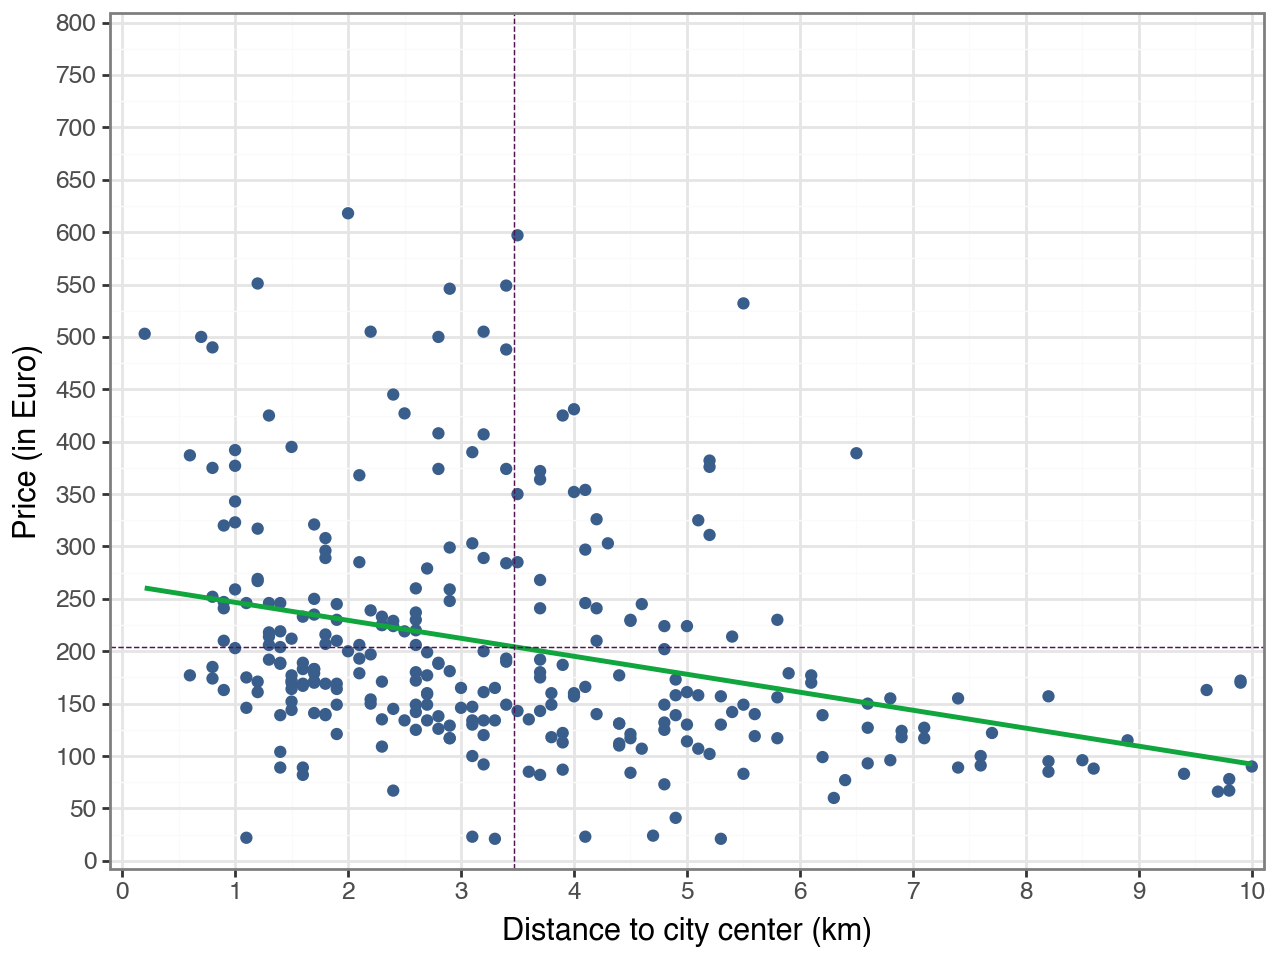

In [161]:
F09a = (
    p1
    + geom_smooth(method="lm", color=color[1],se=False)
    + geom_vline(
        xintercept=Berlin_data["distance_km"].mean(),
        color=color[2],
        linetype="dashed",
        size=0.3,
    )
    + geom_hline(
        yintercept=Berlin_data["Price_euro"].mean(), color=color[2], linetype="dashed", size=0.3
    )
)
F09a

### Predicted values and residuals of Linear regression

In [165]:
regression = smf.ols(formula="Price_euro~distance_km", data=Berlin_data).fit()

In [167]:
Berlin_data

hotel_id    city  check_in check_out  breakfast_0_1 accommadation_type  \
0           1  Berlin  2/5/2025  2/6/2025              0              Hotel   
1           3  Berlin  2/5/2025  2/6/2025              0              Hotel   
2           5  Berlin  2/5/2025  2/6/2025              0              Hotel   
3           9  Berlin  2/5/2025  2/6/2025              0              Hotel   
4          10  Berlin  2/5/2025  2/6/2025              0              Hotel   
..        ...     ...       ...       ...            ...                ...   
284       431  Berlin  2/5/2025  2/6/2025              0         Aparthotel   
285       441  Berlin  2/5/2025  2/6/2025              0              Hotel   
286       450  Berlin  2/5/2025  2/6/2025              0              Hotel   
287       460  Berlin  2/5/2025  2/6/2025              0              Hotel   
288       464  Berlin  2/5/2025  2/6/2025              0         Aparthotel   

     distance_km  Sustain_cert  reviews_0_10  nr_reviews  ...  dist2  \
0            2.9             0           8.2        3159  ...  Close   
1            7.4             0           8.7          44  ...    Far   
2            3.9             0           8.5       23837  ...  Close   
3            3.8             0           8.4        7916  ...  Close   
4            5.6             1           8.3        9294  ...    Far   
..           ...           ...           ...         ...  ...    ...   
284          5.0             0           8.2         603  ...    Far   
285          2.8             0           8.4        5911  ...  Close   
286          3.4             0           8.7        5824  ...  Close   
287          2.0             1           8.6        2398  ...  Close   
288          3.5             0           8.7         475  ...  Close   

     Eprice_cat2 dist10  Eprice_cat10  dist10_s  xend        yend  dist7_new  \
0     225.645833    2.5    228.948276         2     3  228.948276        3.5   
1     161.845361    7.5    114.428571         7     8  114.428571        8.5   
2     225.645833    3.5    219.320000         3     4  219.320000        4.5   
3     225.645833    3.5    219.320000         3     4  219.320000        4.5   
4     161.845361    5.5    190.360000         5     6  190.360000        6.5   
..           ...    ...           ...       ...   ...         ...        ...   
284   161.845361    5.5    190.360000         5     6  190.360000        6.5   
285   225.645833    2.5    228.948276         2     3  228.948276        3.5   
286   225.645833    3.5    219.320000         3     4  219.320000        4.5   
287   225.645833    2.5    228.948276         2     3  228.948276        3.5   
288   225.645833    3.5    219.320000         3     4  219.320000        4.5   

     Eprice_cat7_new  dist7_s  
0         228.948276        2  
1         114.428571        7  
2         219.320000        3  
3         219.320000        3  
4         190.360000        5  
..               ...      ...  
284       190.360000        5  
285       228.948276        2  
286       219.320000        3  
287       228.948276        2  
288       219.320000        3  

[289 rows x 22 columns]

In [169]:
Berlin_data["predprice"] = regression.predict()
Berlin_data["e"] = regression.resid

In [171]:
type(regression)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [185]:
xa= 5.4
ya= 158
ym= 215 
# FIXME
# ym  --should be replaced with predicted value directly

/opt/anaconda3/lib/python3.12/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/opt/anaconda3/lib/python3.12/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 20 rows containing missing values.


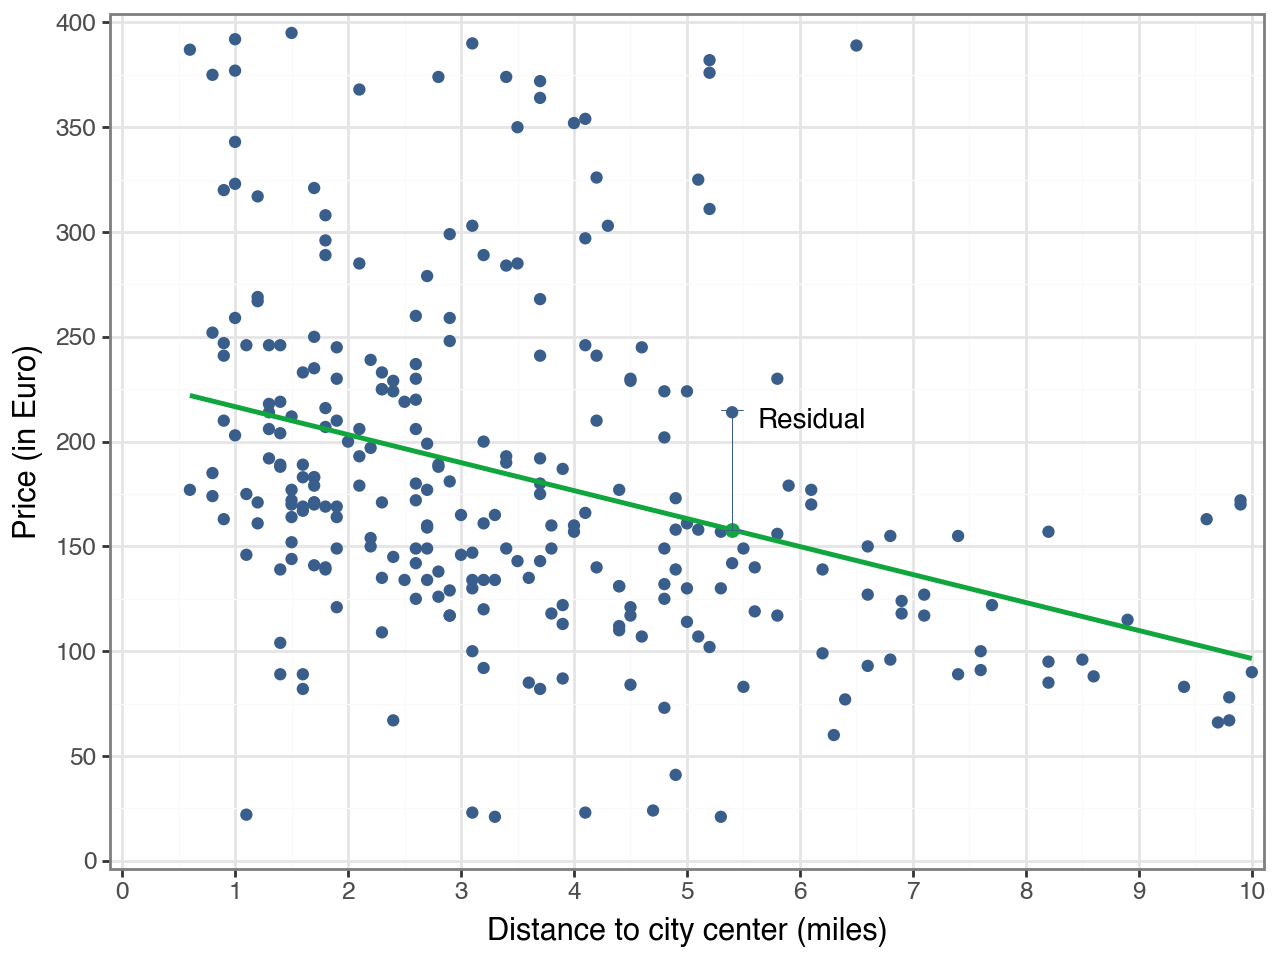

In [197]:
F09b = (
    p1
    + geom_smooth(method="lm", color=color[1], se=False)
    + annotate(
        "text",
        x=6.1,
        y=210,
        label="Residual",
        size=10,
    )
    + annotate("pointrange", x=xa, y=ya, ymin=ya, ymax=ya, color=color[1], size=0.5)
    + geom_errorbar(
        Berlin_data.loc[Berlin_data["distance_km"] == xa],
        aes(x="distance_km", ymin=ym, ymax=ya),
        width=0.2,
        size=0.2,
        color=color[0],
    )
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 10), breaks=seq(0, 10, by=1))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 400), breaks=seq(0, 400, by=50)
    )
    + labs(x="Distance to city center (miles)", y="Price (in Euro)")
    + theme_bw()
)

F09b

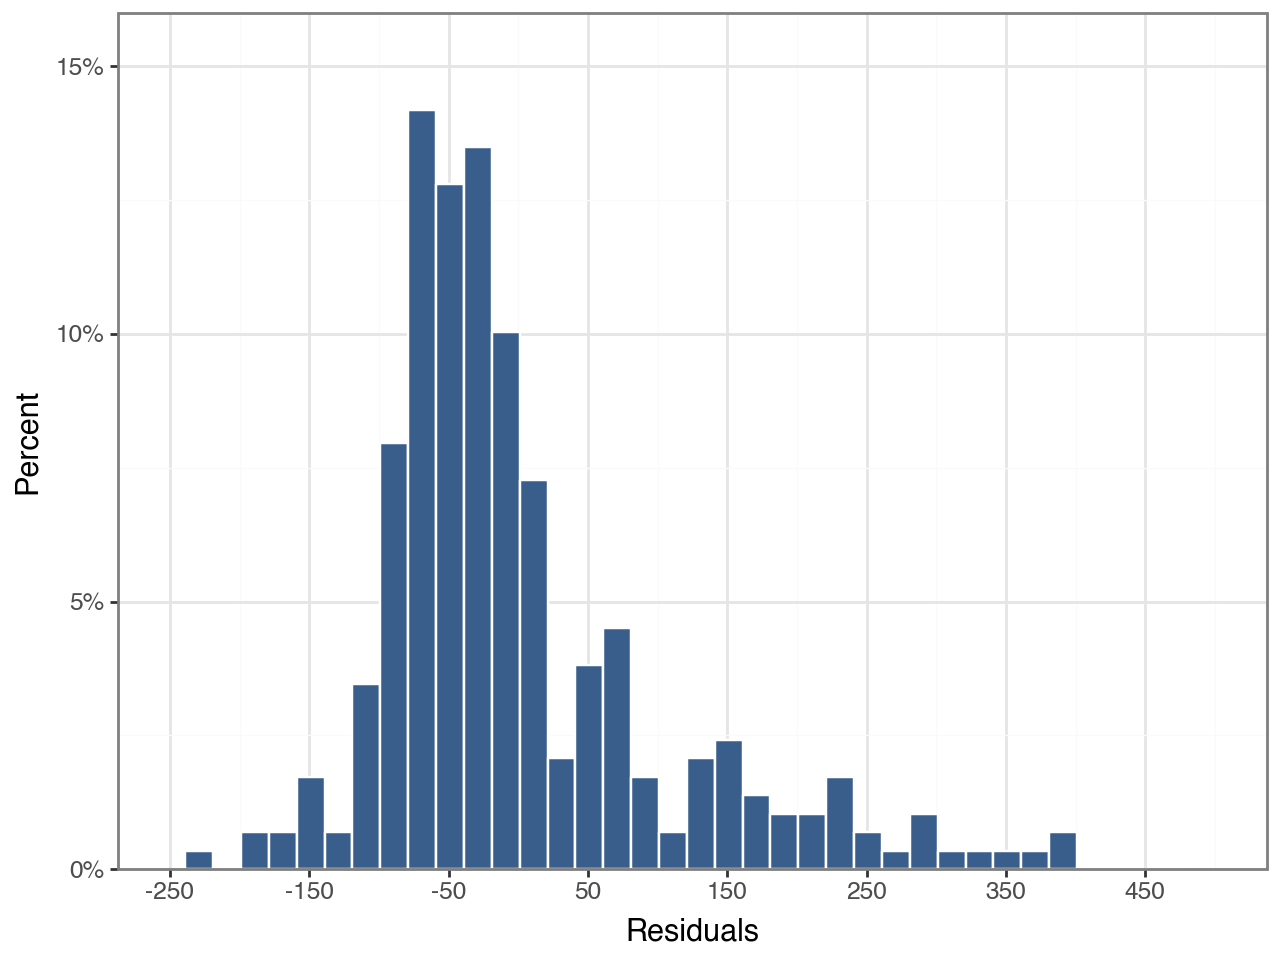

In [221]:
# histogram of residuals
F09c = ggplot(Berlin_data, aes(x="e")) + geom_histogram(
    aes(y="(..count..)/sum(..count..)"),
    binwidth=20,
    boundary=1,
    fill=color[0],
    color="white",
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + labs(x="Residuals", y="Percent") + scale_x_continuous(
    limits=(-250, 500), breaks=seq(-250, 500, by=100)
) + scale_y_continuous(
    expand=(0, 0), limits=(0, 0.16), breaks=seq(0, 0.16, by=0.05), labels=percent_format()
) + theme_bw()

F09c

In [223]:
Berlin_data["reg1_res"] = ["overpriced" if e >= 0 else "underpriced" for e in Berlin_data["e"]]

In [225]:
Berlin_data.loc[Berlin_data["e"].sort_values().tail().index, "reg1_res"] = "top5"
Berlin_data.loc[Berlin_data["e"].sort_values().head().index, "reg1_res"] = "bottom5"

In [227]:
bestdeals = Berlin_data.loc[Berlin_data["e"].sort_values().head().index]

## **Figure 10.** Underpriced hotels in Berlin

In [ ]:
### Figure 10
### adding annotation

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 15 rows containing missing values.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


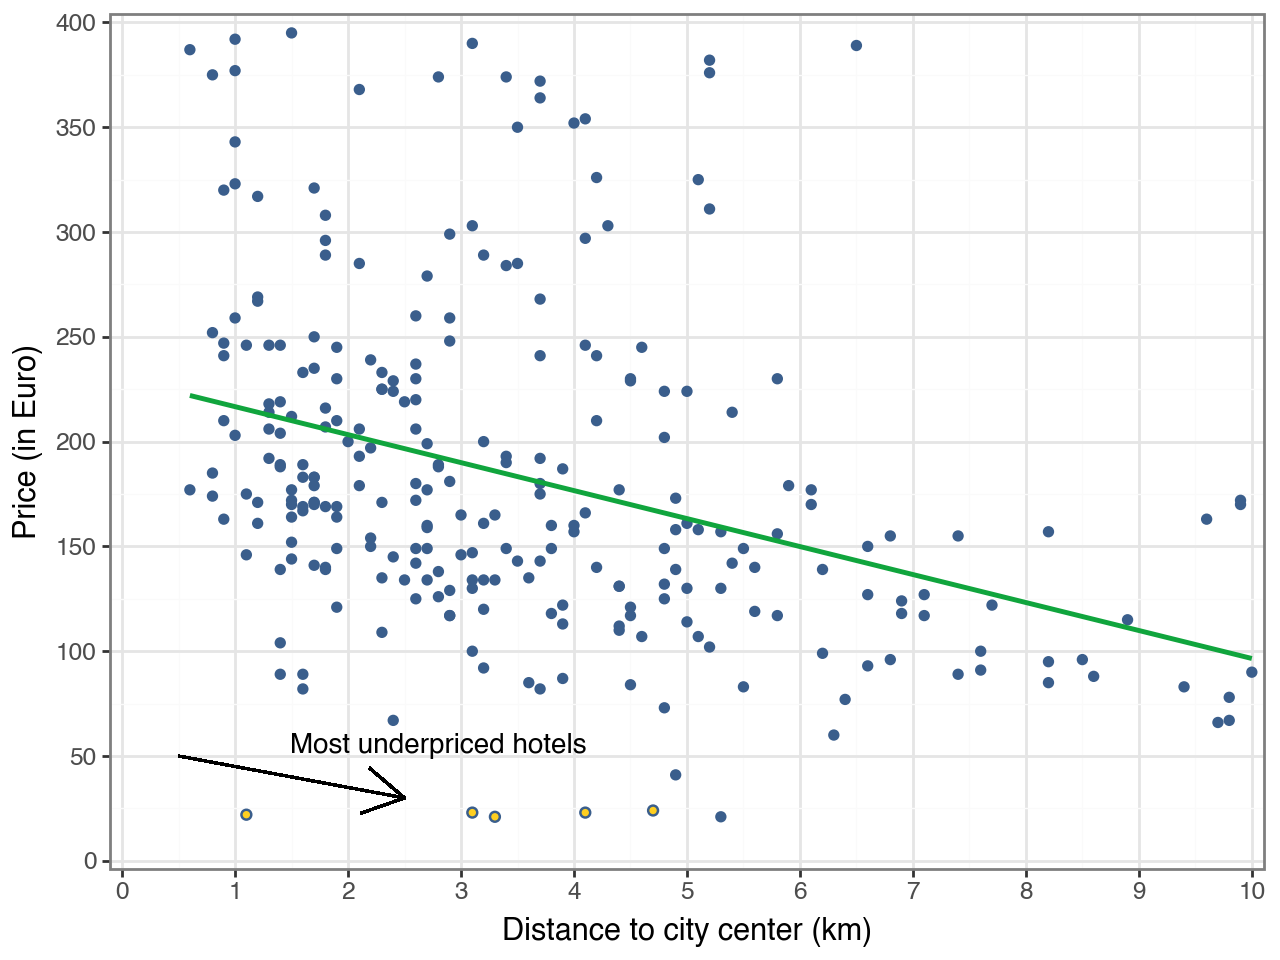

In [276]:
ggplot(Berlin_data, aes(x="distance_km", y="Price_euro")) + geom_point(
    Berlin_data.loc[Berlin_data["reg1_res"] == "overpriced"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_point(
    Berlin_data.loc[Berlin_data["reg1_res"] == "underpriced"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_point(
    Berlin_data.loc[Berlin_data["reg1_res"] == "bottom5"],
    aes(color="reg1_res", fill="reg1_res"),
    size=1.5,
    alpha=0.8,
    show_legend=False,
) + geom_point(
    Berlin_data.loc[Berlin_data["reg1_res"] == "top5"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_smooth(
    method="lm", size=1, color=color[1], se=False
) + coord_cartesian(
    xlim=(0, 10), ylim=(0, 400)
) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 10), breaks=seq(0, 10, by=1)
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 400), breaks=seq(0, 401, by=50)
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + scale_color_manual(
    name="", values=(color[0], color[0], color[0], color[0])
) + scale_fill_manual(
    name="", values=color[3]
) + annotate(
    "text", x=2.8, y=55, label="Most underpriced hotels", size=10
) + geom_segment(
    aes(x=0.5, y=50, xend=2.5, yend=30), arrow=arrow()
) + theme_bw()

## **Table 5.** Most underpriced hotels in Berlin 

In [279]:
Berlin_data.loc[
    Berlin_data["reg1_res"] == "bottom5",
    ["hotel_id", "distance_km", "Price_euro", "predprice", "e"],
].sort_values(by=["e"]).round(2).reset_index(drop=True).rename(
    {"e": "residual"}, axis=1
)

hotel_id  distance_km  Price_euro  predprice  residual
0        81          1.1          22     244.95   -222.95
1       334          3.1          23     210.64   -187.64
2       295          3.3          21     207.21   -186.21
3       269          4.1          23     193.48   -170.48
4       298          4.7          24     183.18   -159.18

## **FRANKFURT**

## Summary statistics on price and distance

In [60]:
# Filter the dataset for observations from Berlin
Frankfurt_data = hotel_data[hotel_data['city'] == 'Frankfurt']

# Price
Frankfurt_data[['Price_euro']].describe(percentiles=[0.50,0.95])

Price_euro
count  235.000000
mean    81.055319
std     39.326612
min     13.000000
50%     73.000000
95%    161.600000
max    262.000000

In [62]:
# Distance
Frankfurt_data[['distance_km']].describe(percentiles=[0.50,0.95])

distance_km
count   235.000000
mean      2.802766
std       2.404697
min       0.150000
50%       1.800000
95%       8.800000
max       9.500000

## **Regression 1**: Close VS Far Regression with Binary Distance

In [64]:
# hotels = hotels.assign(dist2=lambda x: x.distance>=4)
Frankfurt_data["dist2"] = Frankfurt_data.distance_km.apply(lambda x: int(x>=4))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_82080/1594636484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [66]:
dist2 = Frankfurt_data.groupby("dist2").aggregate(Eprice_cat2=("Price_euro",np.mean))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_82080/515861338.py:1: FutureWarning: The provided callable <function mean at 0x105ca3600> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


In [68]:
Frankfurt_data=Frankfurt_data.merge(dist2,left_on="dist2",right_on=dist2.index)

In [70]:
Frankfurt_data.dist2=Frankfurt_data.dist2.replace(0,"Close")
Frankfurt_data.dist2=Frankfurt_data.dist2.replace(1,"Far")

In [72]:
Frankfurt_data[["dist2","distance_km","Price_euro"]].groupby("dist2").aggregate("describe")

distance_km                                                    \
            count      mean       std   min    25%  50%    75%  max   
dist2                                                                 
Close       181.0  1.640055  0.807713  0.15  1.100  1.4  2.100  3.9   
Far          54.0  6.700000  1.795277  4.00  5.225  6.4  8.775  9.5   

      Price_euro                                                       
           count       mean        std   min   25%   50%   75%    max  
dist2                                                                  
Close      181.0  83.574586  42.593834  13.0  55.0  73.0  99.0  262.0  
Far         54.0  72.611111  23.925526  27.0  52.0  73.0  94.0  124.0

## **Figure 6**. a) Plot mean values by "Close" vs "Far"

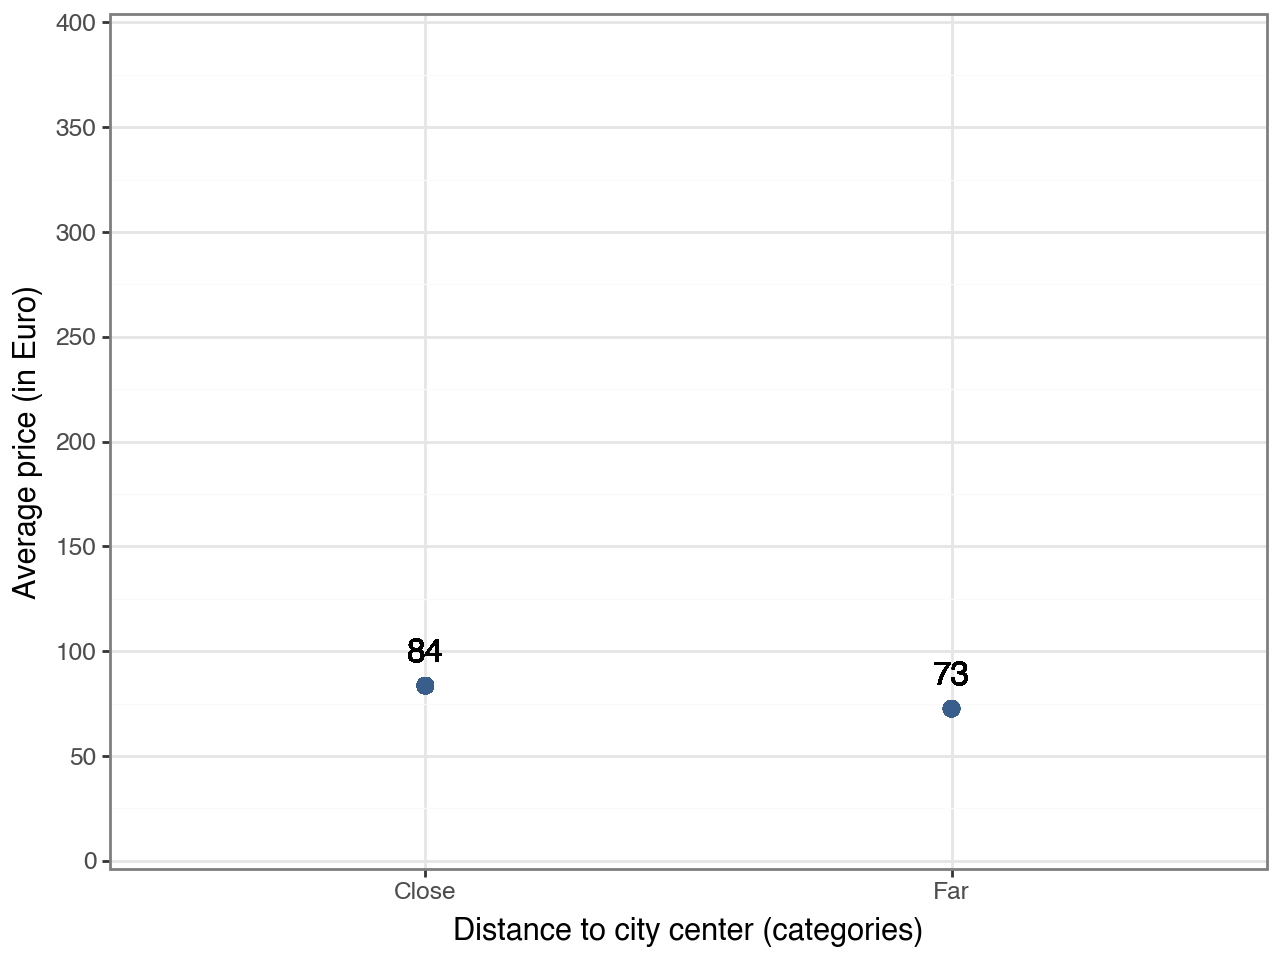

In [74]:
ggplot(Frankfurt_data) + geom_point(
    aes(x="dist2", y="Eprice_cat2"), size=2.5, color=color[0], fill=color[0], alpha=0.4
) + geom_text(
    aes(x="dist2", y="[x+15 for x in Eprice_cat2]", label=np.round(Frankfurt_data.Eprice_cat2).apply(int)),
    color="black",
    size=12,
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 400], breaks=seq(0, 400, 50)
) + expand_limits(
    y=0.01
) + scale_x_discrete() + labs(
    x="Distance to city center (categories)", y="Average price (in Euro)"
) + theme_bw()

In [76]:
Frankfurt_data["dist10"] = Frankfurt_data.distance_km.apply(
    lambda x: 0.5 + 1 * int(x >= 1) + 1 * int(x >= 2) + 1 * int(x >= 3) + 1 * int(x >= 4) + 1 * (x >= 5) + 1 * (x >= 6) + 1 * (x >= 7) + 1 * (x >= 8) + 1 * (x >= 9) + 1 * (x >= 10)
)

In [78]:
dist10 = Frankfurt_data.groupby("dist10").aggregate(Eprice_cat10=("Price_euro", np.mean))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_82080/2860654940.py:1: FutureWarning: The provided callable <function mean at 0x105ca3600> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


In [80]:
Frankfurt_data = Frankfurt_data.merge(dist10, left_on="dist10", right_on=dist10.index)

In [82]:
Frankfurt_data[["dist10", "distance_km", "Price_euro"]].groupby("dist10").aggregate("describe")

distance_km                                                      \
             count      mean       std   min     25%   50%    75%  max   
dist10                                                                   
0.5           28.0  0.587500  0.222621  0.15  0.4375  0.60  0.800  0.9   
1.5           92.0  1.334783  0.246039  1.00  1.1000  1.30  1.500  1.9   
2.5           49.0  2.367347  0.295372  2.00  2.1000  2.30  2.600  2.9   
3.5           12.0  3.466667  0.277434  3.00  3.3750  3.45  3.700  3.9   
4.5           11.0  4.381818  0.292637  4.00  4.1000  4.50  4.600  4.8   
5.5           12.0  5.475000  0.301888  5.00  5.2750  5.45  5.675  5.9   
6.5            9.0  6.433333  0.254951  6.00  6.3000  6.40  6.500  6.9   
7.5            4.0  7.525000  0.287228  7.10  7.4750  7.65  7.700  7.7   
8.5           11.0  8.700000  0.279285  8.00  8.6500  8.80  8.900  8.9   
9.5            7.0  9.171429  0.170434  9.00  9.1000  9.10  9.200  9.5   

       Price_euro                                                           
            count        mean        std   min    25%   50%     75%    max  
dist10                                                                      
0.5          28.0  111.428571  64.558574  45.0  61.50  95.5  137.00  262.0  
1.5          92.0   77.630435  37.554566  33.0  49.00  67.0   96.25  228.0  
2.5          49.0   79.959184  31.656989  13.0  64.00  75.0   91.00  212.0  
3.5          12.0   78.916667  32.628650  48.0  64.75  72.0   83.50  173.0  
4.5          11.0   56.909091  17.455398  40.0  46.00  50.0   65.50   96.0  
5.5          12.0   73.500000  20.712315  41.0  56.75  75.5   84.50  119.0  
6.5           9.0   66.111111  27.264649  42.0  45.00  56.0   77.00  124.0  
7.5           4.0   74.250000  22.425804  52.0  58.00  72.0   88.25  101.0  
8.5          11.0   83.000000  24.041631  27.0  71.00  94.0   98.50  104.0  
9.5           7.0   86.857143  24.552180  46.0  74.50  98.0  102.50  110.0

## **Figure 6**. b) Plot mean values by every 1 km

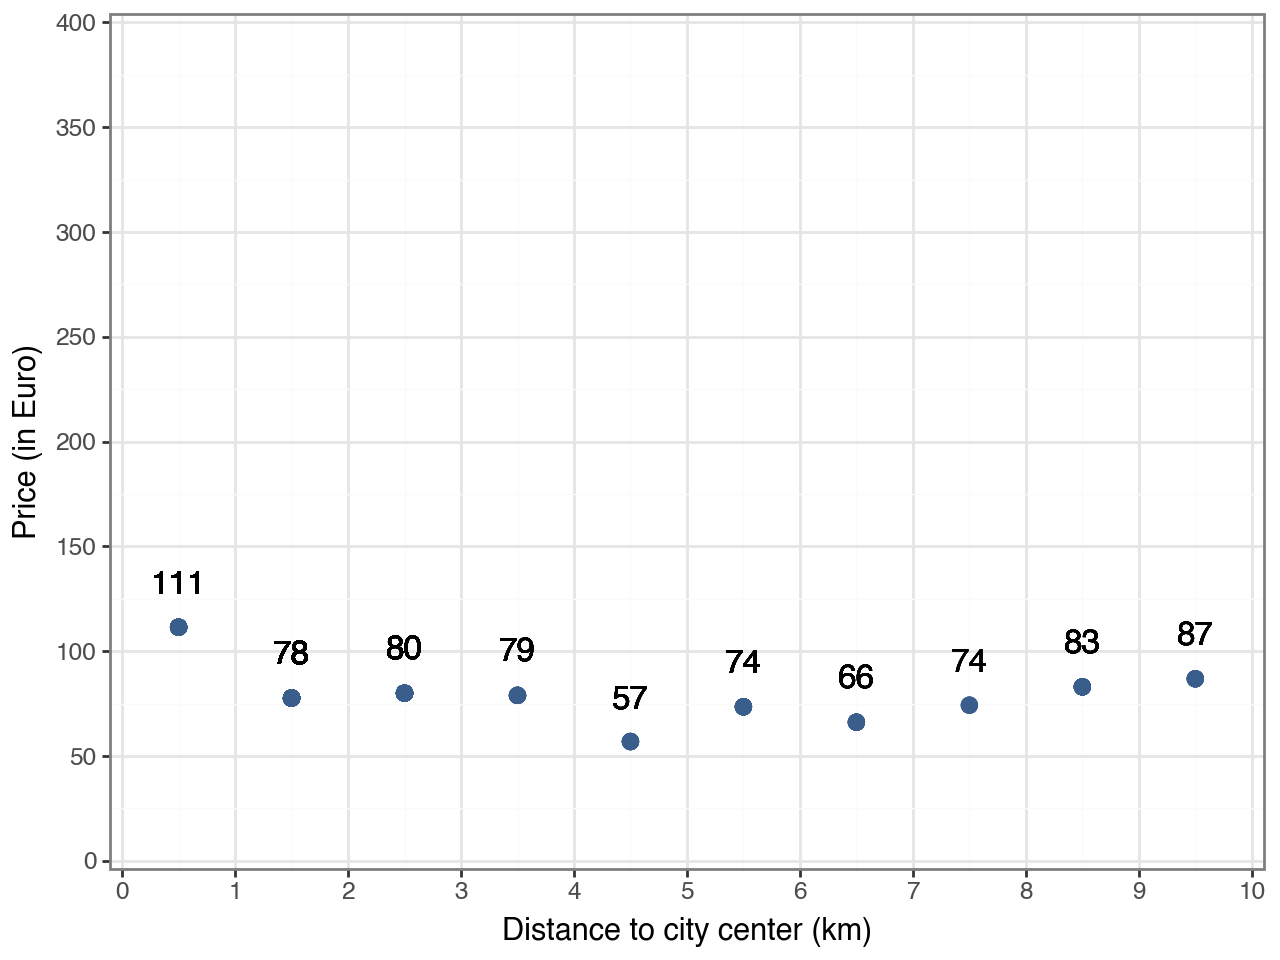

In [84]:
ggplot(data=Frankfurt_data) + geom_point(
    aes(x="dist10", y="Eprice_cat10"),
    size=2.5,
    color=color[0],
    fill=color[0],
    alpha=0.4,
) + geom_text(
    aes(
        x="dist10",
        y="[x+20 for x in Eprice_cat10]",
        label=np.round(Frankfurt_data.Eprice_cat10).apply(int),
    ),
    color="black",
    size=12,
) + expand_limits(
    x=0.01, y=0.01
) + coord_cartesian(
    xlim=[0, 10], ylim=[0, 400]
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 400], breaks=seq(0, 401, 50)
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 10], breaks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + theme_bw()

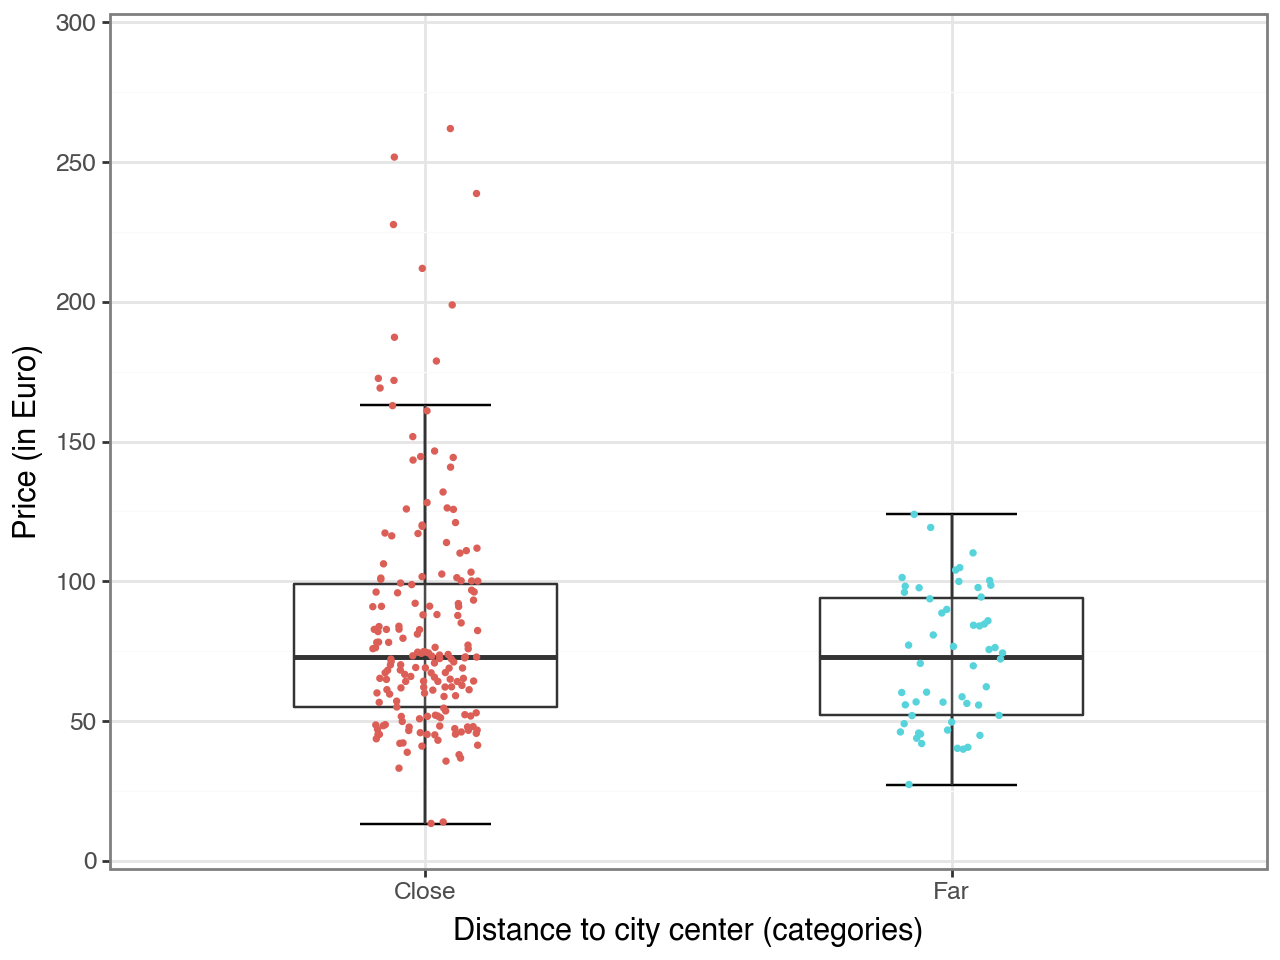

In [78]:
ggplot(Frankfurt_data, aes(x="dist2", y="Price_euro")) + stat_boxplot(
    aes(group="dist2"),
    geom="errorbar",
    width=0.25,
    size=0.5
) + geom_boxplot(
    aes(group="dist2"),
    size=0.5,
    width=0.5,
    alpha=0.3,
    outlier_shape="",
) + geom_jitter(
    aes(color="dist2"), position=position_jitter(0.1), size=0.5, show_legend=False
) + labs(
    x="Distance to city center (categories)", y="Price (in Euro)"
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 300], breaks=seq(0, 301, 50)
) + expand_limits(
    y=0.01
) + theme_bw()

## **Figure 7.** Price and distance to the city center: non-parametric regression and scatterplot

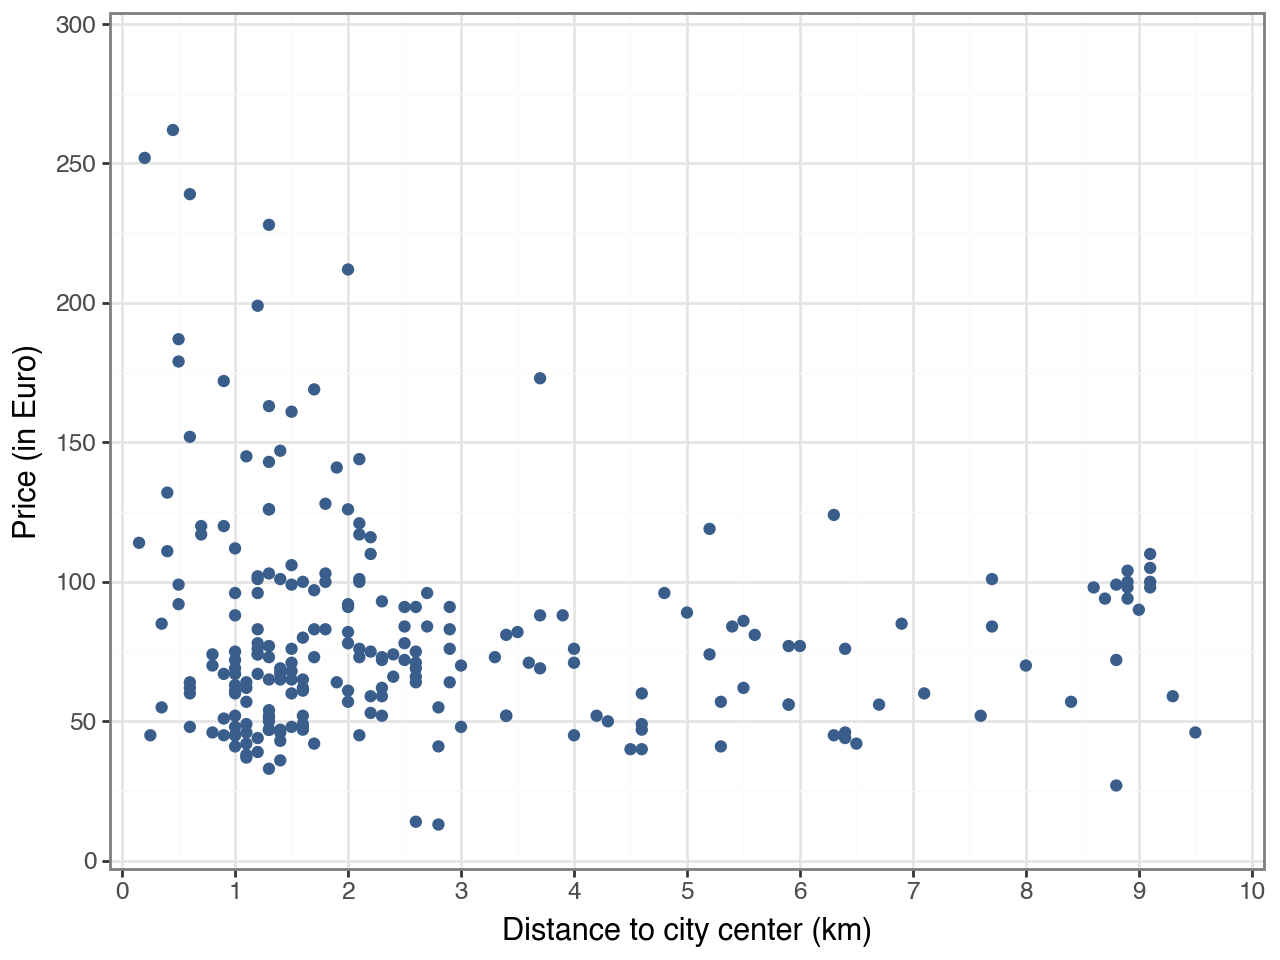

In [86]:
p1 = (
    ggplot(Frankfurt_data, aes(x="distance_km", y="Price_euro"))
    + geom_point(color=color[0])
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 10], breaks=seq(0, 10, 1))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 301], breaks=seq(0, 301, 50))
    + labs(x="Distance to city center (km)", y="Price (in Euro)")
    + theme_bw()
)
p1

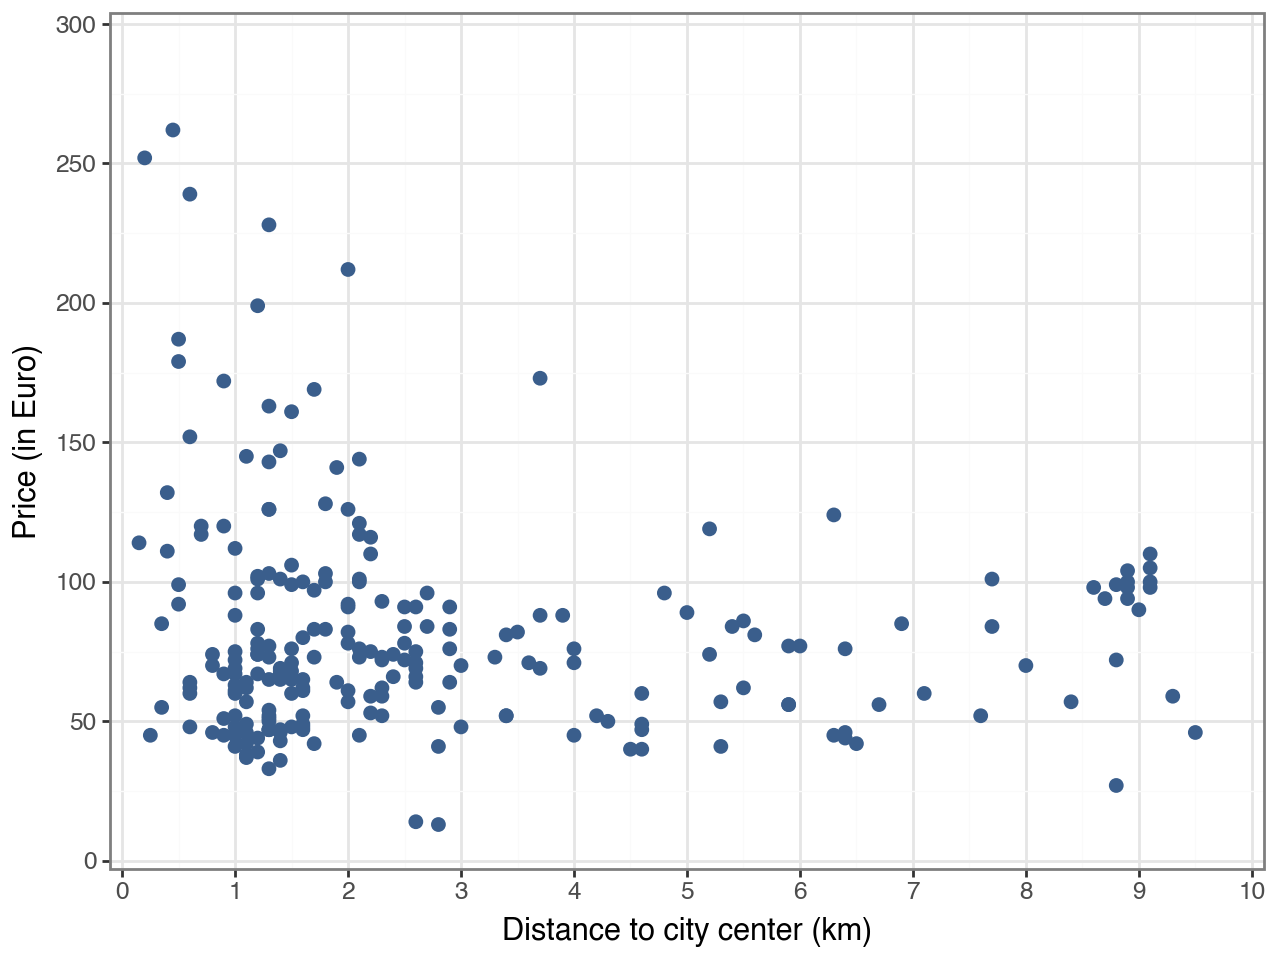

In [88]:
# large sized graphs
ggplot(Frankfurt_data) + geom_point(
    aes(x="distance_km", y="Price_euro"),
    color=color[0],
    size=2,
    alpha=0.5,
    show_legend=False,
    na_rm=True,
) + expand_limits(x=0.01, y=0.01) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 10], breaks=seq(0, 10, 1)
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 301], breaks=seq(0, 301, 50)
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + theme_bw()

## *Scatterplot with step function (we use 1 km bits for simpplicity using 10 bits)*

In [90]:
Frankfurt_data["dist10_s"] = Frankfurt_data.distance_km.apply(
    lambda x: 1 * int(x >= 1)
    + 1 * int(x >= 2)
    + 1 * int(x >= 3)
    + 1 * int(x >= 4)
    + 1 * int(x >= 5)
    + 1 * int(x >= 6)
    + 1 * int(x >= 7)
    + 1 * int(x >= 8)
    + 1 * int(x >= 9)
    + 1 * int(x >=10)
)
Frankfurt_data["xend"] = Frankfurt_data["dist10_s"] + 1
Frankfurt_data["yend"] = Frankfurt_data["Eprice_cat10"]

### *Non-parametric regression, 10 bins*

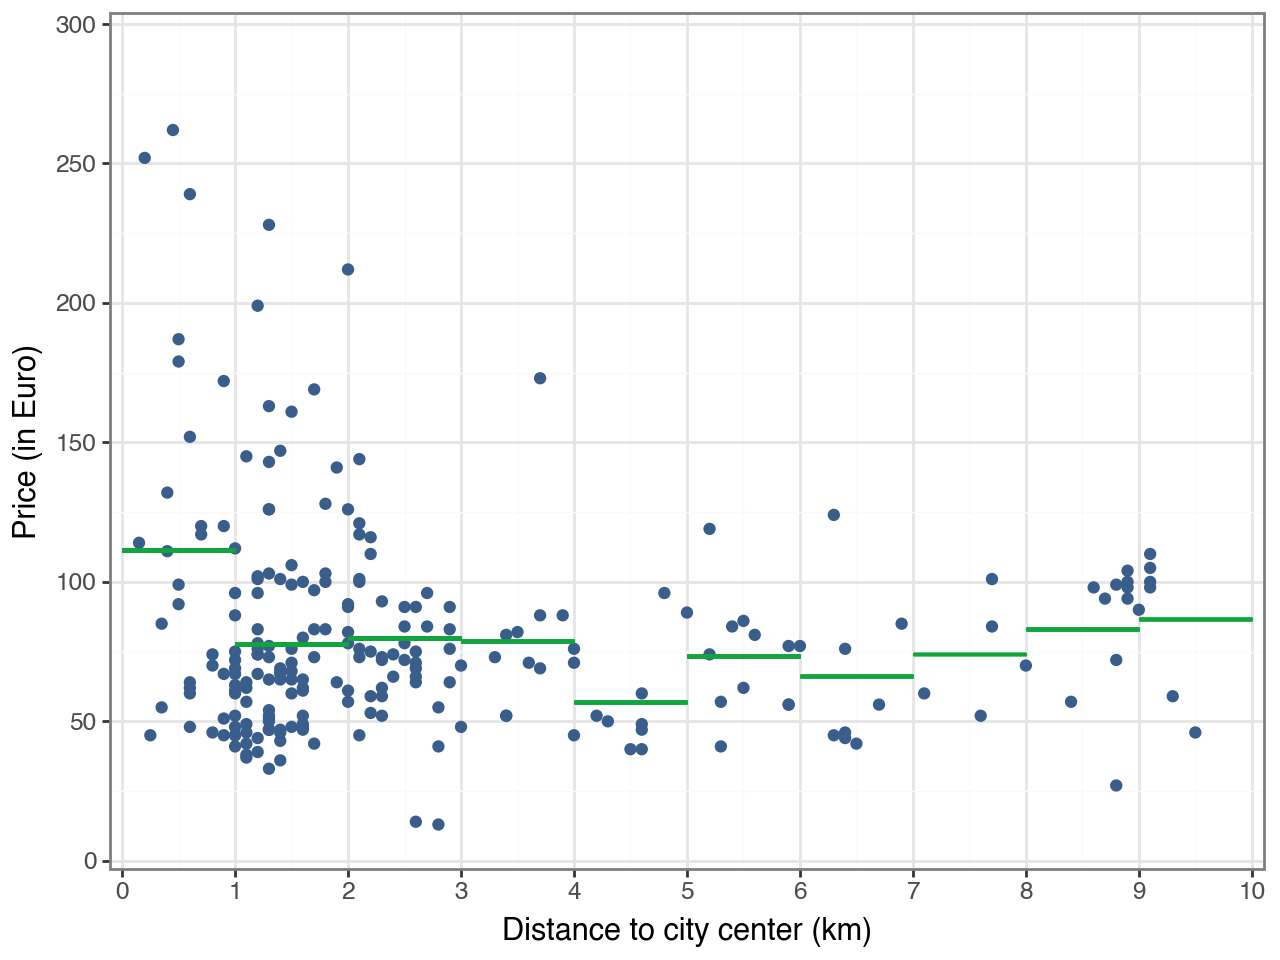

In [92]:
F07 = p1 + geom_segment(
    Frankfurt_data,
    aes("dist10_s", "yend", xend="xend", yend="yend"),
    color=color[1],
    size=0.7,
    na_rm=True,
)

F07

In [85]:
# !pip install scikit-misc

## **Figure 8.** Lowess Non-parametric regression

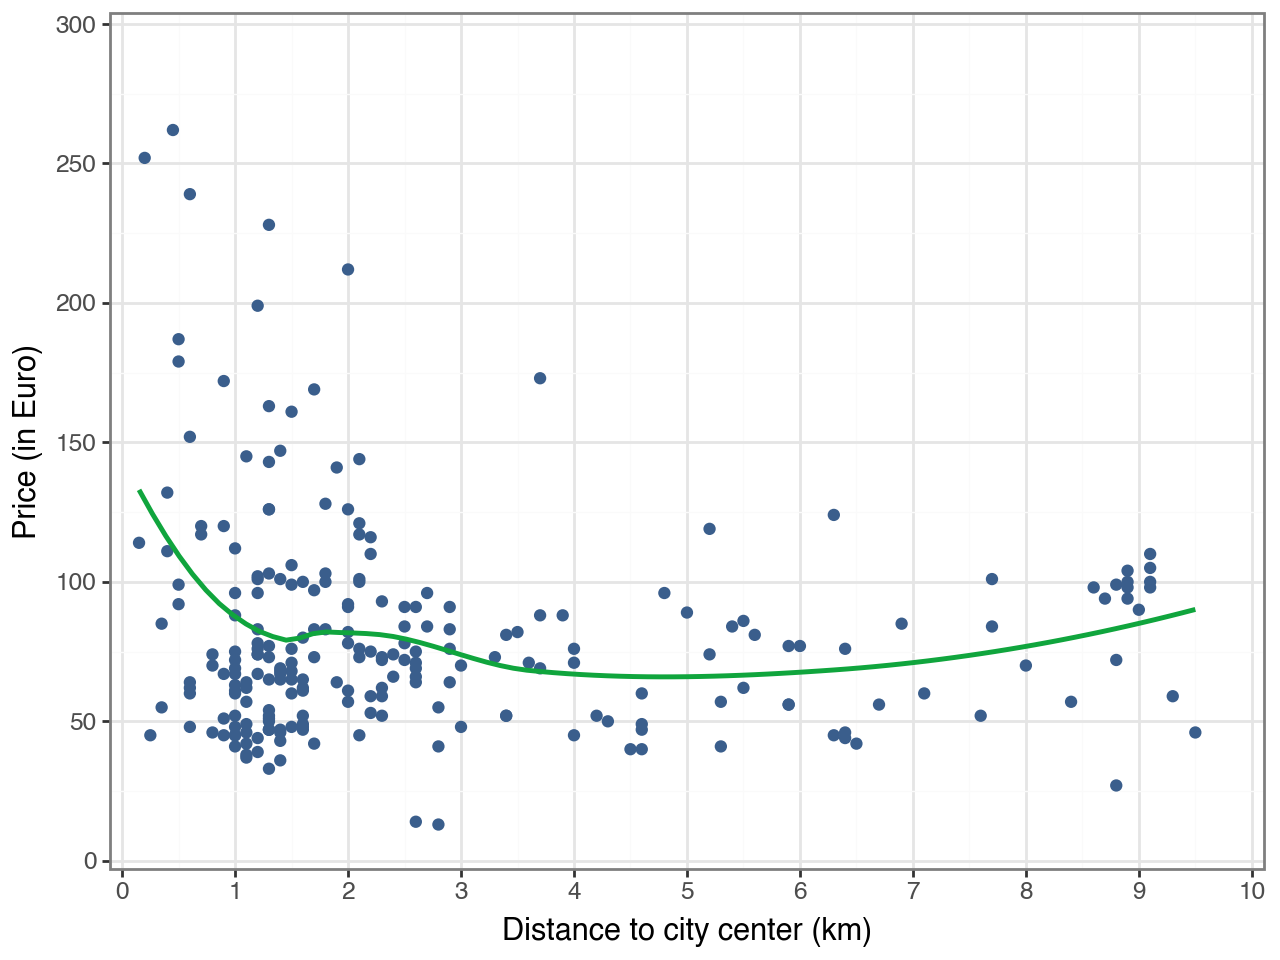

In [94]:
F08 = p1 + geom_smooth(method="loess", color=color[1],se=False)
F08

In [96]:
### LINEAR REGRESSIONS
regression = smf.ols(formula="Price_euro~distance_km", data=Frankfurt_data).fit()
regression.summary()
#regression.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_euro   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.800
Date:                Thu, 13 Feb 2025   Prob (F-statistic):             0.0956
Time:                        01:40:53   Log-Likelihood:                -1194.4
No. Observations:                 235   AIC:                             2393.
Df Residuals:                     233   BIC:                             2400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      86.0500      3.930     21.898      0.000      78.308      93.792
distance_km    -1.7821      1.065     -1.673      0.096      -3.880       0.316
==============================================================================
Omnibus:                       94.794   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.046
Skew:                           1.753   Prob(JB):                     3.14e-65
Kurtosis:                       7.247   Cond. No.                         5.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Figure 9.** Scatterplot + Regression Line

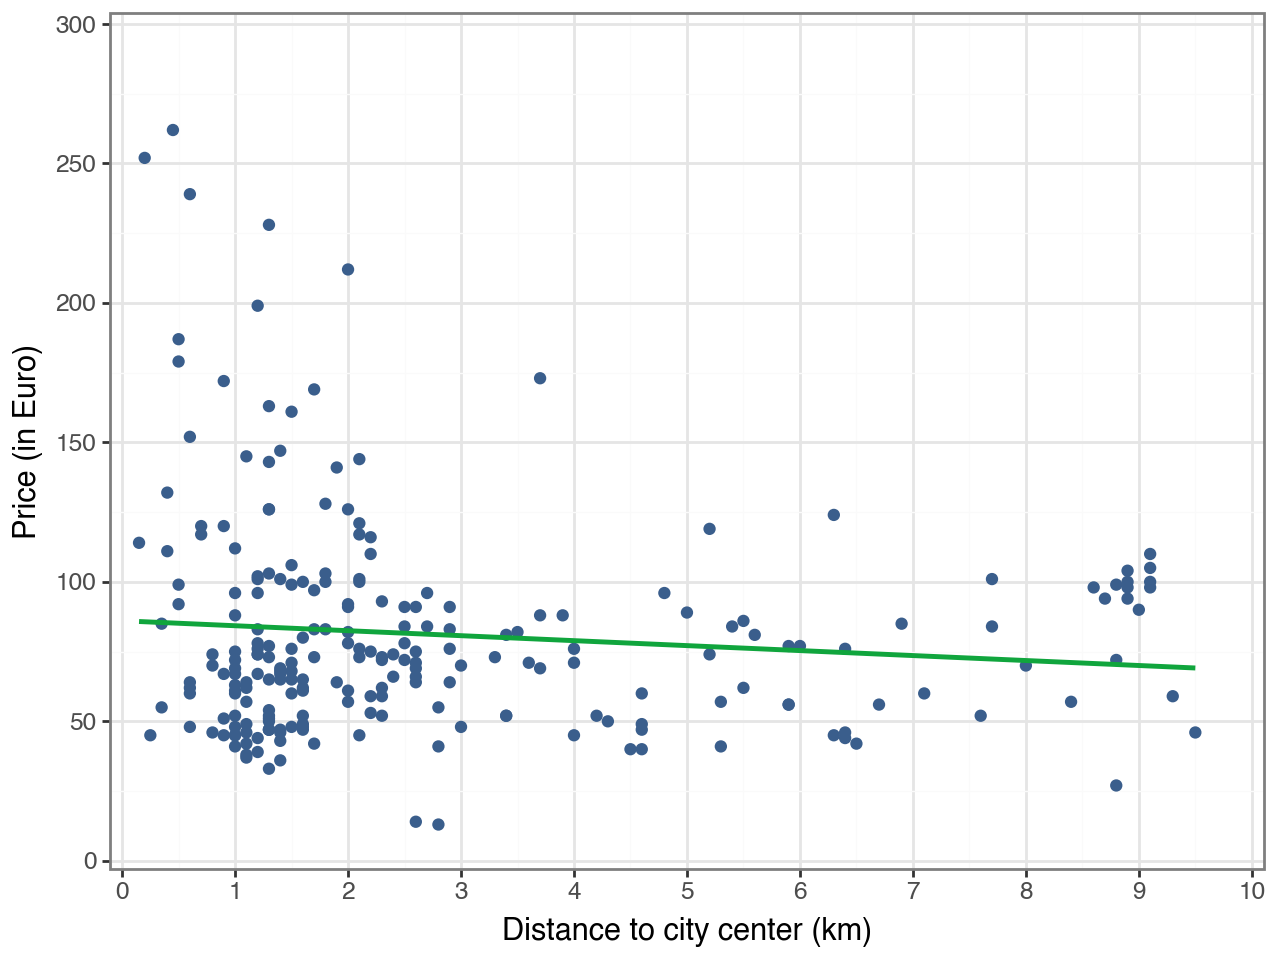

In [98]:
F09 = p1 + geom_smooth(method="lm", color=color[1],se=False)
F09

### * *The Linear regression goes through the averages. Scatterplot + Regression Line + Lines for averages*

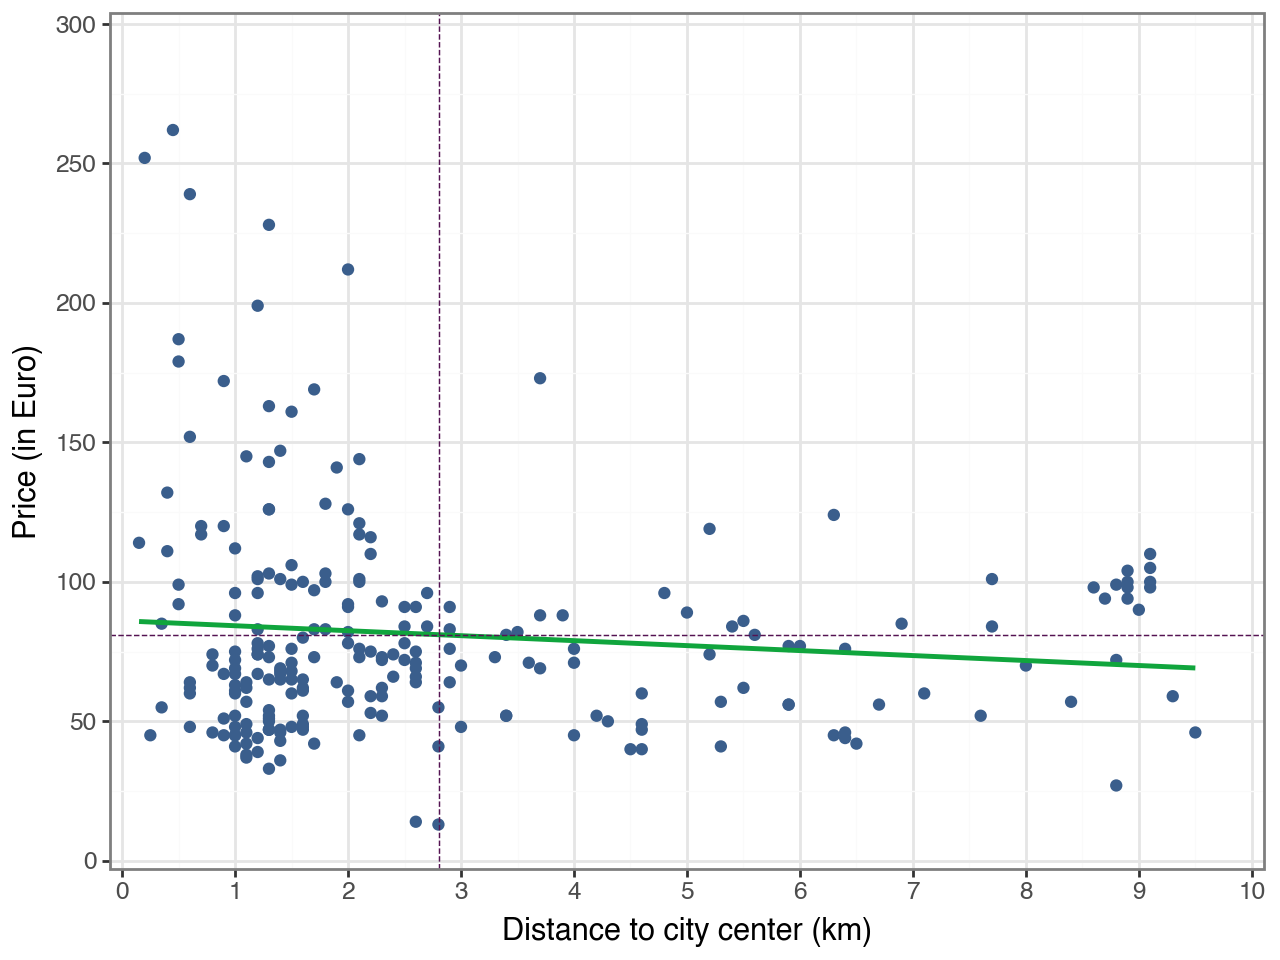

In [100]:
F09a = (
    p1
    + geom_smooth(method="lm", color=color[1],se=False)
    + geom_vline(
        xintercept=Frankfurt_data["distance_km"].mean(),
        color=color[2],
        linetype="dashed",
        size=0.3,
    )
    + geom_hline(
        yintercept=Frankfurt_data["Price_euro"].mean(), color=color[2], linetype="dashed", size=0.3
    )
)
F09a

### Predicted values and residuals of Linear regression

In [102]:
regression = smf.ols(formula="Price_euro~distance_km", data=Frankfurt_data).fit()

In [104]:
Frankfurt_data

hotel_id       city   check_in  check_out  breakfast_0_1  \
0         473  Frankfurt  2/17/2025  2/18/2025              0   
1         474  Frankfurt  2/17/2025  2/18/2025              0   
2         475  Frankfurt  2/17/2025  2/18/2025              0   
3         476  Frankfurt  2/17/2025  2/18/2025              1   
4         477  Frankfurt  2/17/2025  2/18/2025              0   
..        ...        ...        ...        ...            ...   
230       737  Frankfurt  2/17/2025  2/18/2025              0   
231       740  Frankfurt  2/17/2025  2/18/2025              0   
232       742  Frankfurt  2/17/2025  2/18/2025              0   
233       747  Frankfurt  2/17/2025  2/18/2025              0   
234       751  Frankfurt  2/17/2025  2/18/2025              0   

    accommadation_type  distance_km  Sustain_cert  reviews_0_10  nr_reviews  \
0                Hotel          1.4             0           8.0        6808   
1                Hotel          2.1             0           8.6        1970   
2                Hotel          2.6             0           8.1        3836   
3                Hotel          9.1             1           8.3       17287   
4                Hotel          1.3             1           8.0        4436   
..                 ...          ...           ...           ...         ...   
230              Hotel          1.1             0           3.7         159   
231              Hotel          8.6             0           7.7          17   
232              Hotel          9.5             0           6.1         553   
233              Hotel          5.3             0           5.6         118   
234              Hotel          8.4             0           8.5         437   

     Price_euro  review_category  dist2  Eprice_cat2  dist10  Eprice_cat10  \
0            65                8  Close    83.574586     1.5     77.630435   
1            73                9  Close    83.574586     2.5     79.959184   
2            71                8  Close    83.574586     2.5     79.959184   
3           100                8    Far    72.611111     9.5     86.857143   
4            65                8  Close    83.574586     1.5     77.630435   
..          ...              ...    ...          ...     ...           ...   
230          42                4  Close    83.574586     1.5     77.630435   
231          98                8    Far    72.611111     8.5     83.000000   
232          46                6    Far    72.611111     9.5     86.857143   
233          41                6    Far    72.611111     5.5     73.500000   
234          57                9    Far    72.611111     8.5     83.000000   

     dist10_s  xend       yend  
0           1     2  77.630435  
1           2     3  79.959184  
2           2     3  79.959184  
3           9    10  86.857143  
4           1     2  77.630435  
..        ...   ...        ...  
230         1     2  77.630435  
231         8     9  83.000000  
232         9    10  86.857143  
233         5     6  73.500000  
234         8     9  83.000000  

[235 rows x 19 columns]

In [106]:
Frankfurt_data["predprice"] = regression.predict()
Frankfurt_data["e"] = regression.resid

In [108]:
type(regression)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [122]:
xa= 6.3
ya= 75
ym= 125 
# FIXME
# ym  --should be replaced with predicted value directly

/opt/anaconda3/lib/python3.12/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/opt/anaconda3/lib/python3.12/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.



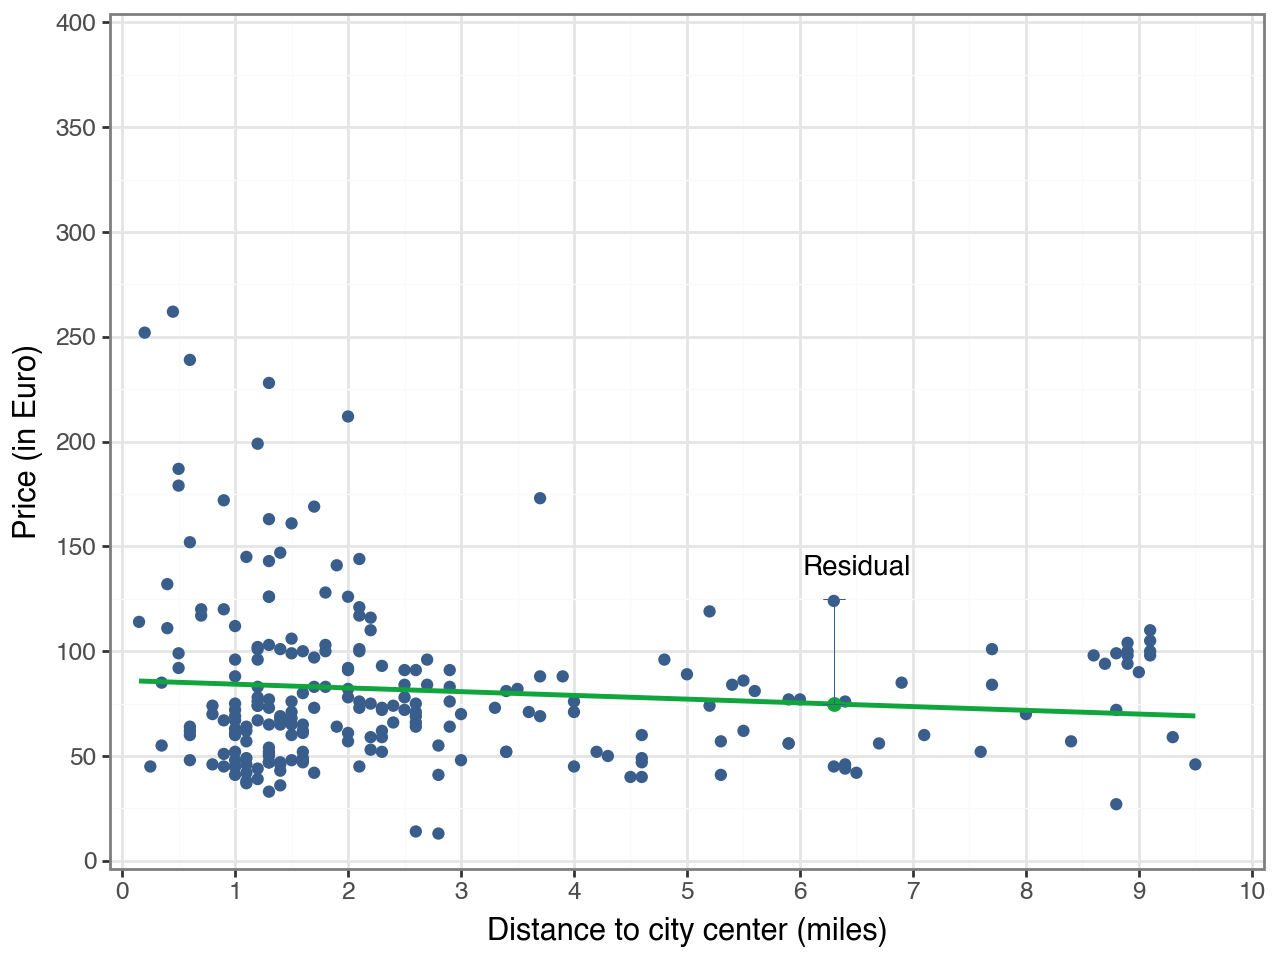

In [126]:
F09b = (
    p1
    + geom_smooth(method="lm", color=color[1], se=False)
    + annotate(
        "text",
        x=6.5,
        y=140,
        label="Residual",
        size=10,
    )
    + annotate("pointrange", x=xa, y=ya, ymin=ya, ymax=ya, color=color[1], size=0.5)
    + geom_errorbar(
        Frankfurt_data.loc[Frankfurt_data["distance_km"] == xa],
        aes(x="distance_km", ymin=ym, ymax=ya),
        width=0.2,
        size=0.2,
        color=color[0],
    )
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 10), breaks=seq(0, 10, by=1))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 400), breaks=seq(0, 400, by=50)
    )
    + labs(x="Distance to city center (miles)", y="Price (in Euro)")
    + theme_bw()
)

F09b

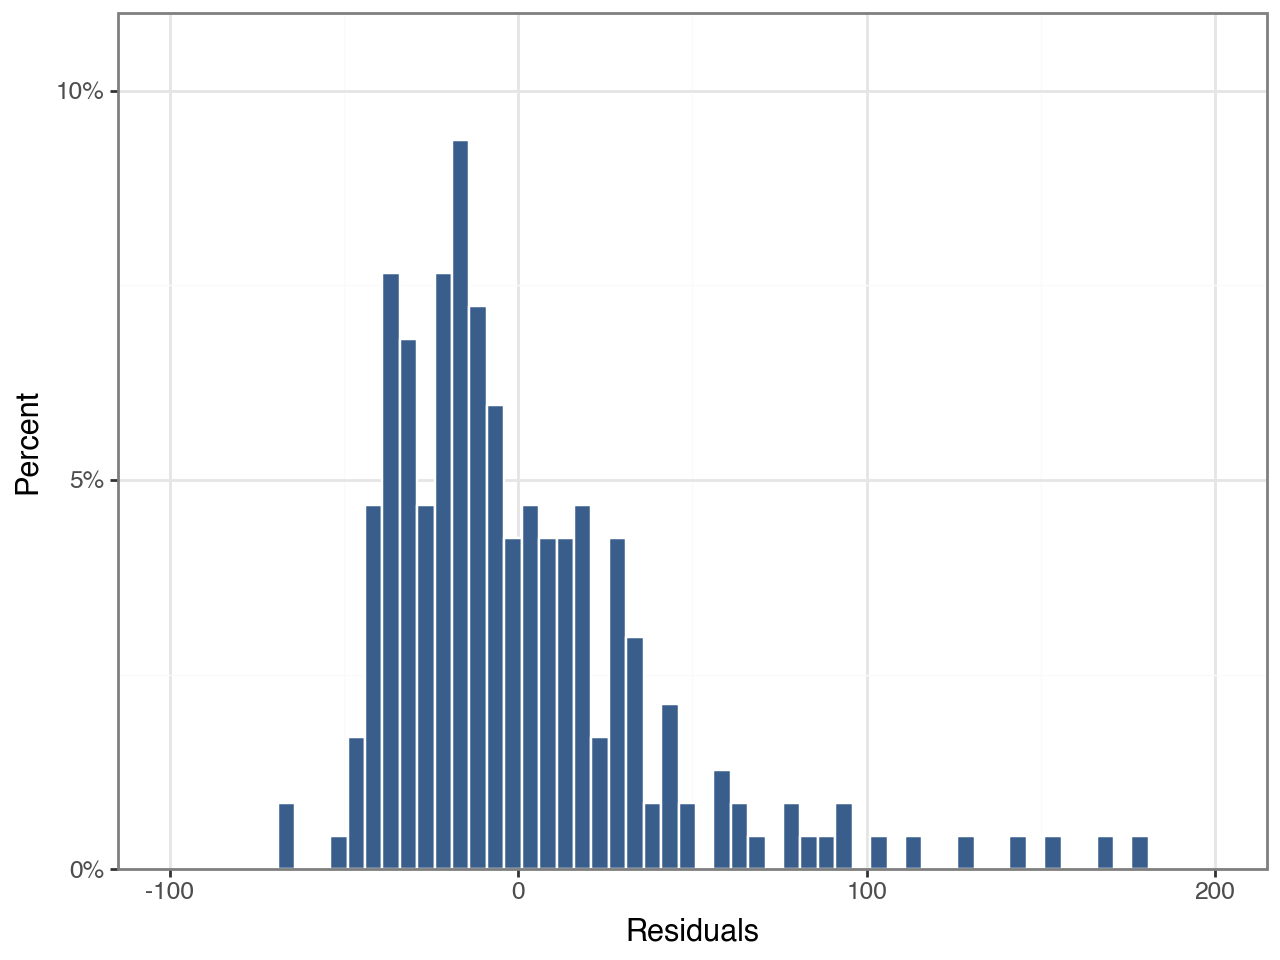

In [424]:
# histogram of residuals
F09c = ggplot(Frankfurt_data, aes(x="e")) + geom_histogram(
    aes(y="(..count..)/sum(..count..)"),
    binwidth=5,
    boundary=1,
    fill=color[0],
    color="white",
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + labs(x="Residuals", y="Percent") + scale_x_continuous(
    limits=(-100, 200), breaks=seq(-100, 200, by=100)
) + scale_y_continuous(
    expand=(0, 0), limits=(0, 0.11), breaks=seq(0, 0.11, by=0.05), labels=percent_format()
) + theme_bw()

F09c

In [132]:
Frankfurt_data["reg1_res"] = ["overpriced" if e >= 0 else "underpriced" for e in Frankfurt_data["e"]]

In [134]:
Frankfurt_data.loc[Frankfurt_data["e"].sort_values().tail().index, "reg1_res"] = "top5"
Frankfurt_data.loc[Frankfurt_data["e"].sort_values().head().index, "reg1_res"] = "bottom5"

In [136]:
bestdeals = Frankfurt_data.loc[Frankfurt_data["e"].sort_values().head().index]

## **Figure 10.** Underpriced hotels in Frankfurt

In [ ]:
### Figure 10
### adding annotation

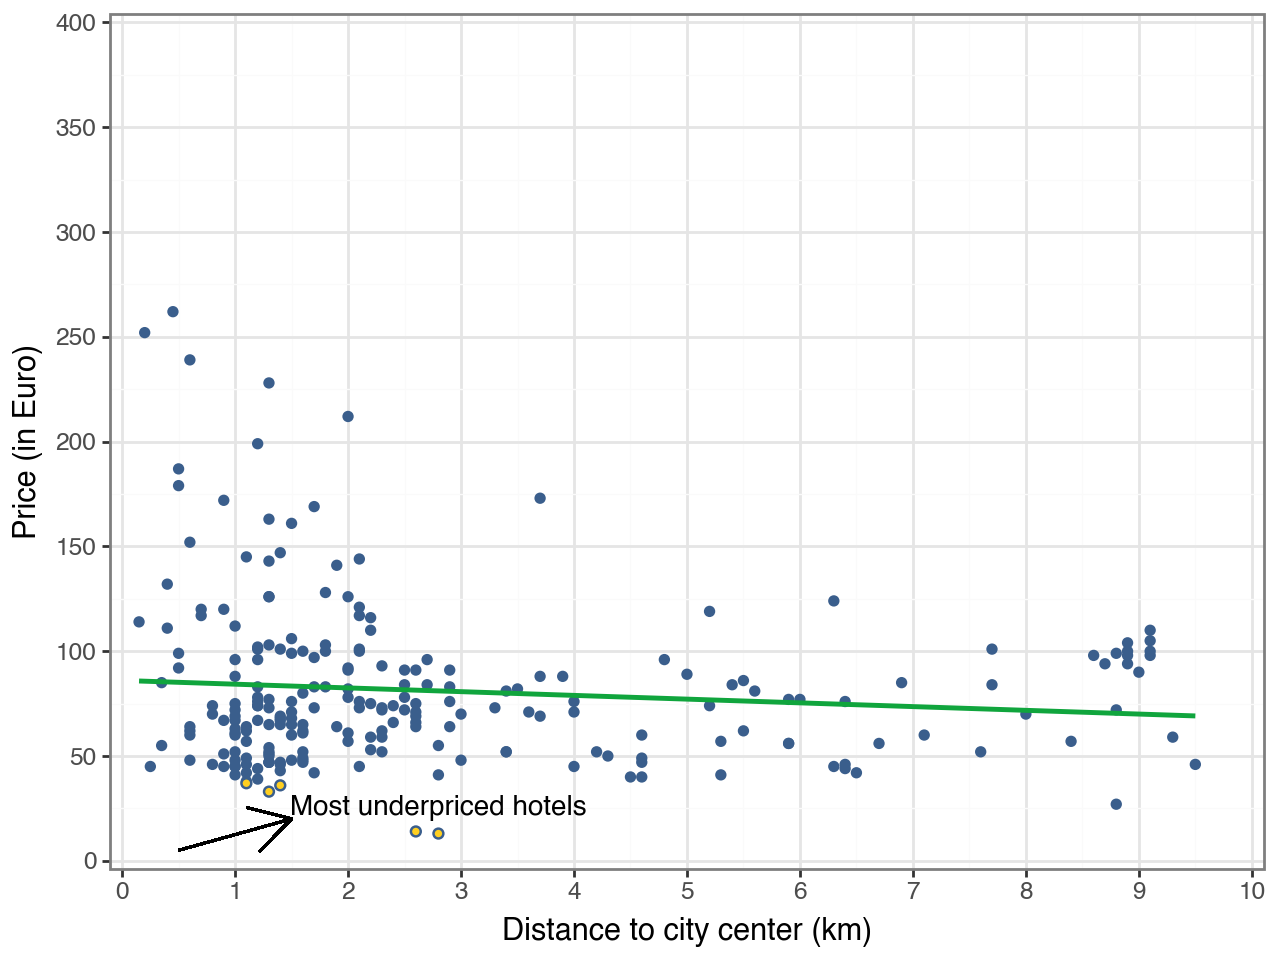

In [159]:
ggplot(Frankfurt_data, aes(x="distance_km", y="Price_euro")) + geom_point(
    Frankfurt_data.loc[Frankfurt_data["reg1_res"] == "overpriced"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_point(
    Frankfurt_data.loc[Frankfurt_data["reg1_res"] == "underpriced"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_point(
    Frankfurt_data.loc[Frankfurt_data["reg1_res"] == "bottom5"],
    aes(color="reg1_res", fill="reg1_res"),
    size=1.5,
    alpha=0.8,
    show_legend=False,
) + geom_point(
    Frankfurt_data.loc[Frankfurt_data["reg1_res"] == "top5"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_smooth(
    method="lm", size=1, color=color[1], se=False
) + coord_cartesian(
    xlim=(0, 10), ylim=(0, 400)
) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 10), breaks=seq(0, 10, by=1)
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 400), breaks=seq(0, 401, by=50)
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + scale_color_manual(
    name="", values=(color[0], color[0], color[0], color[0])
) + scale_fill_manual(
    name="", values=color[3]
) + annotate(
    "text", x=2.8, y=25, label="Most underpriced hotels", size=10
) + geom_segment(
    aes(x=0.5, y=5, xend=1.5, yend=20), arrow=arrow()
) + theme_bw()

## **Table 5.** Most underpriced hotels in Frankfurt 

In [161]:
Frankfurt_data.loc[
    Frankfurt_data["reg1_res"] == "bottom5",
    ["hotel_id", "distance_km", "Price_euro", "predprice", "e"],
].sort_values(by=["e"]).round(2).reset_index(drop=True).rename(
    {"e": "residual"}, axis=1
)

hotel_id  distance_km  Price_euro  predprice  residual
0       720          2.8          13      81.06    -68.06
1       690          2.6          14      81.42    -67.42
2       672          1.3          33      83.73    -50.73
3       547          1.4          36      83.56    -47.56
4       653          1.1          37      84.09    -47.09

## **Hamburg**

## Summary statistics on price and distance

In [165]:
# Filter the dataset for observations from Berlin
Hamburg_data = hotel_data[hotel_data['city'] == 'Hamburg']

# Price
Hamburg_data[['Price_euro']].describe(percentiles=[0.50,0.95])

Price_euro
count  263.000000
mean   108.387833
std     58.606999
min     11.000000
50%     99.000000
95%    194.700000
max    495.000000

In [167]:
# Distance
Hamburg_data[['distance_km']].describe(percentiles=[0.50,0.95])

distance_km
count   263.000000
mean      3.099430
std       2.400368
min       0.150000
50%       2.300000
95%       8.100000
max      10.000000

## **Regression 1**: Close VS Far Regression with Binary Distance

In [169]:
# hotels = hotels.assign(dist2=lambda x: x.distance>=4)
Hamburg_data["dist2"] = Hamburg_data.distance_km.apply(lambda x: int(x>=4))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_82080/3316295700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [171]:
dist2 = Hamburg_data.groupby("dist2").aggregate(Eprice_cat2=("Price_euro",np.mean))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_82080/1275453670.py:1: FutureWarning: The provided callable <function mean at 0x105ca3600> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


In [173]:
Hamburg_data=Hamburg_data.merge(dist2,left_on="dist2",right_on=dist2.index)

In [177]:
Hamburg_data.dist2=Hamburg_data.dist2.replace(0,"Close")
Hamburg_data.dist2=Hamburg_data.dist2.replace(1,"Far")

In [179]:
Hamburg_data[["dist2","distance_km","Price_euro"]].groupby("dist2").aggregate("describe")

distance_km                                                Price_euro  \
            count      mean       std   min  25%  50%  75%   max      count   
dist2                                                                         
Close       184.0  1.746467  0.851855  0.15  1.0  1.7  2.4   3.8      184.0   
Far          79.0  6.250633  1.809864  4.00  4.7  6.0  7.6  10.0       79.0   

                                                                 
             mean        std   min    25%    50%     75%    max  
dist2                                                            
Close  112.157609  65.392068  11.0  69.75  101.0  135.25  495.0  
Far     99.607595  37.326837  18.0  72.00   94.0  119.50  227.0

## **Figure 6**. a) Plot mean values by "Close" vs "Far"

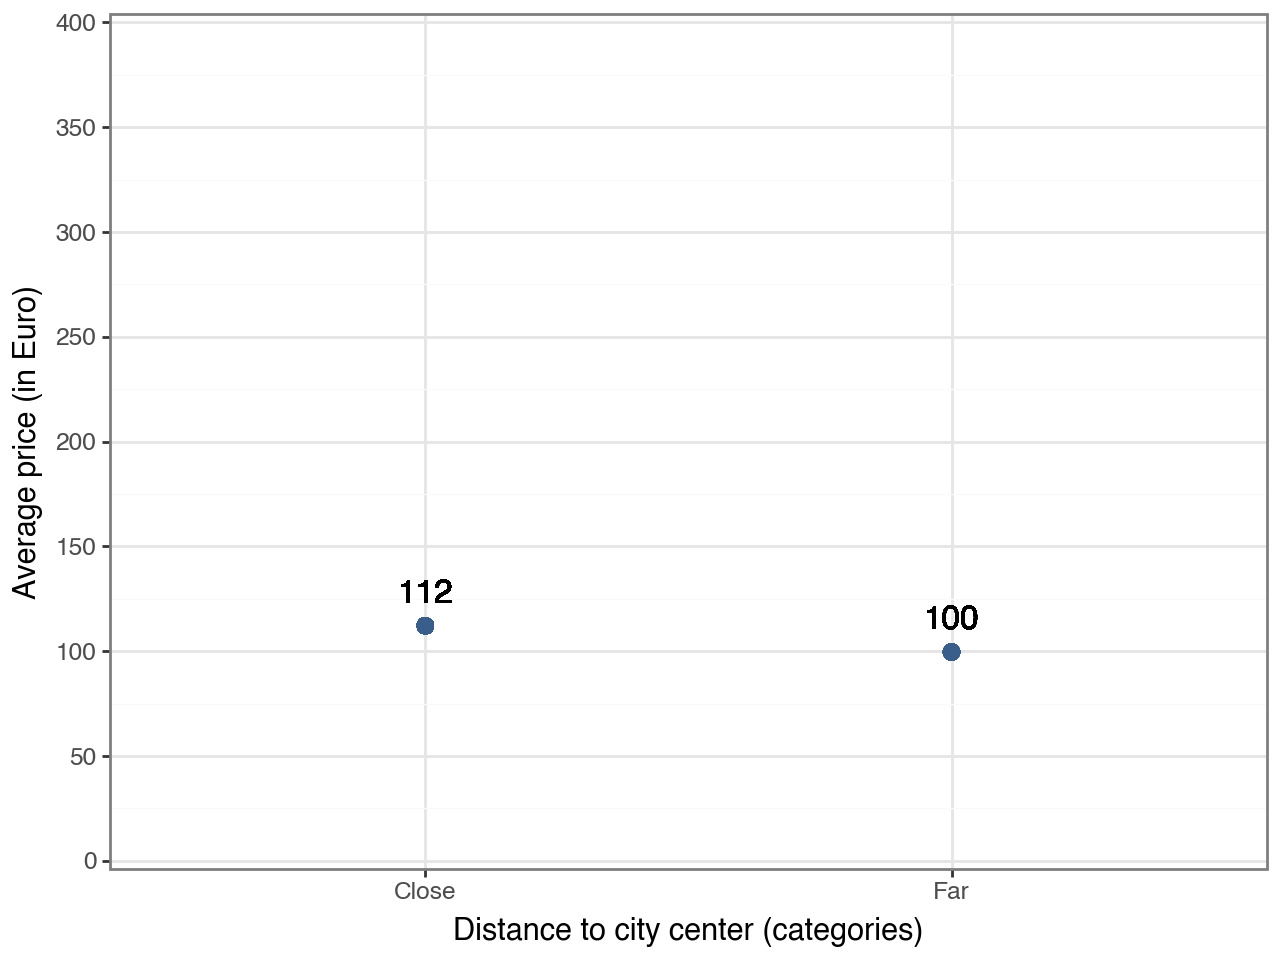

In [183]:
ggplot(Hamburg_data) + geom_point(
    aes(x="dist2", y="Eprice_cat2"), size=2.5, color=color[0], fill=color[0], alpha=0.4
) + geom_text(
    aes(x="dist2", y="[x+15 for x in Eprice_cat2]", label=np.round(Hamburg_data.Eprice_cat2).apply(int)),
    color="black",
    size=12,
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 400], breaks=seq(0, 400, 50)
) + expand_limits(
    y=0.01
) + scale_x_discrete() + labs(
    x="Distance to city center (categories)", y="Average price (in Euro)"
) + theme_bw()

In [185]:
Hamburg_data["dist10"] = Hamburg_data.distance_km.apply(
    lambda x: 0.5 + 1 * int(x >= 1) + 1 * int(x >= 2) + 1 * int(x >= 3) + 1 * int(x >= 4) + 1 * (x >= 5) + 1 * (x >= 6) + 1 * (x >= 7) + 1 * (x >= 8) + 1 * (x >= 9) + 1 * (x >= 10)
)

In [187]:
dist10 = Hamburg_data.groupby("dist10").aggregate(Eprice_cat10=("Price_euro", np.mean))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_82080/880290954.py:1: FutureWarning: The provided callable <function mean at 0x105ca3600> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


In [189]:
Hamburg_data = Hamburg_data.merge(dist10, left_on="dist10", right_on=dist10.index)

In [191]:
Hamburg_data[["dist10", "distance_km", "Price_euro"]].groupby("dist10").aggregate("describe")

distance_km                                                           \
             count       mean       std    min     25%    50%     75%   max   
dist10                                                                        
0.5           40.0   0.716250  0.188920   0.15   0.700   0.80   0.800   0.9   
1.5           67.0   1.368657  0.315368   1.00   1.100   1.30   1.650   1.9   
2.5           59.0   2.410169  0.269543   2.00   2.200   2.40   2.600   2.9   
3.5           18.0   3.266667  0.244949   3.00   3.025   3.25   3.400   3.8   
4.5           28.0   4.442857  0.314382   4.00   4.200   4.45   4.700   4.9   
5.5           11.0   5.445455  0.291079   5.00   5.200   5.50   5.700   5.9   
6.5           14.0   6.400000  0.316228   6.00   6.125   6.35   6.675   6.9   
7.5           10.0   7.470000  0.271006   7.00   7.425   7.55   7.600   7.8   
8.5            7.0   8.314286  0.313202   8.00   8.100   8.20   8.450   8.9   
9.5            8.0   9.625000  0.305894   9.20   9.300   9.75   9.900   9.9   
10.5           1.0  10.000000       NaN  10.00  10.000  10.00  10.000  10.0   

       Price_euro                                                            
            count        mean        std   min    25%    50%     75%    max  
dist10                                                                       
0.5          40.0  121.550000  82.426953  33.0  63.75   97.5  155.25  410.0  
1.5          67.0  125.014925  72.829500  11.0  82.00  109.0  151.50  495.0  
2.5          59.0   93.474576  45.233248  40.0  62.50   81.0  112.50  294.0  
3.5          18.0  104.666667  27.228877  59.0  84.25  107.5  118.50  170.0  
4.5          28.0   99.857143  44.554348  18.0  72.50   88.5  111.25  227.0  
5.5          11.0  100.545455  27.115913  60.0  82.00   94.0  124.50  140.0  
6.5          14.0   96.071429  26.583582  57.0  66.50  100.0  120.25  132.0  
7.5          10.0   93.500000  25.613581  59.0  72.00   92.5  108.75  133.0  
8.5           7.0  102.142857  40.490446  49.0  68.50  111.0  132.00  154.0  
9.5           8.0  113.000000  53.130567  60.0  82.50   95.0  121.50  224.0  
10.5          1.0   68.000000        NaN  68.0  68.00   68.0   68.00   68.0

## **Figure 6**. b) Plot mean values by every 1 km

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


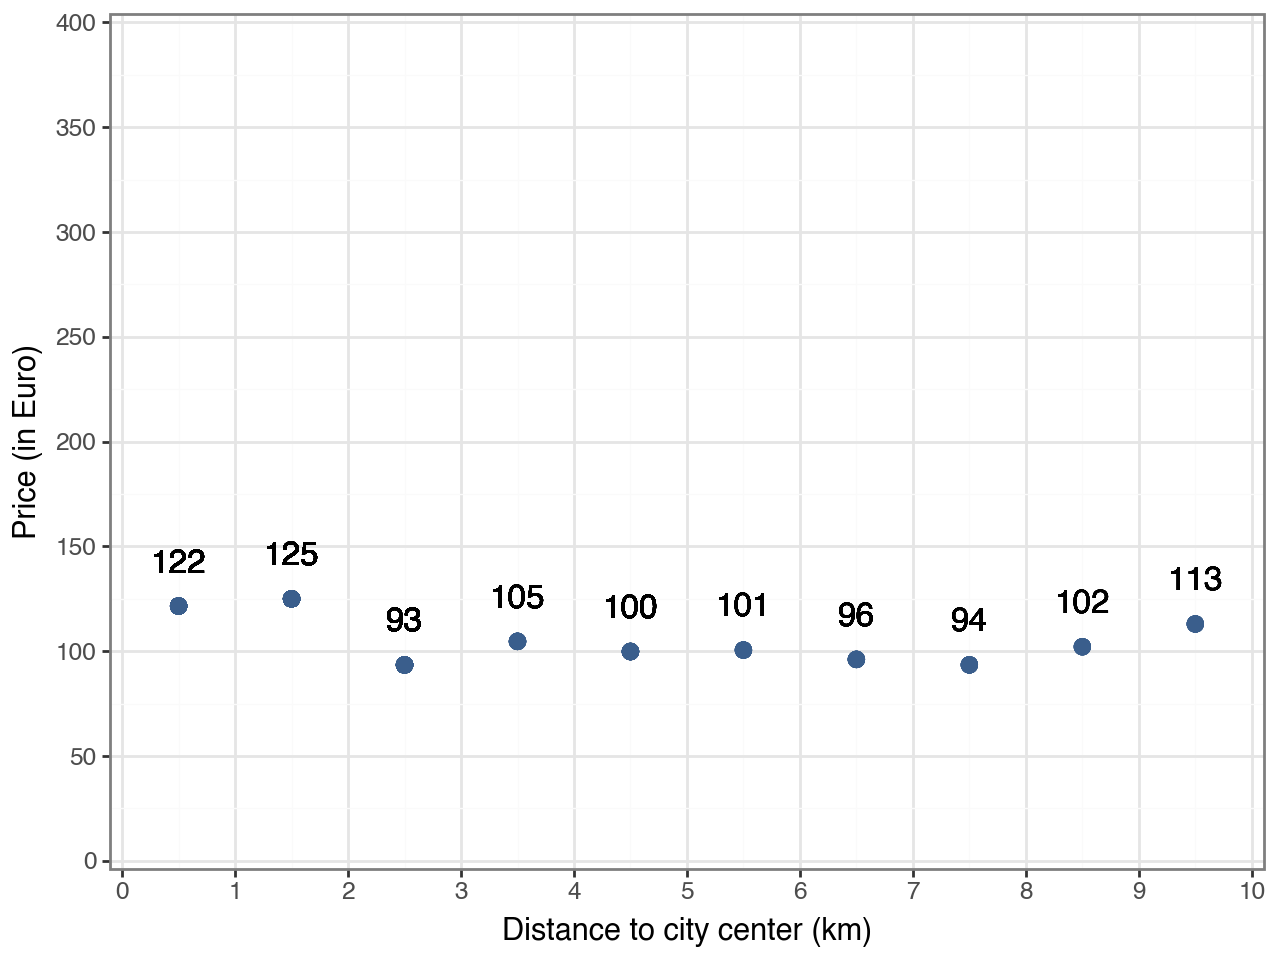

In [195]:
ggplot(data=Hamburg_data) + geom_point(
    aes(x="dist10", y="Eprice_cat10"),
    size=2.5,
    color=color[0],
    fill=color[0],
    alpha=0.4,
) + geom_text(
    aes(
        x="dist10",
        y="[x+20 for x in Eprice_cat10]",
        label=np.round(Hamburg_data.Eprice_cat10).apply(int),
    ),
    color="black",
    size=12,
) + expand_limits(
    x=0.01, y=0.01
) + coord_cartesian(
    xlim=[0, 10], ylim=[0, 400]
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 400], breaks=seq(0, 401, 50)
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 10], breaks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + theme_bw()

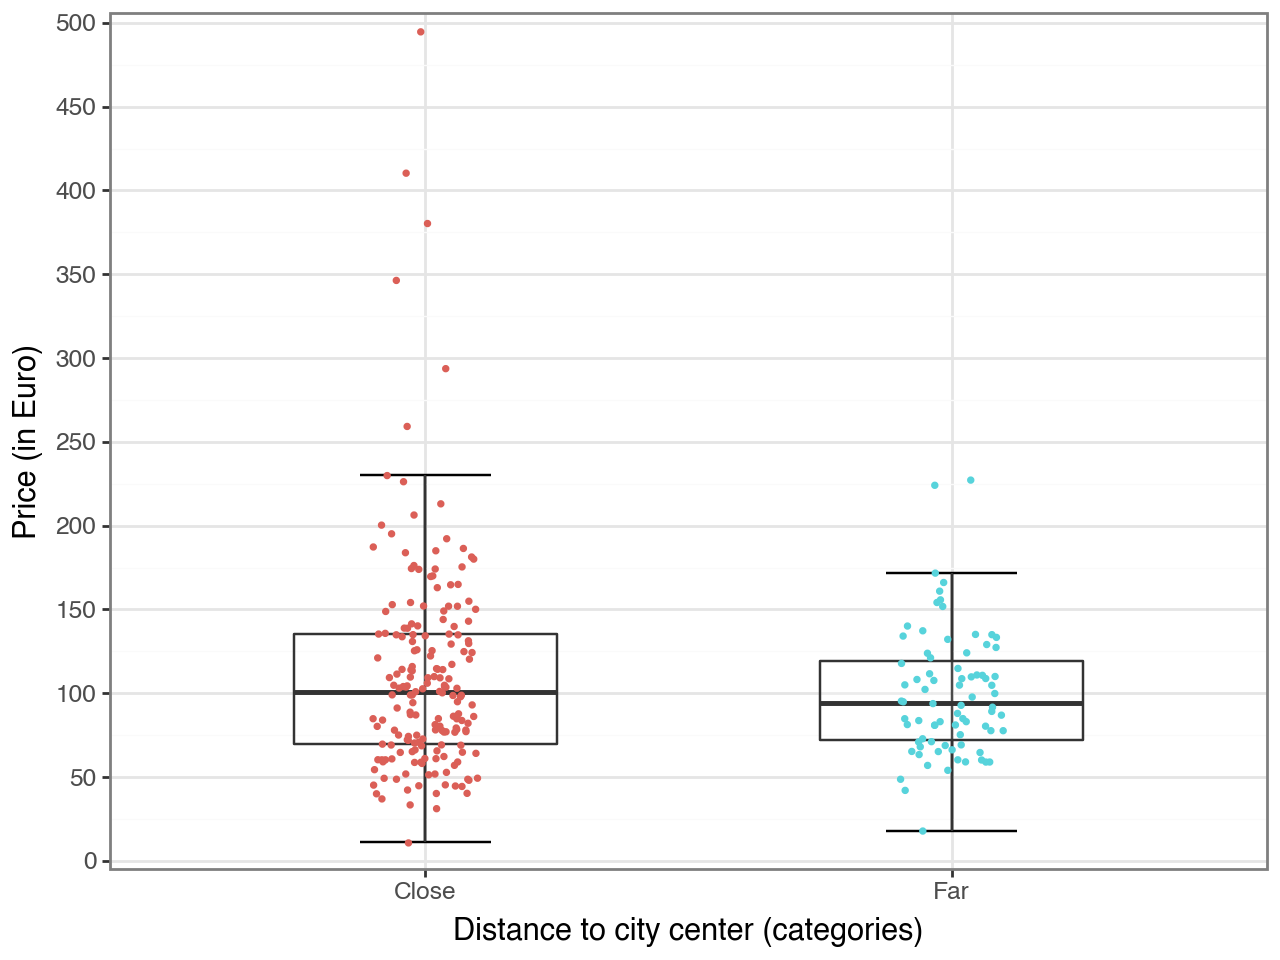

In [199]:
ggplot(Hamburg_data, aes(x="dist2", y="Price_euro")) + stat_boxplot(
    aes(group="dist2"),
    geom="errorbar",
    width=0.25,
    size=0.5
) + geom_boxplot(
    aes(group="dist2"),
    size=0.5,
    width=0.5,
    alpha=0.3,
    outlier_shape="",
) + geom_jitter(
    aes(color="dist2"), position=position_jitter(0.1), size=0.5, show_legend=False
) + labs(
    x="Distance to city center (categories)", y="Price (in Euro)"
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 501], breaks=seq(0, 501, 50)
) + expand_limits(
    y=0.01
) + theme_bw()

## **Figure 7.** Price and distance to the city center: non-parametric regression and scatterplot

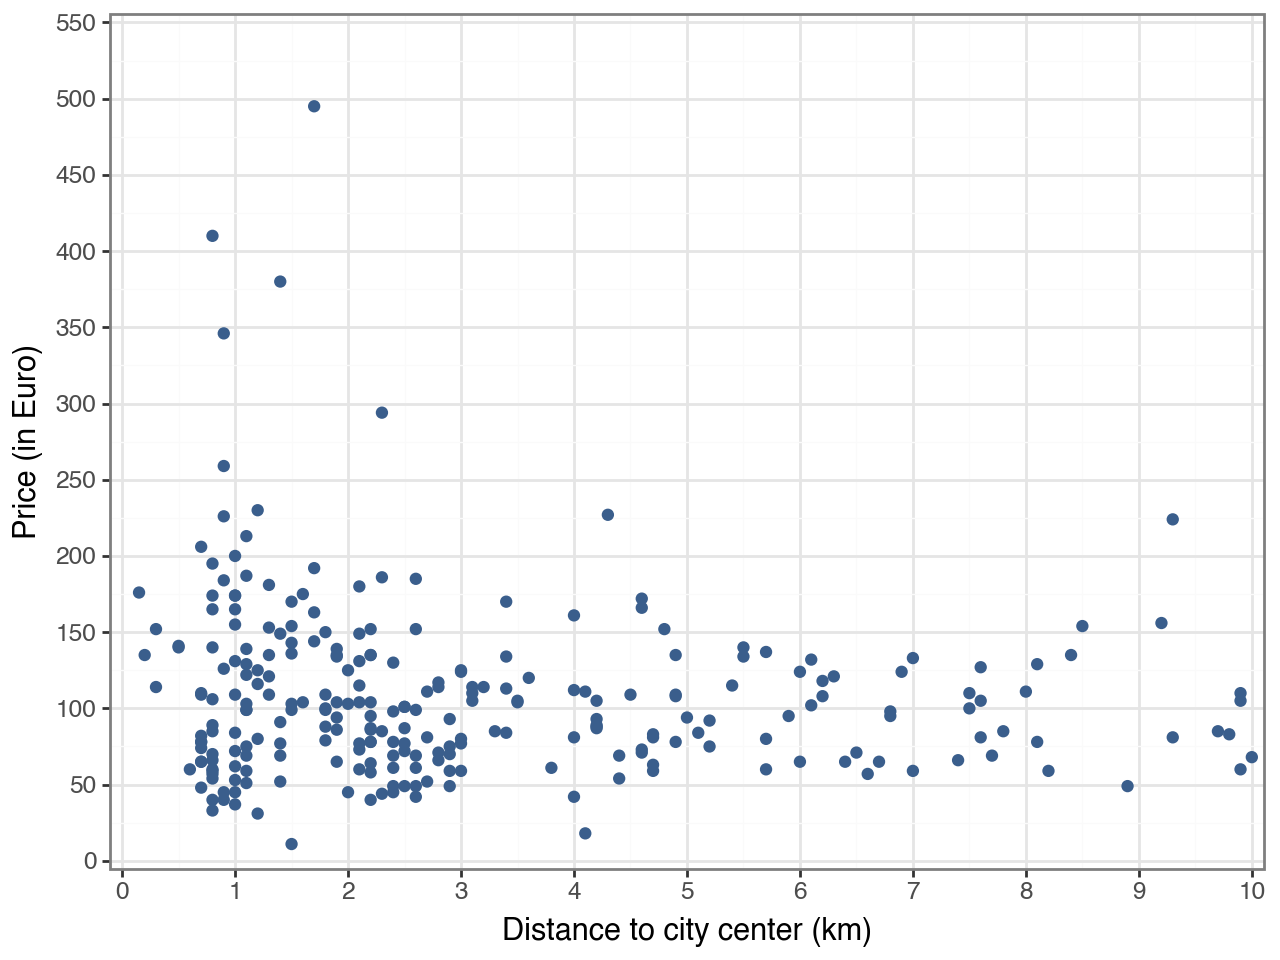

In [205]:
p1 = (
    ggplot(Hamburg_data, aes(x="distance_km", y="Price_euro"))
    + geom_point(color=color[0])
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 10], breaks=seq(0, 10, 1))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 550], breaks=seq(0, 550, 50))
    + labs(x="Distance to city center (km)", y="Price (in Euro)")
    + theme_bw()
)
p1

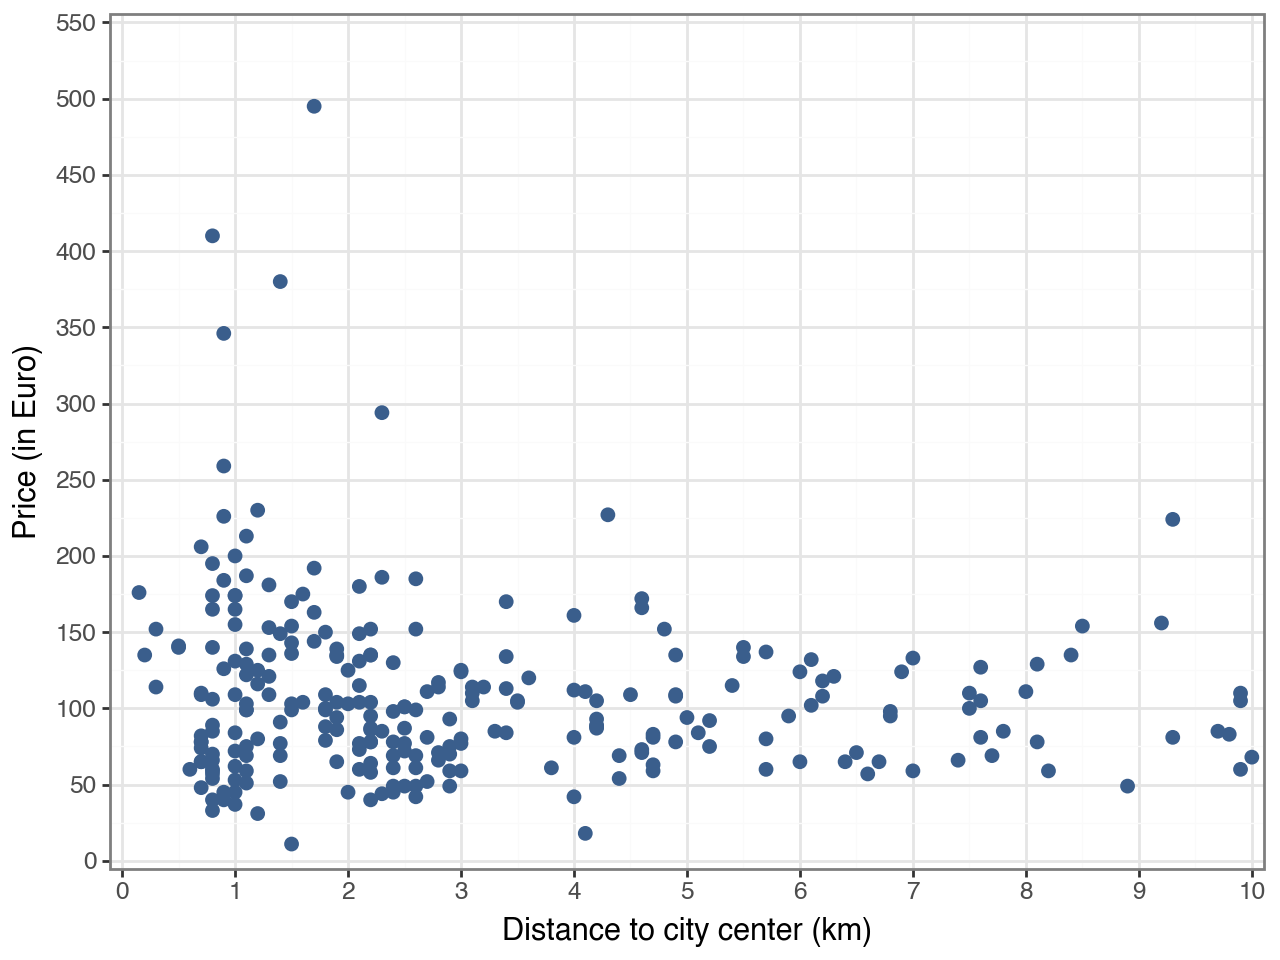

In [207]:
# large sized graphs
ggplot(Hamburg_data) + geom_point(
    aes(x="distance_km", y="Price_euro"),
    color=color[0],
    size=2,
    alpha=0.5,
    show_legend=False,
    na_rm=True,
) + expand_limits(x=0.01, y=0.01) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 10], breaks=seq(0, 10, 1)
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 550], breaks=seq(0, 550, 50)
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + theme_bw()

## *Scatterplot with step function (we use 1 km bits for simpplicity using 10 bits)*

In [209]:
Hamburg_data["dist10_s"] = Hamburg_data.distance_km.apply(
    lambda x: 1 * int(x >= 1)
    + 1 * int(x >= 2)
    + 1 * int(x >= 3)
    + 1 * int(x >= 4)
    + 1 * int(x >= 5)
    + 1 * int(x >= 6)
    + 1 * int(x >= 7)
    + 1 * int(x >= 8)
    + 1 * int(x >= 9)
    + 1 * int(x >=10)
)
Hamburg_data["xend"] = Hamburg_data["dist10_s"] + 1
Hamburg_data["yend"] = Hamburg_data["Eprice_cat10"]

### *Non-parametric regression, 10 bins*

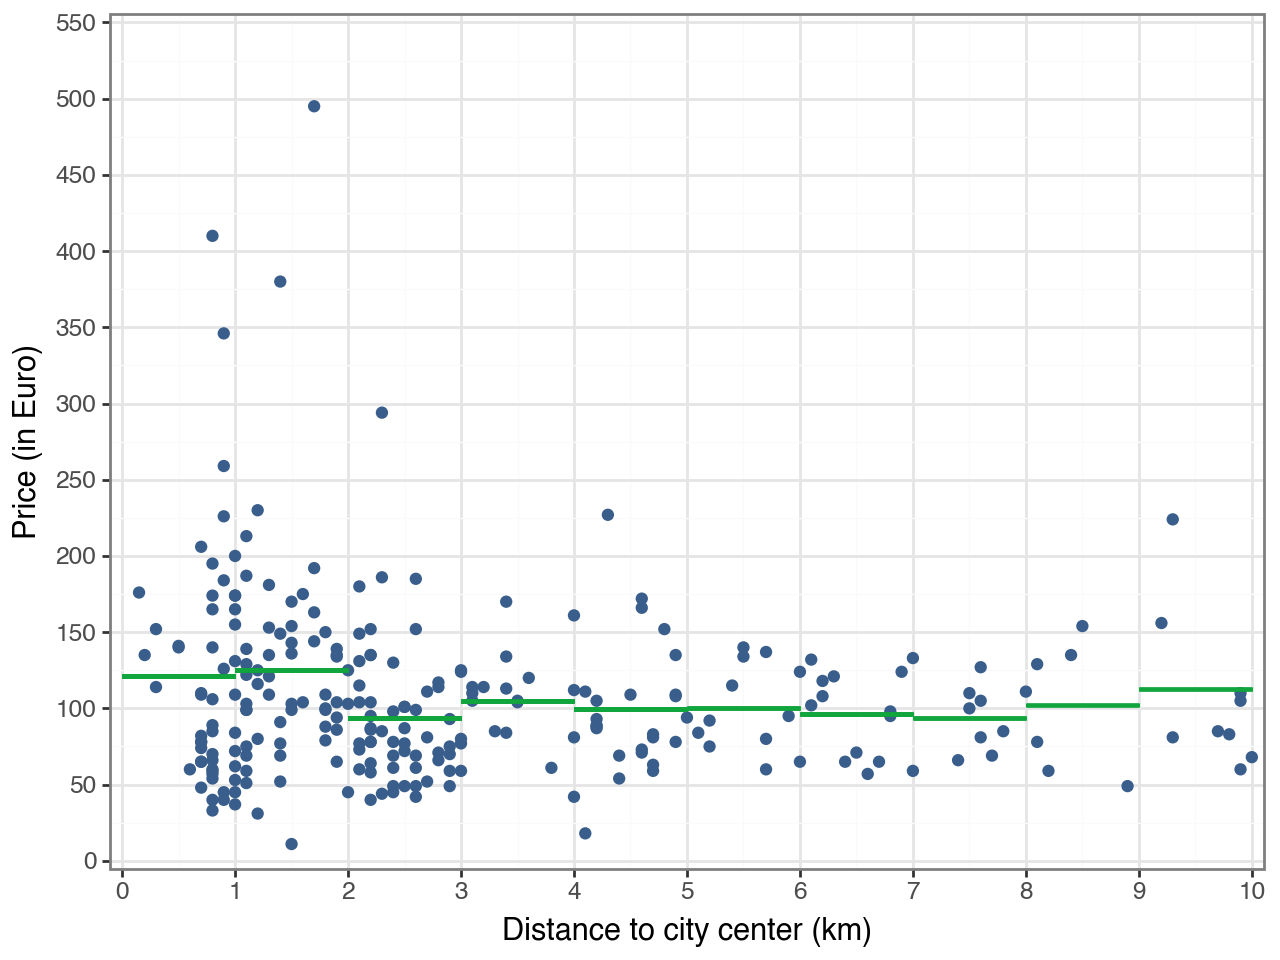

In [211]:
F07 = p1 + geom_segment(
    Hamburg_data,
    aes("dist10_s", "yend", xend="xend", yend="yend"),
    color=color[1],
    size=0.7,
    na_rm=True,
)

F07

In [85]:
# !pip install scikit-misc

## **Figure 8.** Lowess Non-parametric regression

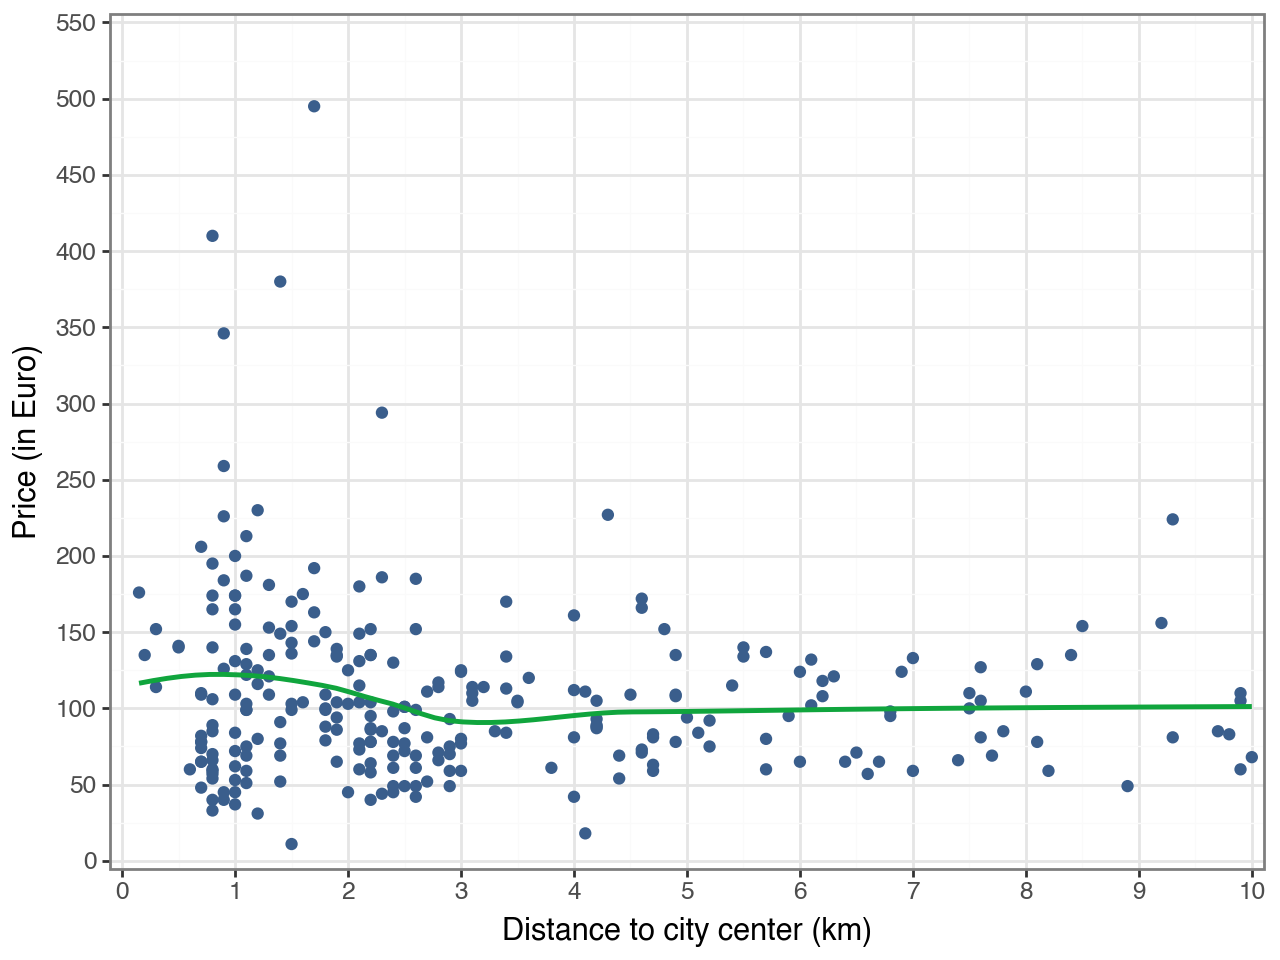

In [213]:
F08 = p1 + geom_smooth(method="loess", color=color[1],se=False)
F08

In [215]:
### LINEAR REGRESSIONS
regression = smf.ols(formula="Price_euro~distance_km", data=Hamburg_data).fit()
regression.summary()
#regression.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_euro   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.194
Date:                Thu, 13 Feb 2025   Prob (F-statistic):             0.0416
Time:                        01:54:51   Log-Likelihood:                -1441.2
No. Observations:                 263   AIC:                             2886.
Df Residuals:                     261   BIC:                             2894.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     117.9048      5.873     20.074      0.000     106.339     129.470
distance_km    -3.0705      1.499     -2.048      0.042      -6.023      -0.118
==============================================================================
Omnibus:                      165.426   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1507.871
Skew:                           2.425   Prob(JB):                         0.00
Kurtosis:                      13.680   Cond. No.                         6.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Figure 9.** Scatterplot + Regression Line

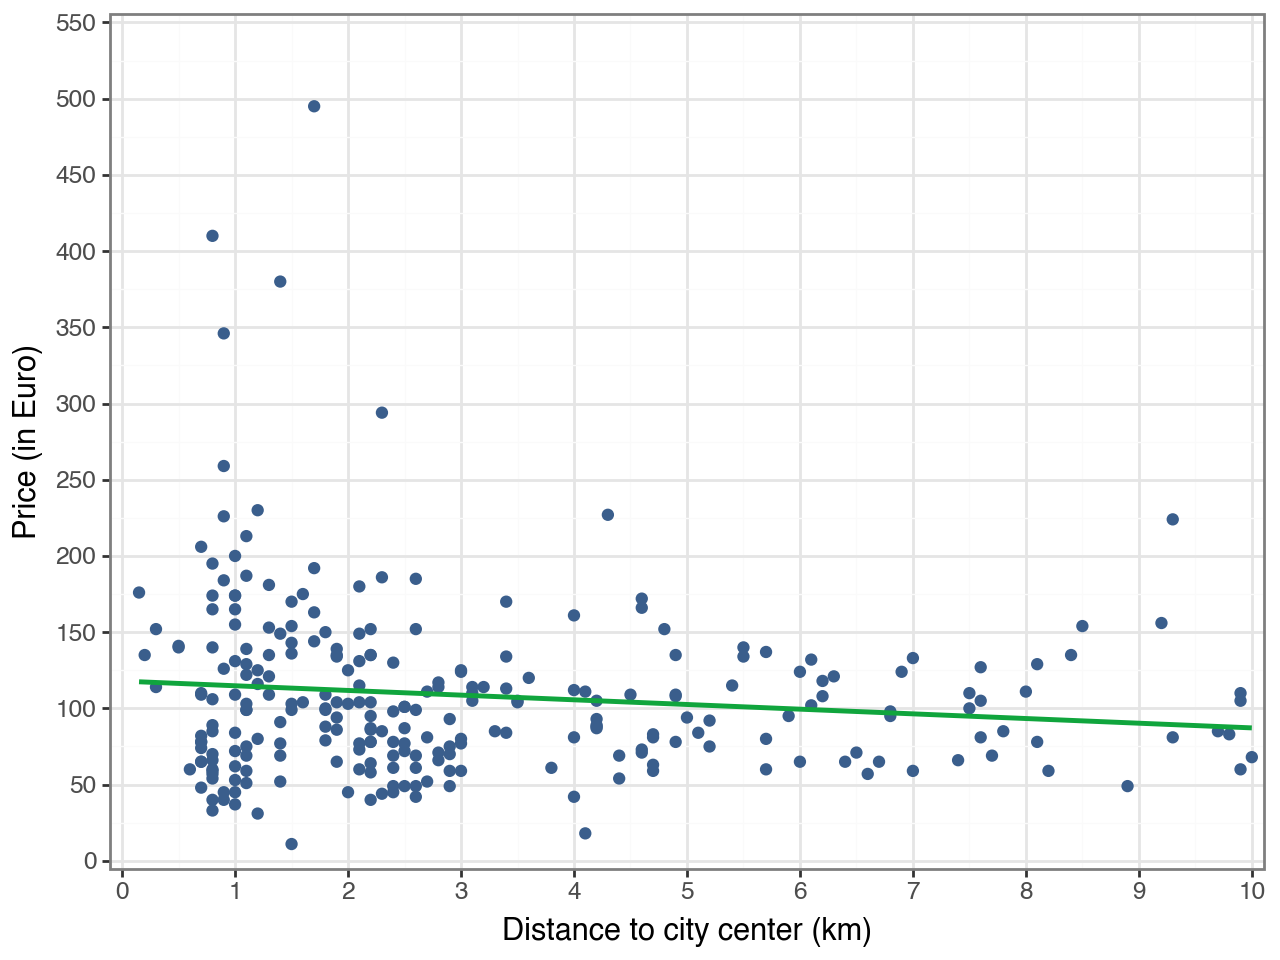

In [217]:
F09 = p1 + geom_smooth(method="lm", color=color[1],se=False)
F09

### * *The Linear regression goes through the averages. Scatterplot + Regression Line + Lines for averages*

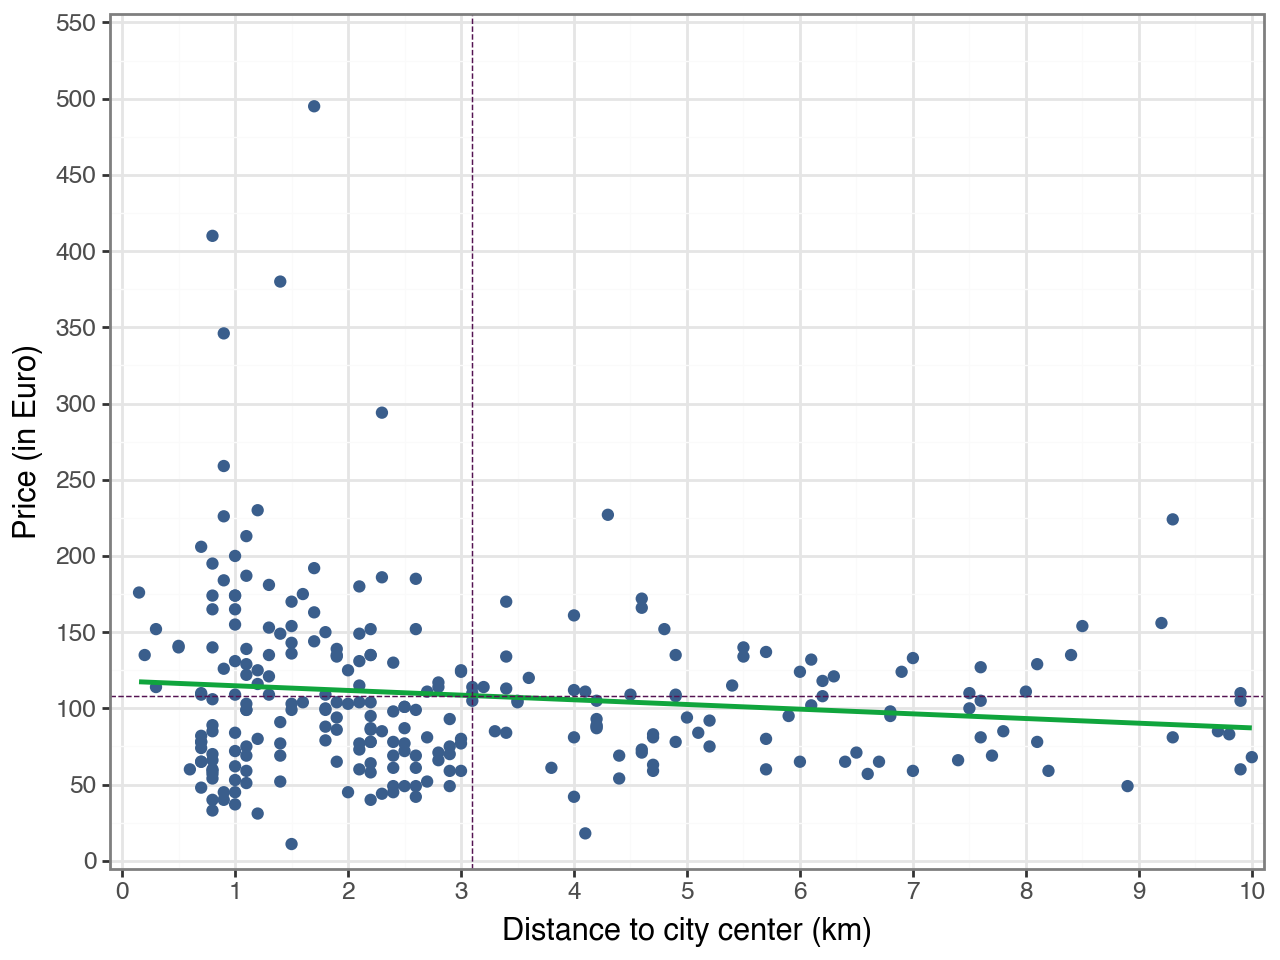

In [219]:
F09a = (
    p1
    + geom_smooth(method="lm", color=color[1],se=False)
    + geom_vline(
        xintercept=Hamburg_data["distance_km"].mean(),
        color=color[2],
        linetype="dashed",
        size=0.3,
    )
    + geom_hline(
        yintercept=Hamburg_data["Price_euro"].mean(), color=color[2], linetype="dashed", size=0.3
    )
)
F09a

### Predicted values and residuals of Linear regression

In [221]:
regression = smf.ols(formula="Price_euro~distance_km", data=Hamburg_data).fit()

In [223]:
Hamburg_data

hotel_id     city   check_in  check_out  breakfast_0_1  \
0         763  Hamburg  2/11/2025  2/12/2025              0   
1         764  Hamburg  2/11/2025  2/12/2025              0   
2         765  Hamburg  2/11/2025  2/12/2025              0   
3         766  Hamburg  2/11/2025  2/12/2025              0   
4         767  Hamburg  2/11/2025  2/12/2025              0   
..        ...      ...        ...        ...            ...   
258      1103  Hamburg  2/11/2025  2/12/2025              0   
259      1105  Hamburg  2/11/2025  2/12/2025              0   
260      1113  Hamburg  2/11/2025  2/12/2025              0   
261      1132  Hamburg  2/11/2025  2/12/2025              0   
262      1162  Hamburg  2/11/2025  2/12/2025              0   

    accommadation_type  distance_km  Sustain_cert  reviews_0_10  nr_reviews  \
0                Hotel          1.2             1           8.2        7237   
1                Hotel          7.4             1           7.2        2707   
2                Hotel          4.7             0           6.7        5322   
3                Hotel          2.5             0           8.3        6424   
4                Hotel          4.9             1           8.1        4493   
..                 ...          ...           ...           ...         ...   
258              Hotel          3.4             0           8.8         409   
259              Hotel          5.2             0           7.0        1215   
260              Hotel          0.9             1           9.3        2090   
261              Hotel          6.5             0           5.6         190   
262         Aparthotel          5.0             0           4.9          17   

     Price_euro  review_category  dist2  Eprice_cat2  dist10  Eprice_cat10  \
0            80                8  Close   112.157609     1.5    125.014925   
1            66                7    Far    99.607595     7.5     93.500000   
2            59                7    Far    99.607595     4.5     99.857143   
3           101                8  Close   112.157609     2.5     93.474576   
4           109                8    Far    99.607595     4.5     99.857143   
..          ...              ...    ...          ...     ...           ...   
258         170                9  Close   112.157609     3.5    104.666667   
259          75                7    Far    99.607595     5.5    100.545455   
260         259                9  Close   112.157609     0.5    121.550000   
261          71                6    Far    99.607595     6.5     96.071429   
262          94                5    Far    99.607595     5.5    100.545455   

     dist10_s  xend        yend  
0           1     2  125.014925  
1           7     8   93.500000  
2           4     5   99.857143  
3           2     3   93.474576  
4           4     5   99.857143  
..        ...   ...         ...  
258         3     4  104.666667  
259         5     6  100.545455  
260         0     1  121.550000  
261         6     7   96.071429  
262         5     6  100.545455  

[263 rows x 19 columns]

In [225]:
Hamburg_data["predprice"] = regression.predict()
Hamburg_data["e"] = regression.resid

In [227]:
type(regression)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [249]:
xa= 9.2
ya= 94
ym= 156 
# FIXME
# ym  --should be replaced with predicted value directly

/opt/anaconda3/lib/python3.12/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/opt/anaconda3/lib/python3.12/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


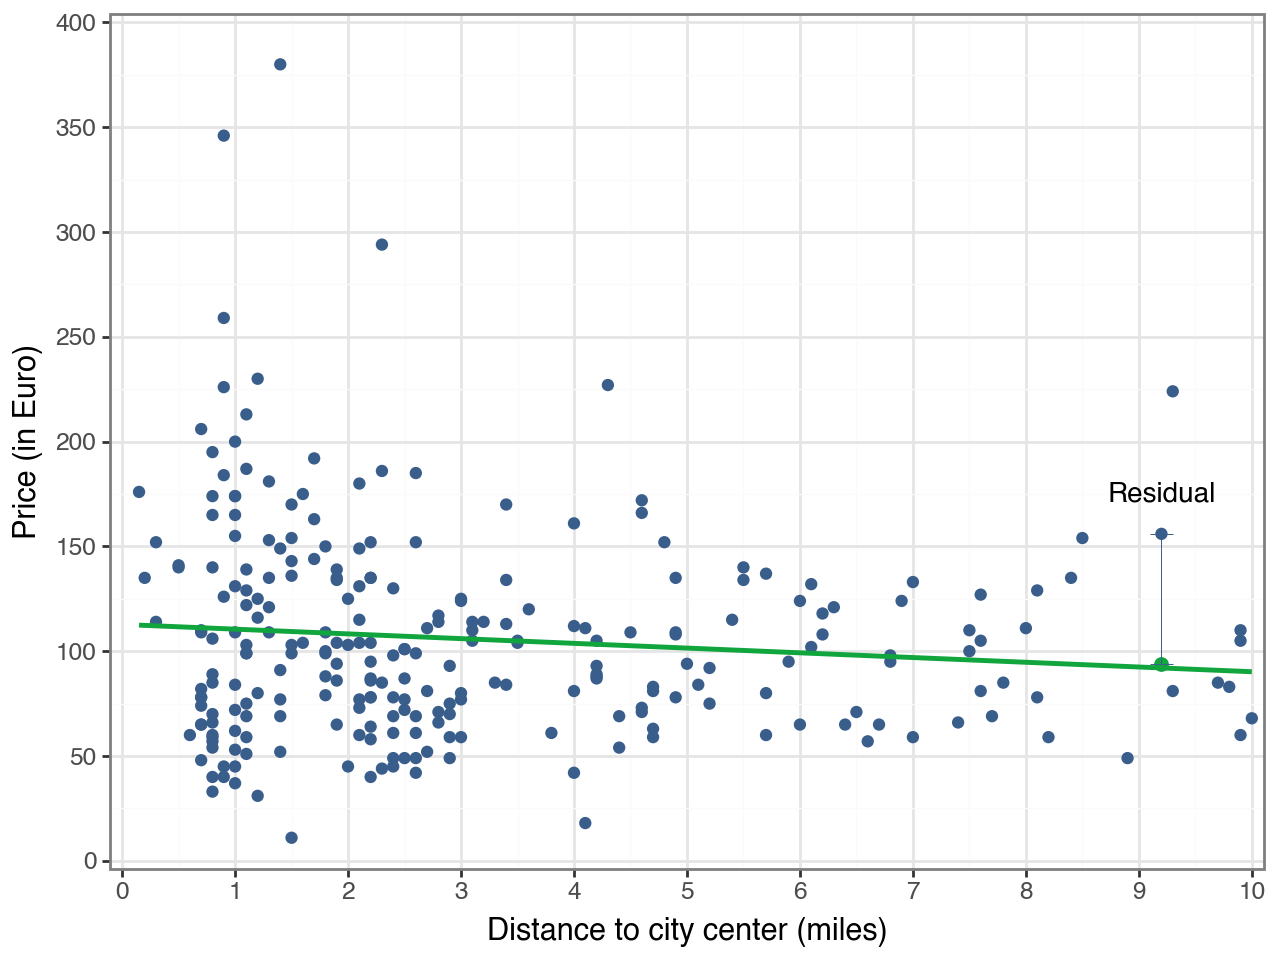

In [257]:
F09b = (
    p1
    + geom_smooth(method="lm", color=color[1], se=False)
    + annotate(
        "text",
        x=9.2,
        y=175,
        label="Residual",
        size=10,
    )
    + annotate("pointrange", x=xa, y=ya, ymin=ya, ymax=ya, color=color[1], size=0.5)
    + geom_errorbar(
        Hamburg_data.loc[Hamburg_data["distance_km"] == xa],
        aes(x="distance_km", ymin=ym, ymax=ya),
        width=0.2,
        size=0.2,
        color=color[0],
    )
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 10), breaks=seq(0, 10, by=1))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 400), breaks=seq(0, 400, by=50)
    )
    + labs(x="Distance to city center (miles)", y="Price (in Euro)")
    + theme_bw()
)

F09b

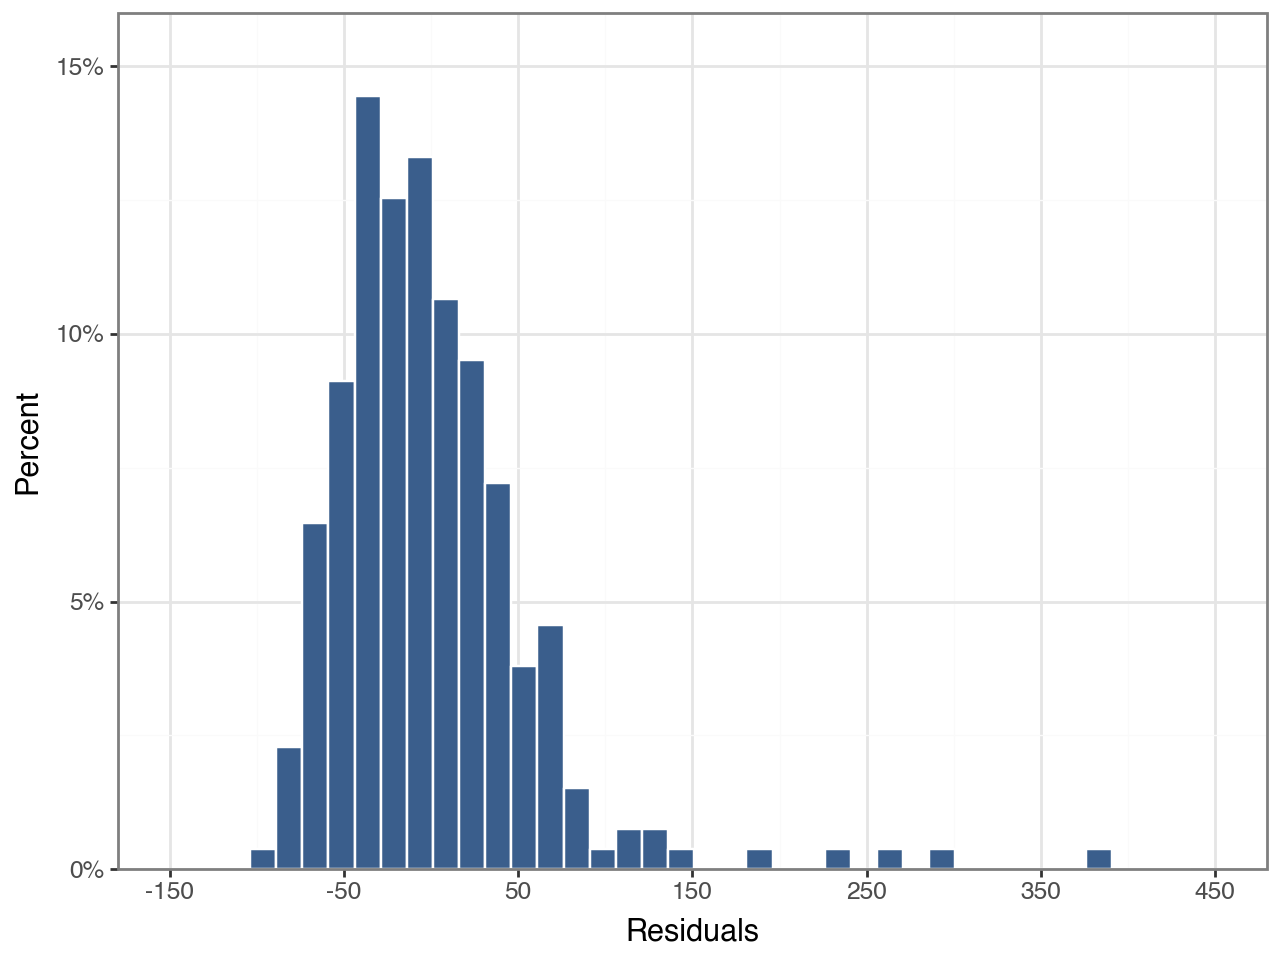

In [414]:
# histogram of residuals
F09c = ggplot(Hamburg_data, aes(x="e")) + geom_histogram(
    aes(y="(..count..)/sum(..count..)"),
    binwidth=15,
    boundary=1,
    fill=color[0],
    color="white",
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + labs(x="Residuals", y="Percent") + scale_x_continuous(
    limits=(-150, 450), breaks=seq(-150, 450, by=100)
) + scale_y_continuous(
    expand=(0, 0), limits=(0, 0.16), breaks=seq(0, 0.16, by=0.05), labels=percent_format()
) + theme_bw()

F09c

In [269]:
Hamburg_data["reg1_res"] = ["overpriced" if e >= 0 else "underpriced" for e in Hamburg_data["e"]]

In [271]:
Hamburg_data.loc[Hamburg_data["e"].sort_values().tail().index, "reg1_res"] = "top5"
Hamburg_data.loc[Hamburg_data["e"].sort_values().head().index, "reg1_res"] = "bottom5"

In [273]:
bestdeals = Hamburg_data.loc[Hamburg_data["e"].sort_values().head().index]

## **Figure 10.** Underpriced hotels in Hamburg

In [ ]:
### Figure 10
### adding annotation

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


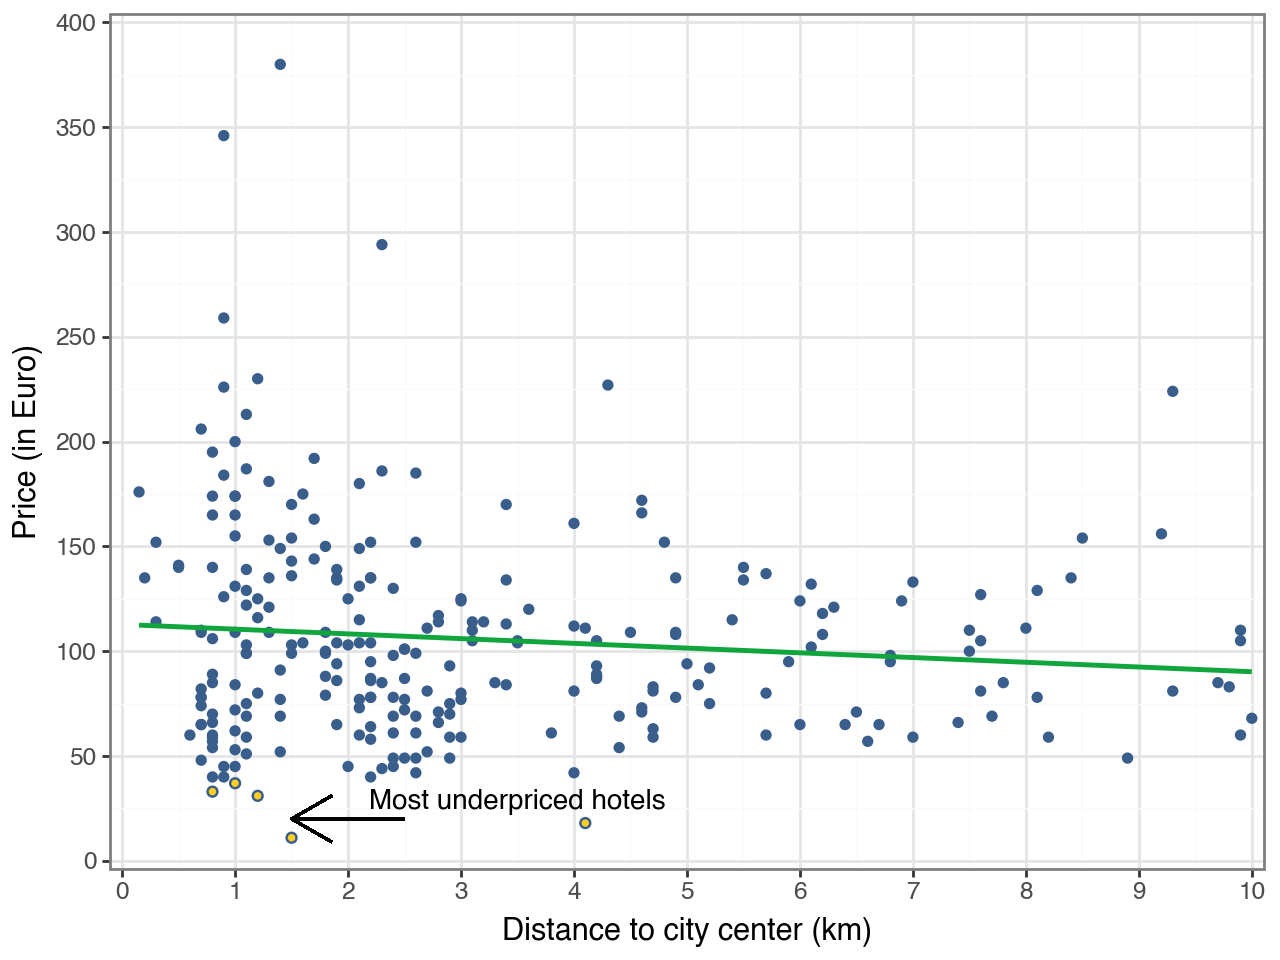

In [296]:
ggplot(Hamburg_data, aes(x="distance_km", y="Price_euro")) + geom_point(
    Hamburg_data.loc[Hamburg_data["reg1_res"] == "overpriced"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_point(
    Hamburg_data.loc[Hamburg_data["reg1_res"] == "underpriced"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_point(
    Hamburg_data.loc[Hamburg_data["reg1_res"] == "bottom5"],
    aes(color="reg1_res", fill="reg1_res"),
    size=1.5,
    alpha=0.8,
    show_legend=False,
) + geom_point(
    Hamburg_data.loc[Hamburg_data["reg1_res"] == "top5"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_smooth(
    method="lm", size=1, color=color[1], se=False
) + coord_cartesian(
    xlim=(0, 10), ylim=(0, 400)
) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 10), breaks=seq(0, 10, by=1)
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 400), breaks=seq(0, 401, by=50)
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + scale_color_manual(
    name="", values=(color[0], color[0], color[0], color[0])
) + scale_fill_manual(
    name="", values=color[3]
) + annotate(
    "text", x=3.5, y=28, label="Most underpriced hotels", size=10
) + geom_segment(
    aes(x=2.5, y=20, xend=1.5, yend=20), arrow=arrow()
) + theme_bw()

## **Table 5.** Most underpriced hotels in Hamburg 

In [299]:
Hamburg_data.loc[
    Hamburg_data["reg1_res"] == "bottom5",
    ["hotel_id", "distance_km", "Price_euro", "predprice", "e"],
].sort_values(by=["e"]).round(2).reset_index(drop=True).rename(
    {"e": "residual"}, axis=1
)

hotel_id  distance_km  Price_euro  predprice  residual
0       878          1.5          11     113.30   -102.30
1      1059          4.1          18     105.32    -87.32
2      1047          1.2          31     114.22    -83.22
3      1015          0.8          33     115.45    -82.45
4       995          1.0          37     114.83    -77.83

## **MUNICH**

## Summary statistics on price and distance

In [304]:
# Filter the dataset for observations from Berlin
Munich_data = hotel_data[hotel_data['city'] == 'München']

# Price
Munich_data[['Price_euro']].describe(percentiles=[0.50,0.95])

Price_euro
count  335.000000
mean   108.907463
std     85.045781
min     19.000000
50%     90.000000
95%    227.200000
max    800.000000

In [306]:
# Distance
Munich_data[['distance_km']].describe(percentiles=[0.50,0.95])

distance_km
count   335.000000
mean      3.529522
std       2.646047
min       0.040000
50%       2.800000
95%       8.530000
max       9.900000

## **Regression 1**: Close VS Far Regression with Binary Distance

In [308]:
# hotels = hotels.assign(dist2=lambda x: x.distance>=4)
Munich_data["dist2"] = Munich_data.distance_km.apply(lambda x: int(x>=4))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_82080/1035590820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [310]:
dist2 = Munich_data.groupby("dist2").aggregate(Eprice_cat2=("Price_euro",np.mean))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_82080/4051746422.py:1: FutureWarning: The provided callable <function mean at 0x105ca3600> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


In [312]:
Munich_data=Munich_data.merge(dist2,left_on="dist2",right_on=dist2.index)

In [314]:
Munich_data.dist2=Munich_data.dist2.replace(0,"Close")
Munich_data.dist2=Munich_data.dist2.replace(1,"Far")

In [316]:
Munich_data[["dist2","distance_km","Price_euro"]].groupby("dist2").aggregate("describe")

distance_km                                                Price_euro  \
            count      mean       std   min  25%  50%   75%  max      count   
dist2                                                                         
Close       206.0  1.689757  1.004324  0.04  1.0  1.4  2.45  3.9      206.0   
Far         129.0  6.467442  1.583714  4.00  5.3  6.4  7.60  9.9      129.0   

                                                               
             mean         std   min   25%   50%    75%    max  
dist2                                                          
Close  122.597087  103.040971  20.0  79.0  95.5  123.5  800.0  
Far     87.046512   32.944048  19.0  70.0  81.0   96.0  305.0

## **Figure 6**. a) Plot mean values by "Close" vs "Far"

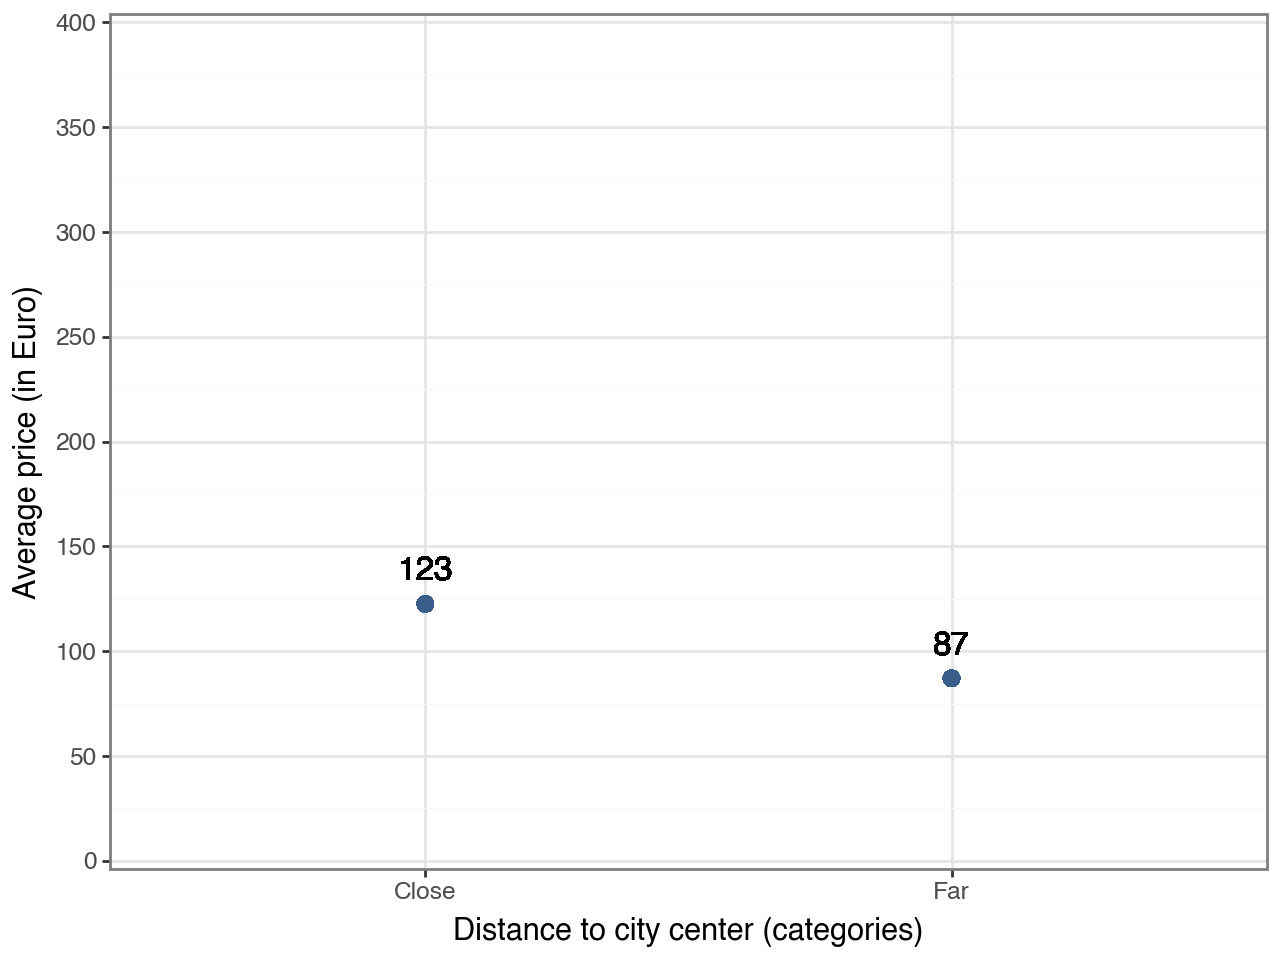

In [318]:
ggplot(Munich_data) + geom_point(
    aes(x="dist2", y="Eprice_cat2"), size=2.5, color=color[0], fill=color[0], alpha=0.4
) + geom_text(
    aes(x="dist2", y="[x+15 for x in Eprice_cat2]", label=np.round(Munich_data.Eprice_cat2).apply(int)),
    color="black",
    size=12,
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 400], breaks=seq(0, 400, 50)
) + expand_limits(
    y=0.01
) + scale_x_discrete() + labs(
    x="Distance to city center (categories)", y="Average price (in Euro)"
) + theme_bw()

In [320]:
Munich_data["dist10"] = Munich_data.distance_km.apply(
    lambda x: 0.5 + 1 * int(x >= 1) + 1 * int(x >= 2) + 1 * int(x >= 3) + 1 * int(x >= 4) + 1 * (x >= 5) + 1 * (x >= 6) + 1 * (x >= 7) + 1 * (x >= 8) + 1 * (x >= 9) + 1 * (x >= 10)
)

In [322]:
dist10 = Munich_data.groupby("dist10").aggregate(Eprice_cat10=("Price_euro", np.mean))

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_82080/2495669628.py:1: FutureWarning: The provided callable <function mean at 0x105ca3600> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


In [324]:
Munich_data = Munich_data.merge(dist10, left_on="dist10", right_on=dist10.index)

In [326]:
Munich_data[["dist10", "distance_km", "Price_euro"]].groupby("dist10").aggregate("describe")

distance_km                                                     \
             count      mean       std   min    25%   50%    75%  max   
dist10                                                                  
0.5           45.0  0.550889  0.251250  0.04  0.350  0.50  0.800  0.9   
1.5           93.0  1.331183  0.284750  1.00  1.100  1.30  1.500  1.9   
2.5           34.0  2.461765  0.296459  2.00  2.200  2.50  2.775  2.9   
3.5           34.0  3.405882  0.297404  3.00  3.125  3.45  3.600  3.9   
4.5           25.0  4.316000  0.288213  4.00  4.100  4.20  4.500  4.9   
5.5           30.0  5.530000  0.291429  5.00  5.300  5.60  5.800  5.9   
6.5           25.0  6.444000  0.280000  6.00  6.200  6.40  6.700  6.9   
7.5           27.0  7.492593  0.304992  7.00  7.200  7.50  7.700  7.9   
8.5            8.0  8.425000  0.319598  8.00  8.225  8.45  8.625  8.9   
9.5           14.0  9.264286  0.267775  9.00  9.025  9.25  9.300  9.9   

       Price_euro                                                             
            count        mean         std   min    25%    50%     75%    max  
dist10                                                                        
0.5          45.0  199.155556  176.685899  47.0  89.00  132.0  226.00  800.0  
1.5          93.0  102.698925   61.618176  45.0  73.00   90.0  115.00  520.0  
2.5          34.0  100.970588   36.756764  20.0  80.75   98.5  120.75  199.0  
3.5          34.0   97.323529   46.352222  53.0  79.75   89.5  100.50  339.0  
4.5          25.0   99.480000   59.073485  19.0  68.00   79.0  116.00  305.0  
5.5          30.0   86.500000   18.286513  48.0  75.00   85.5  100.75  129.0  
6.5          25.0   83.000000   20.283409  58.0  73.00   78.0   90.00  143.0  
7.5          27.0   82.370370   24.802525  43.0  66.00   80.0   98.50  143.0  
8.5           8.0   85.125000   22.132313  48.0  76.50   84.5   94.25  125.0  
9.5          14.0   83.357143   29.193274  47.0  74.75   81.5   86.50  173.0

## **Figure 6**. b) Plot mean values by every 1 km

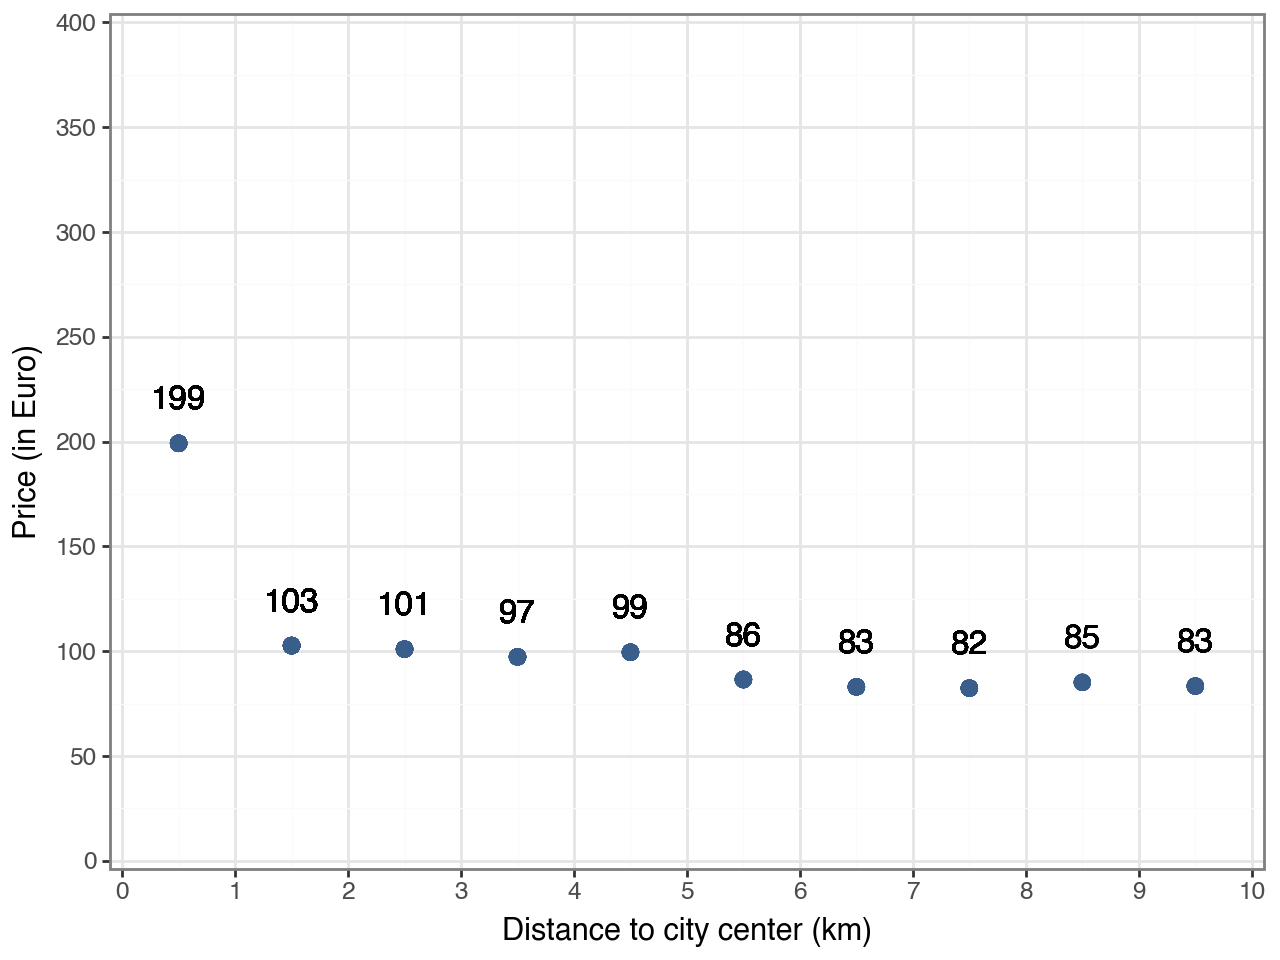

In [330]:
ggplot(data=Munich_data) + geom_point(
    aes(x="dist10", y="Eprice_cat10"),
    size=2.5,
    color=color[0],
    fill=color[0],
    alpha=0.4,
) + geom_text(
    aes(
        x="dist10",
        y="[x+20 for x in Eprice_cat10]",
        label=np.round(Munich_data.Eprice_cat10).apply(int),
    ),
    color="black",
    size=12,
) + expand_limits(
    x=0.01, y=0.01
) + coord_cartesian(
    xlim=[0, 10], ylim=[0, 400]
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 400], breaks=seq(0, 401, 50)
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 10], breaks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + theme_bw()

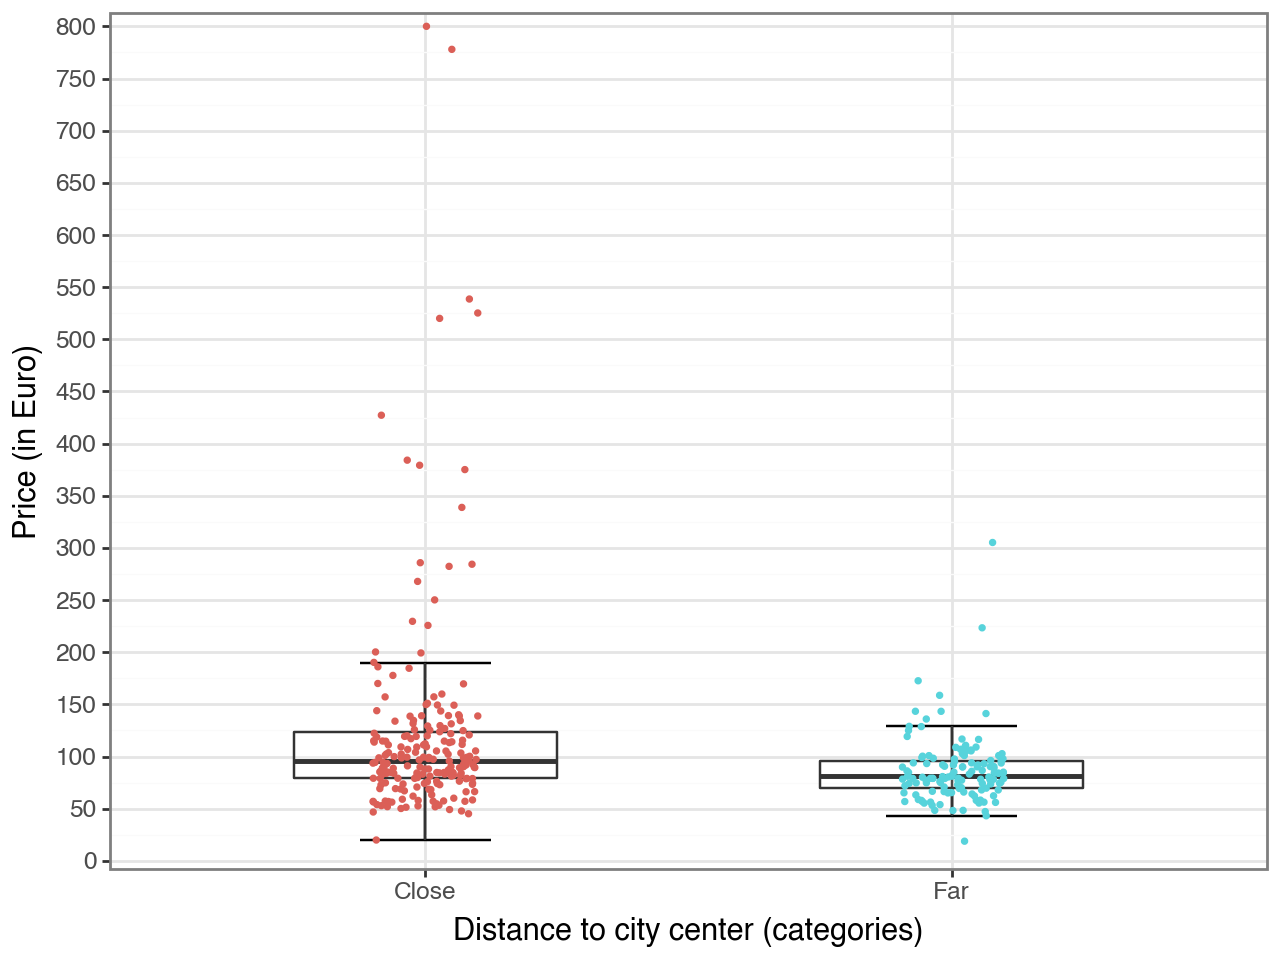

In [334]:
ggplot(Munich_data, aes(x="dist2", y="Price_euro")) + stat_boxplot(
    aes(group="dist2"),
    geom="errorbar",
    width=0.25,
    size=0.5
) + geom_boxplot(
    aes(group="dist2"),
    size=0.5,
    width=0.5,
    alpha=0.3,
    outlier_shape="",
) + geom_jitter(
    aes(color="dist2"), position=position_jitter(0.1), size=0.5, show_legend=False
) + labs(
    x="Distance to city center (categories)", y="Price (in Euro)"
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 805], breaks=seq(0, 805, 50)
) + expand_limits(
    y=0.01
) + theme_bw()

## **Figure 7.** Price and distance to the city center: non-parametric regression and scatterplot

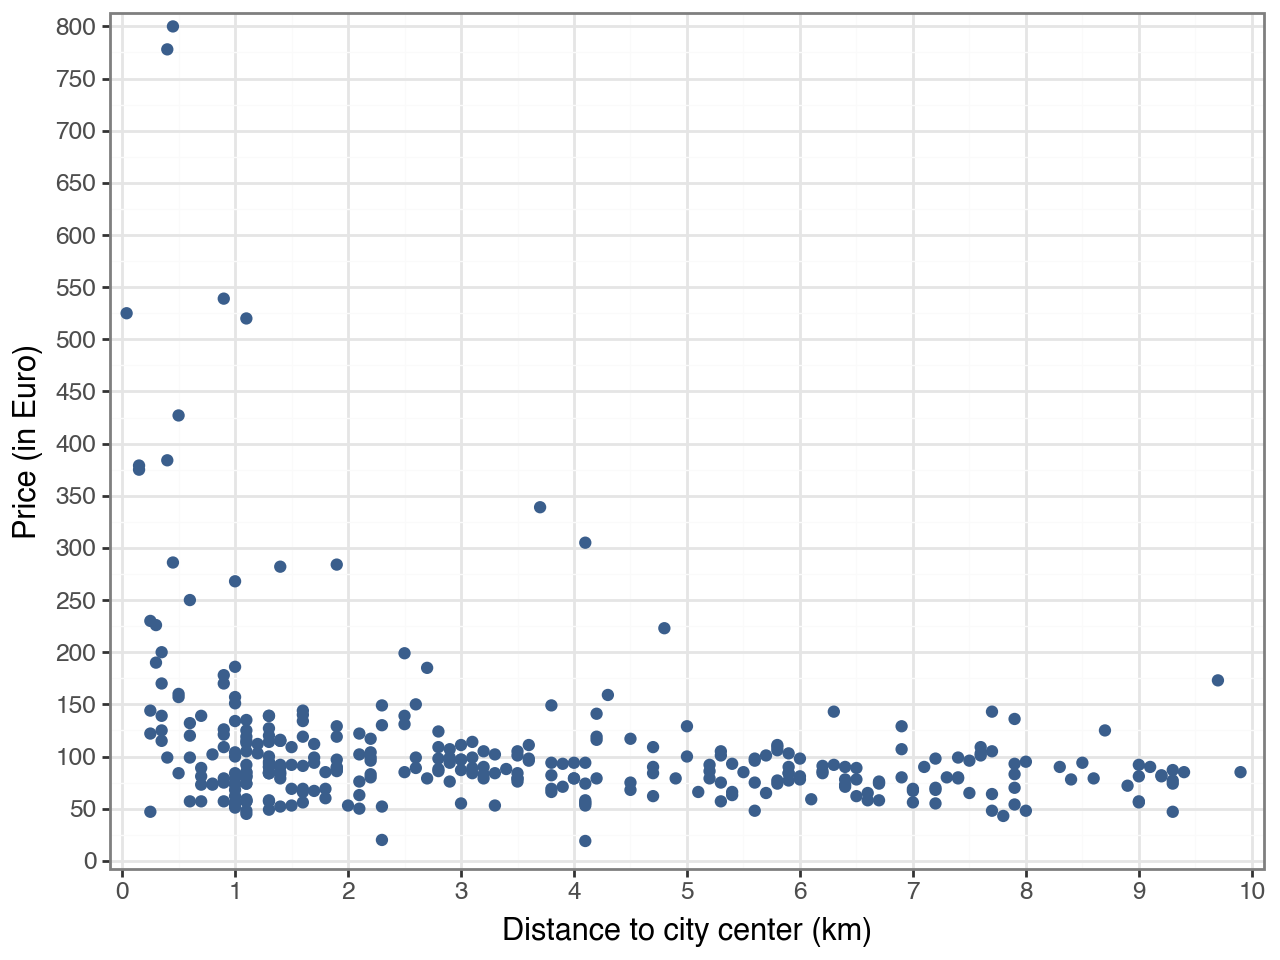

In [338]:
p1 = (
    ggplot(Munich_data, aes(x="distance_km", y="Price_euro"))
    + geom_point(color=color[0])
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 10], breaks=seq(0, 10, 1))
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 805], breaks=seq(0, 805, 50))
    + labs(x="Distance to city center (km)", y="Price (in Euro)")
    + theme_bw()
)
p1

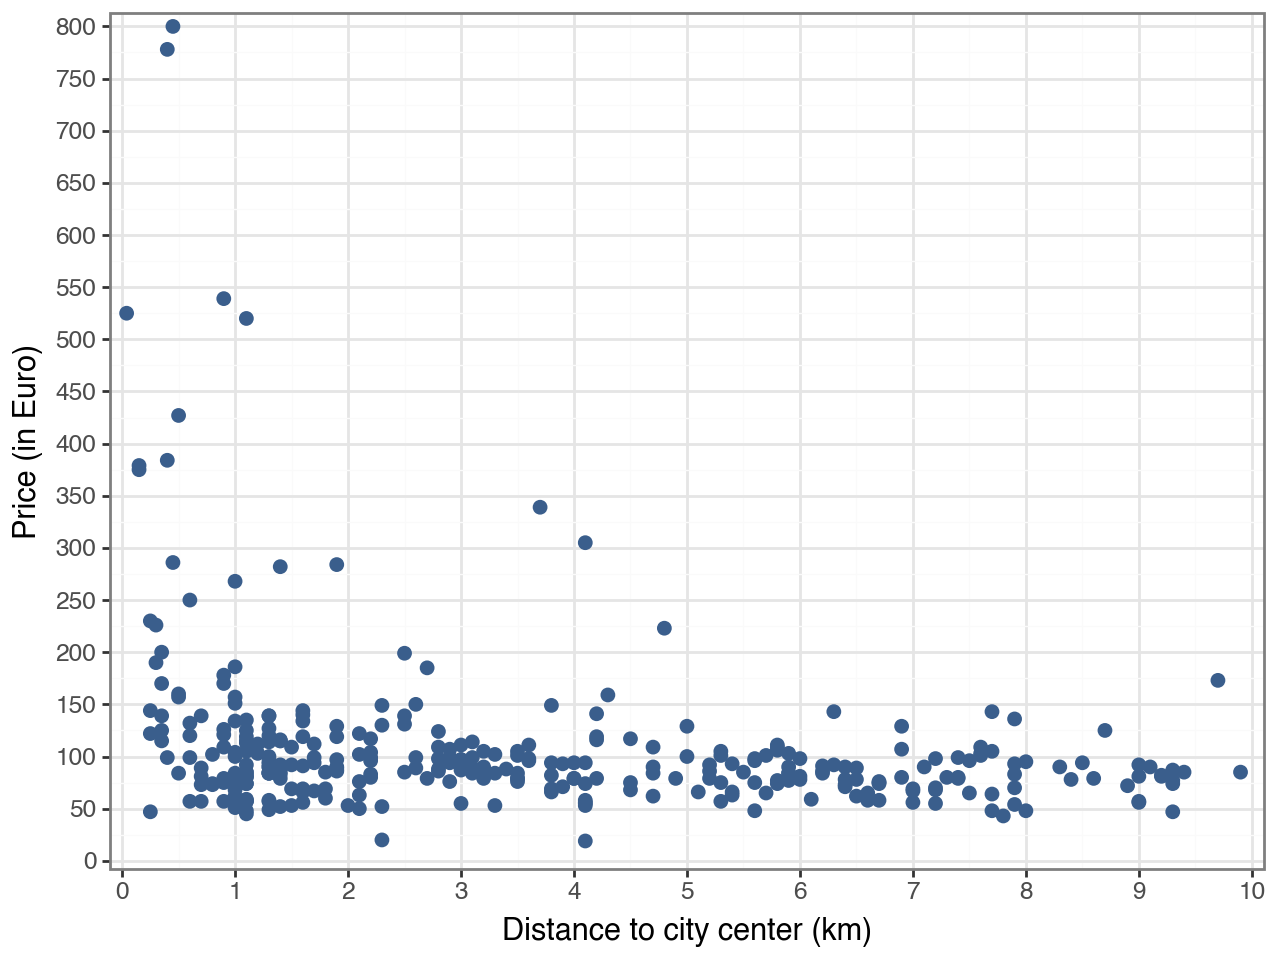

In [342]:
# large sized graphs
ggplot(Munich_data) + geom_point(
    aes(x="distance_km", y="Price_euro"),
    color=color[0],
    size=2,
    alpha=0.5,
    show_legend=False,
    na_rm=True,
) + expand_limits(x=0.01, y=0.01) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 10], breaks=seq(0, 10, 1)
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 805], breaks=seq(0, 805, 50)
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + theme_bw()

## *Scatterplot with step function (we use 1 km bits for simpplicity using 10 bits)*

In [344]:
Munich_data["dist10_s"] = Munich_data.distance_km.apply(
    lambda x: 1 * int(x >= 1)
    + 1 * int(x >= 2)
    + 1 * int(x >= 3)
    + 1 * int(x >= 4)
    + 1 * int(x >= 5)
    + 1 * int(x >= 6)
    + 1 * int(x >= 7)
    + 1 * int(x >= 8)
    + 1 * int(x >= 9)
    + 1 * int(x >=10)
)
Munich_data["xend"] = Munich_data["dist10_s"] + 1
Munich_data["yend"] = Munich_data["Eprice_cat10"]

### *Non-parametric regression, 10 bins*

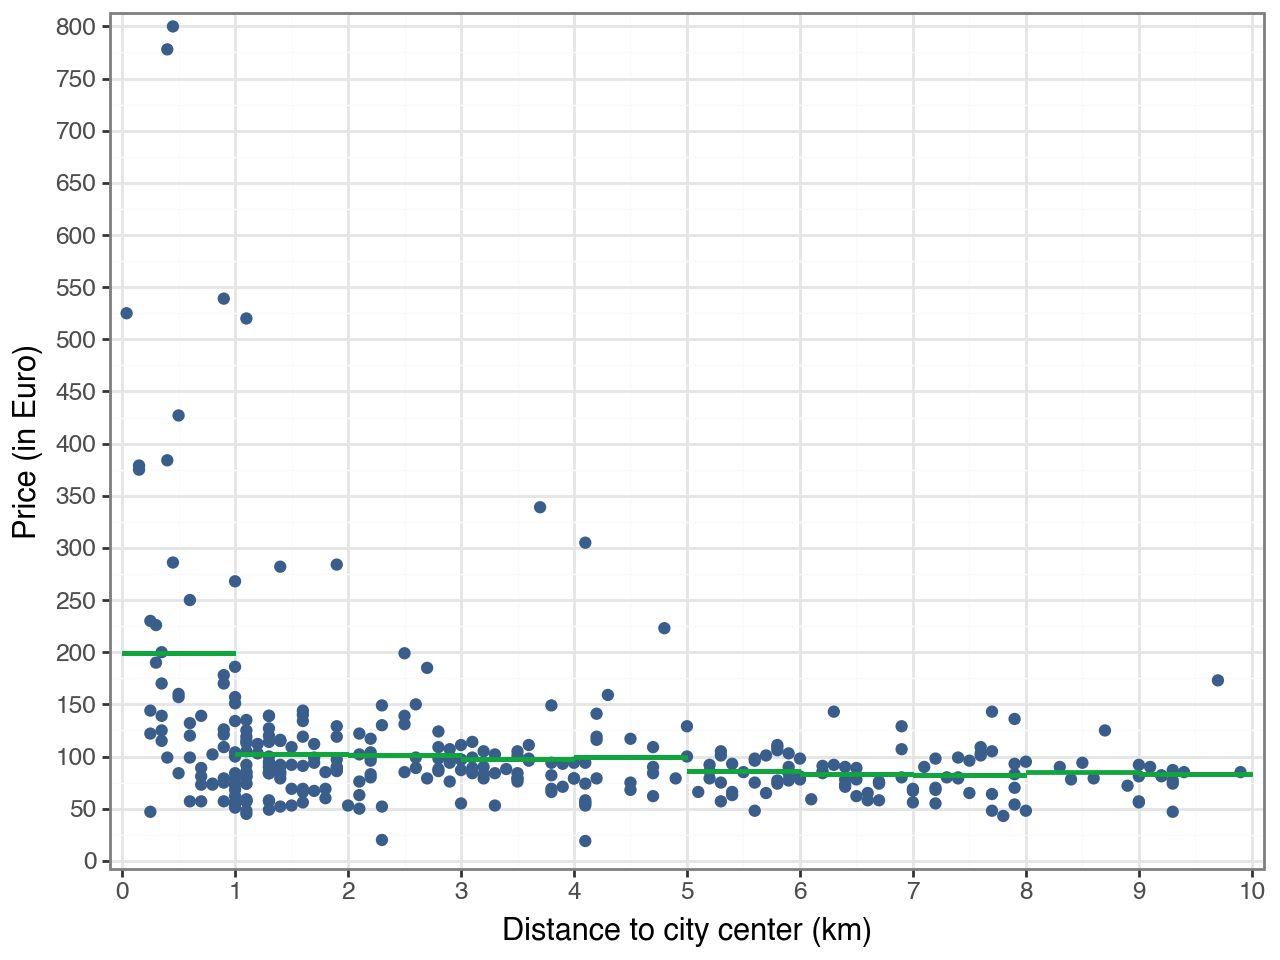

In [346]:
F07 = p1 + geom_segment(
    Munich_data,
    aes("dist10_s", "yend", xend="xend", yend="yend"),
    color=color[1],
    size=0.7,
    na_rm=True,
)

F07

In [85]:
# !pip install scikit-misc

## **Figure 8.** Lowess Non-parametric regression

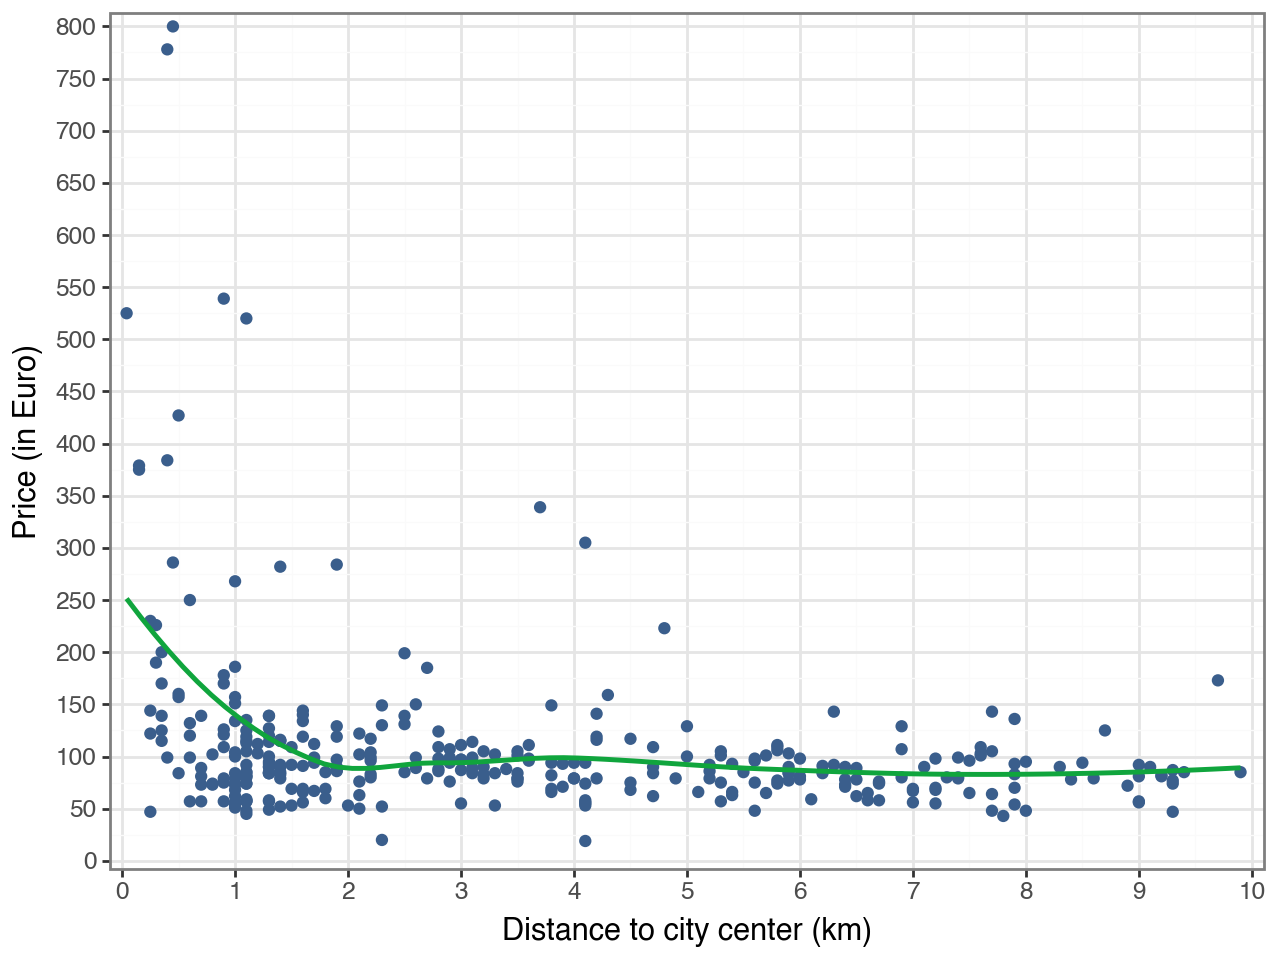

In [348]:
F08 = p1 + geom_smooth(method="loess", color=color[1],se=False)
F08

In [350]:
### LINEAR REGRESSIONS
regression = smf.ols(formula="Price_euro~distance_km", data=Munich_data).fit()
regression.summary()
#regression.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_euro   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     25.61
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           6.92e-07
Time:                        02:08:35   Log-Likelihood:                -1950.9
No. Observations:                 335   AIC:                             3906.
Df Residuals:                     333   BIC:                             3913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     139.2239      7.483     18.606      0.000     124.504     153.944
distance_km    -8.5894      1.697     -5.061      0.000     -11.928      -5.251
==============================================================================
Omnibus:                      349.449   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12052.438
Skew:                           4.553   Prob(JB):                         0.00
Kurtosis:                      30.938   Cond. No.                         7.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Figure 9.** Scatterplot + Regression Line

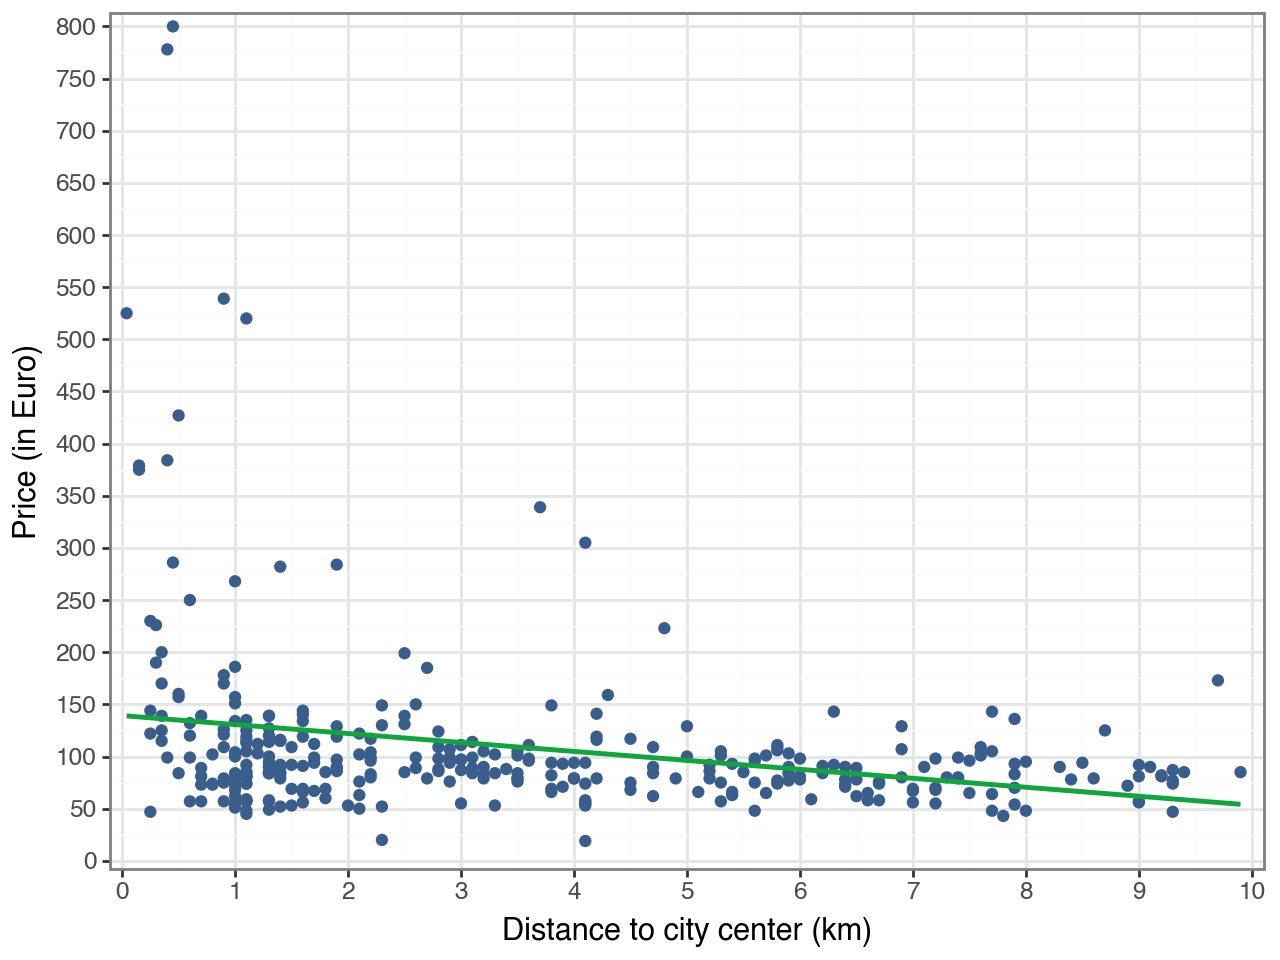

In [352]:
F09 = p1 + geom_smooth(method="lm", color=color[1],se=False)
F09

### * *The Linear regression goes through the averages. Scatterplot + Regression Line + Lines for averages*

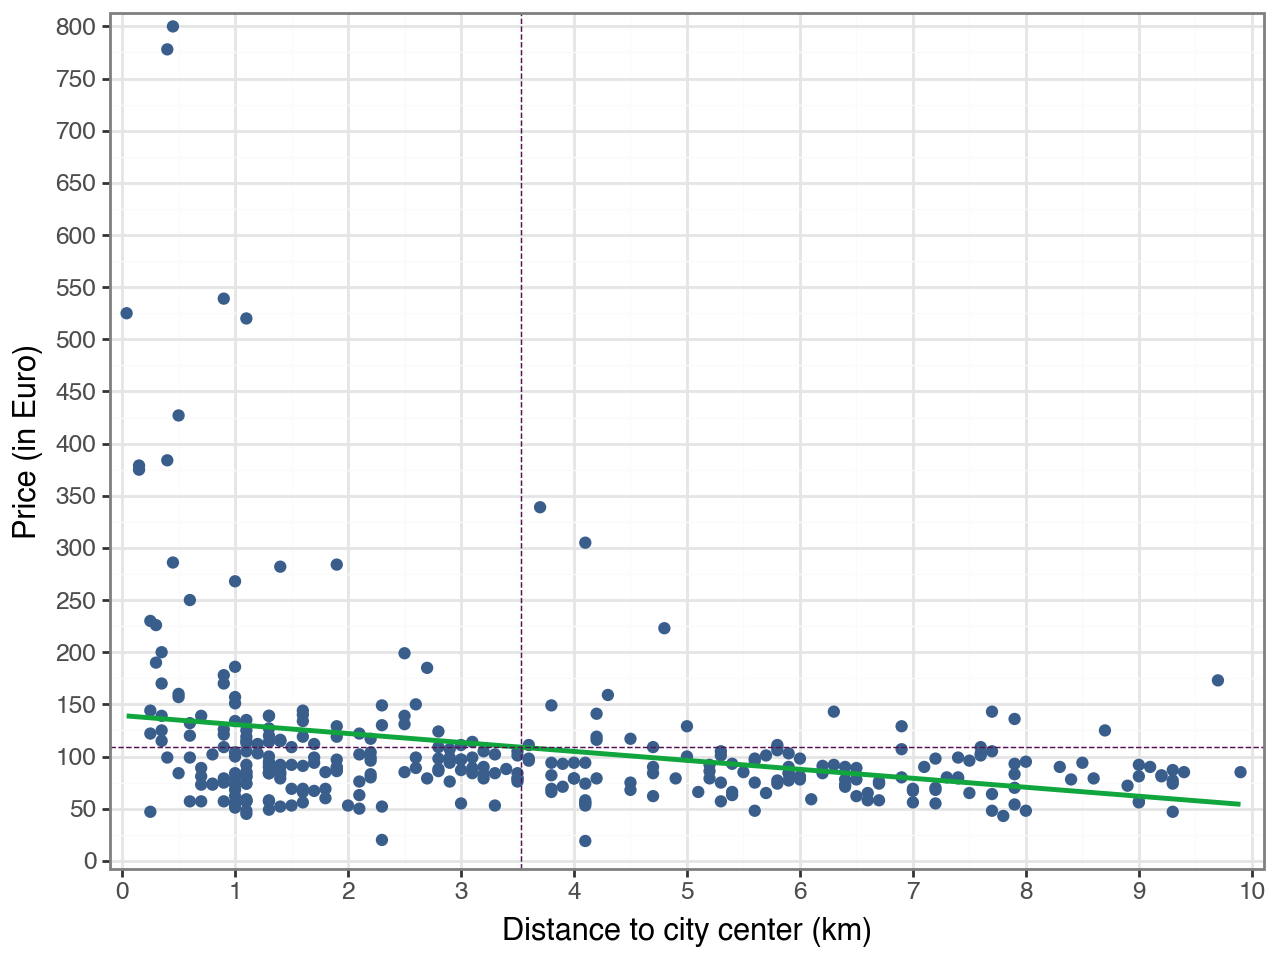

In [356]:
F09a = (
    p1
    + geom_smooth(method="lm", color=color[1],se=False)
    + geom_vline(
        xintercept=Munich_data["distance_km"].mean(),
        color=color[2],
        linetype="dashed",
        size=0.3,
    )
    + geom_hline(
        yintercept=Munich_data["Price_euro"].mean(), color=color[2], linetype="dashed", size=0.3
    )
)
F09a

### Predicted values and residuals of Linear regression

In [360]:
regression = smf.ols(formula="Price_euro~distance_km", data=Munich_data).fit()

In [362]:
Munich_data

hotel_id     city   check_in  check_out  breakfast_0_1  \
0        1204  München  2/10/2025  2/11/2025              0   
1        1205  München  2/10/2025  2/11/2025              0   
2        1206  München  2/10/2025  2/11/2025              0   
3        1208  München  2/10/2025  2/11/2025              0   
4        1209  München  2/10/2025  2/11/2025              0   
..        ...      ...        ...        ...            ...   
330      1592  München  2/10/2025  2/11/2025              0   
331      1593  München  2/10/2025  2/11/2025              0   
332      1595  München  2/10/2025  2/11/2025              0   
333      1598  München  2/10/2025  2/11/2025              0   
334      1599  München  2/10/2025  2/11/2025              0   

    accommadation_type  distance_km  Sustain_cert  reviews_0_10  nr_reviews  \
0                Hotel         1.40             0           8.1        4006   
1                Hotel         7.70             1           8.2        2555   
2                Hotel         1.10             0           7.6         451   
3                Hotel         3.20             1           8.4        8304   
4                Hotel         6.00             1           7.8        3801   
..                 ...          ...           ...           ...         ...   
330              Hotel         1.10             1           9.1         783   
331              Hotel         0.04             0           9.4         611   
332              Hotel         0.90             0           9.0          80   
333         Aparthotel         0.60             0           9.1          60   
334              Hotel         0.40             0           8.9         308   

     Price_euro  review_category  dist2  Eprice_cat2  dist10  Eprice_cat10  \
0            92                8  Close   122.597087     1.5    102.698925   
1            64                8    Far    87.046512     7.5     82.370370   
2            92                8  Close   122.597087     1.5    102.698925   
3            79                8  Close   122.597087     3.5     97.323529   
4            78                8    Far    87.046512     6.5     83.000000   
..          ...              ...    ...          ...     ...           ...   
330         520                9  Close   122.597087     1.5    102.698925   
331         525                9  Close   122.597087     0.5    199.155556   
332         539                9  Close   122.597087     0.5    199.155556   
333         250                9  Close   122.597087     0.5    199.155556   
334         778                9  Close   122.597087     0.5    199.155556   

     dist10_s  xend        yend  
0           1     2  102.698925  
1           7     8   82.370370  
2           1     2  102.698925  
3           3     4   97.323529  
4           6     7   83.000000  
..        ...   ...         ...  
330         1     2  102.698925  
331         0     1  199.155556  
332         0     1  199.155556  
333         0     1  199.155556  
334         0     1  199.155556  

[335 rows x 19 columns]

In [364]:
Munich_data["predprice"] = regression.predict()
Munich_data["e"] = regression.resid

In [366]:
type(regression)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [382]:
xa= 9.7
ya= 70
ym= 175 
# FIXME
# ym  --should be replaced with predicted value directly

/opt/anaconda3/lib/python3.12/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/opt/anaconda3/lib/python3.12/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


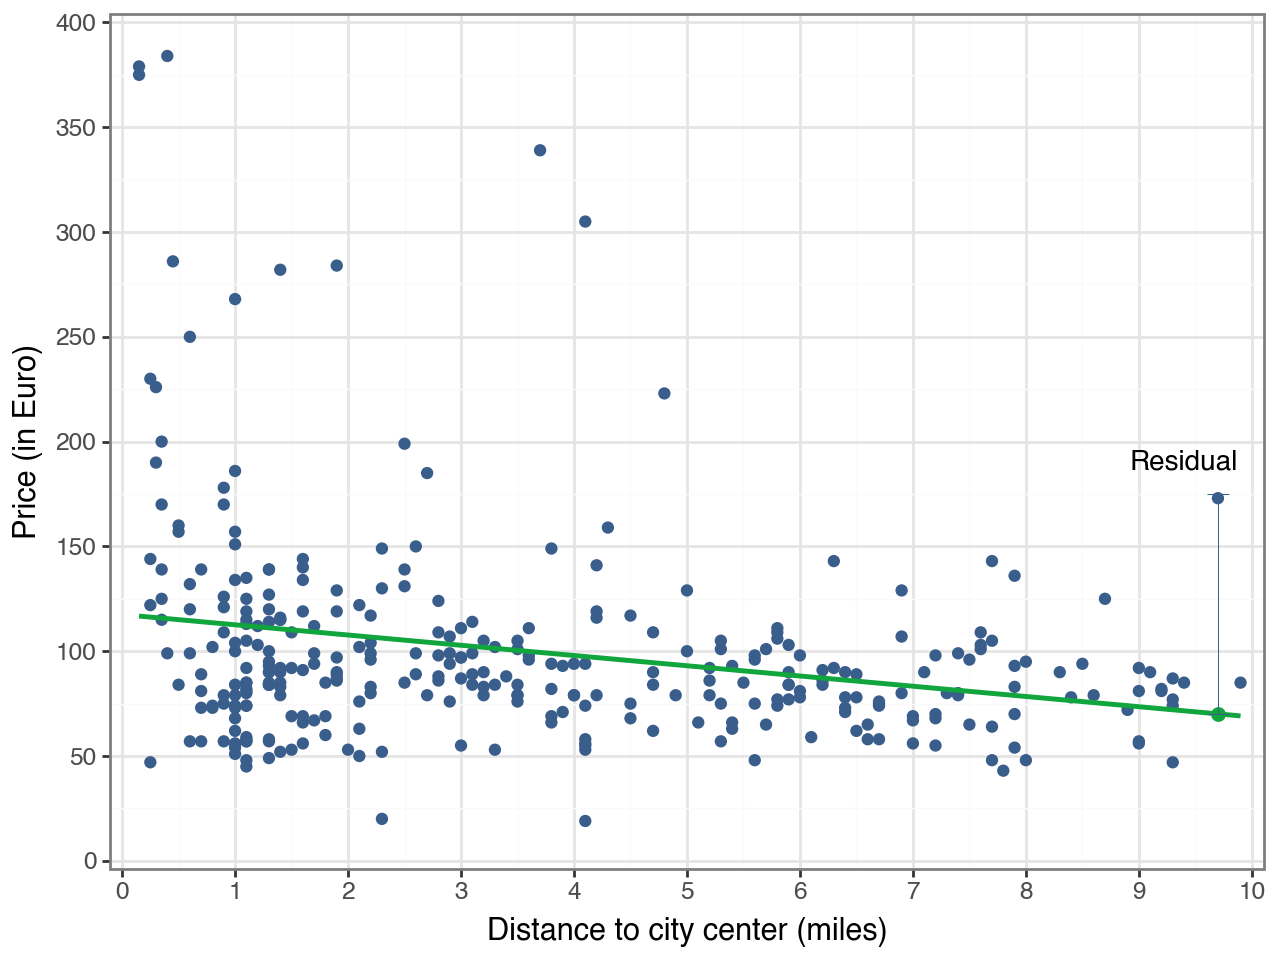

In [392]:
F09b = (
    p1
    + geom_smooth(method="lm", color=color[1], se=False)
    + annotate(
        "text",
        x=9.4,
        y=190,
        label="Residual",
        size=10,
    )
    + annotate("pointrange", x=xa, y=ya, ymin=ya, ymax=ya, color=color[1], size=0.5)
    + geom_errorbar(
        Munich_data.loc[Munich_data["distance_km"] == xa],
        aes(x="distance_km", ymin=ym, ymax=ya),
        width=0.2,
        size=0.2,
        color=color[0],
    )
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 10), breaks=seq(0, 10, by=1))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 400), breaks=seq(0, 400, by=50)
    )
    + labs(x="Distance to city center (miles)", y="Price (in Euro)")
    + theme_bw()
)

F09b

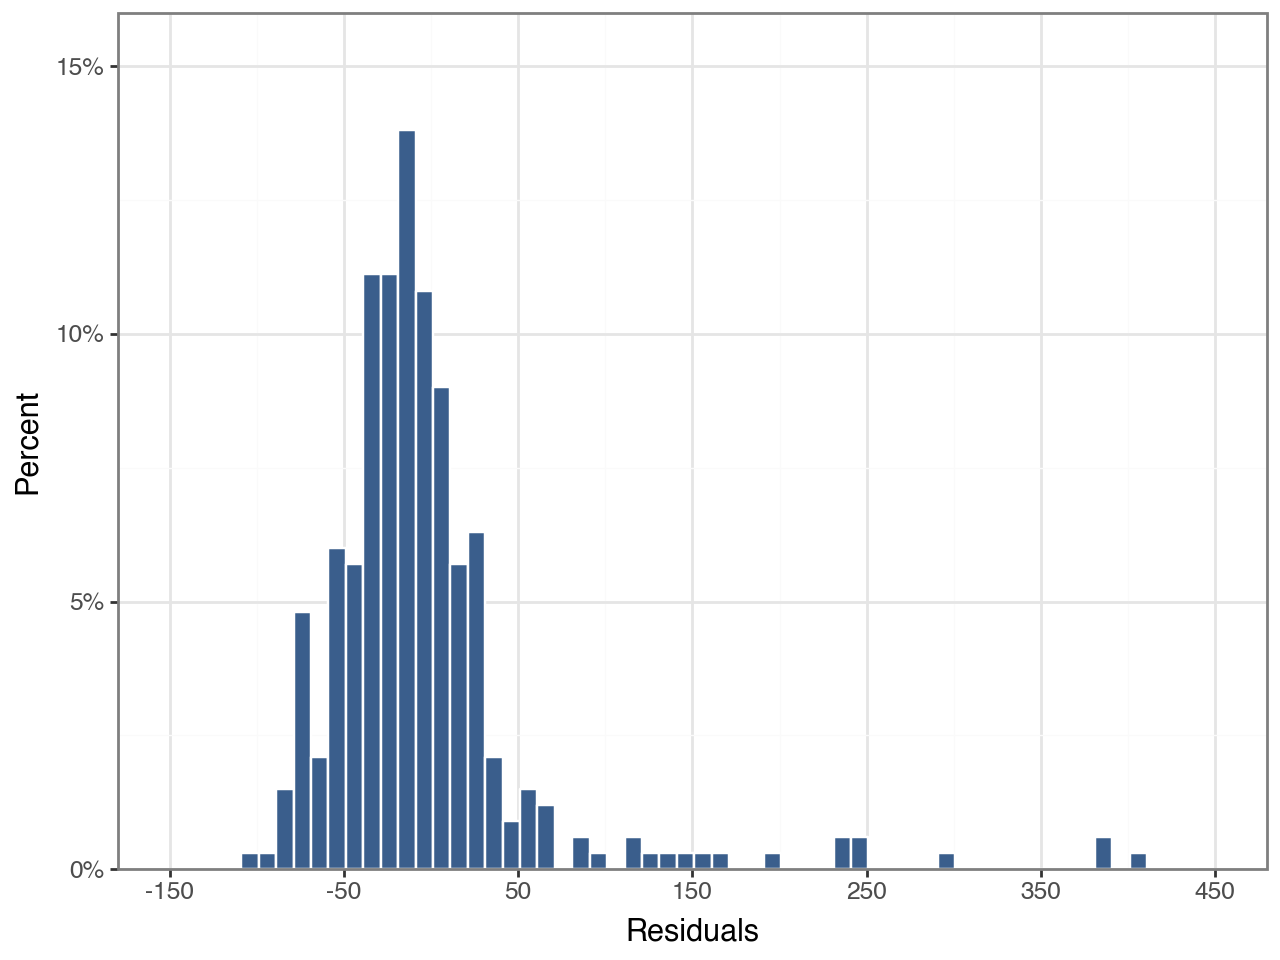

In [412]:
# histogram of residuals
F09c = ggplot(Munich_data, aes(x="e")) + geom_histogram(
    aes(y="(..count..)/sum(..count..)"),
    binwidth=10,
    boundary=1,
    fill=color[0],
    color="white",
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + labs(x="Residuals", y="Percent") + scale_x_continuous(
    limits=(-150, 450), breaks=seq(-150, 450, by=100)
) + scale_y_continuous(
    expand=(0, 0), limits=(0, 0.16), breaks=seq(0, 0.16, by=0.05), labels=percent_format()
) + theme_bw()

F09c

In [426]:
Munich_data["reg1_res"] = ["overpriced" if e >= 0 else "underpriced" for e in Munich_data["e"]]

In [428]:
Munich_data.loc[Munich_data["e"].sort_values().tail().index, "reg1_res"] = "top5"
Munich_data.loc[Munich_data["e"].sort_values().head().index, "reg1_res"] = "bottom5"

In [430]:
bestdeals = Munich_data.loc[Munich_data["e"].sort_values().head().index]

## **Figure 10.** Underpriced hotels in Munich

In [ ]:
### Figure 10
### adding annotation

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


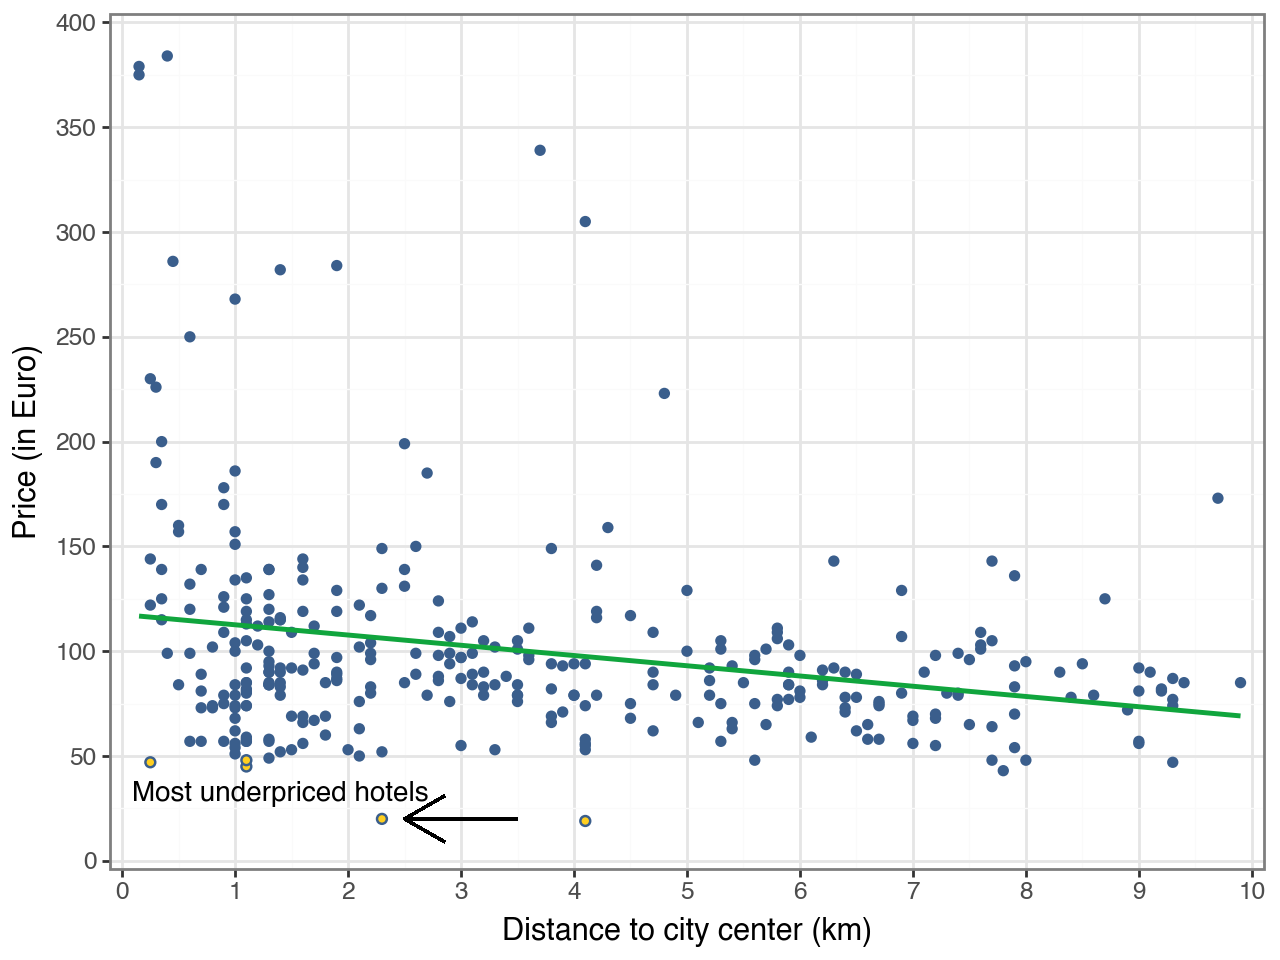

In [475]:
ggplot(Munich_data, aes(x="distance_km", y="Price_euro")) + geom_point(
    Munich_data.loc[Munich_data["reg1_res"] == "overpriced"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_point(
    Munich_data.loc[Munich_data["reg1_res"] == "underpriced"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_point(
    Munich_data.loc[Munich_data["reg1_res"] == "bottom5"],
    aes(color="reg1_res", fill="reg1_res"),
    size=1.5,
    alpha=0.8,
    show_legend=False,
) + geom_point(
    Munich_data.loc[Munich_data["reg1_res"] == "top5"],
    aes(color="reg1_res"),
    size=1.3,
    alpha=0.6,
    show_legend=False,
) + geom_smooth(
    method="lm", size=1, color=color[1], se=False
) + coord_cartesian(
    xlim=(0, 10), ylim=(0, 400)
) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 10), breaks=seq(0, 10, by=1)
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 400), breaks=seq(0, 401, by=50)
) + labs(
    x="Distance to city center (km)", y="Price (in Euro)"
) + scale_color_manual(
    name="", values=(color[0], color[0], color[0], color[0])
) + scale_fill_manual(
    name="", values=color[3]
) + annotate(
    "text", x=1.4, y=32, label="Most underpriced hotels", size=10
) + geom_segment(
    aes(x=3.5, y=20, xend=2.5, yend=20), arrow=arrow()
) + theme_bw()

## **Table 5.** Most underpriced hotels in Munich 

In [478]:
Munich_data.loc[
    Munich_data["reg1_res"] == "bottom5",
    ["hotel_id", "distance_km", "Price_euro", "predprice", "e"],
].sort_values(by=["e"]).round(2).reset_index(drop=True).rename(
    {"e": "residual"}, axis=1
)

hotel_id  distance_km  Price_euro  predprice  residual
0      1441         2.30          20     119.47    -99.47
1      1443         0.25          47     137.08    -90.08
2      1459         4.10          19     104.01    -85.01
3      1272         1.10          45     129.78    -84.78
4      1467         1.10          48     129.78    -81.78